In [1096]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sweetviz as sw
from IPython.display import IFrame
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Question 1

#  1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [1097]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [1098]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19.94             16.92                       0.8752            6.675   
1     15.99             14.89                       0.9064            5.363   
2     18.95             16.42                       0.8829            6.248   
3     10.83             12.96                       0.8099            5.278   
4     17.99             15.86                       0.8992            5.890   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0         3.763            3.252                         6.550  
1         3.582            3.336                         5.144  
2         3.755            3.368                         6.148  
3         2.641            5.182                         5.185  
4         3.694            2.068                         5.837

## Null and duplicates check

In [1099]:
df.isna().sum().sum()

0

In [1100]:
df.isnull().sum().sum()

0

In [1101]:
df.duplicated().sum()

0

## Missing Value Analysis

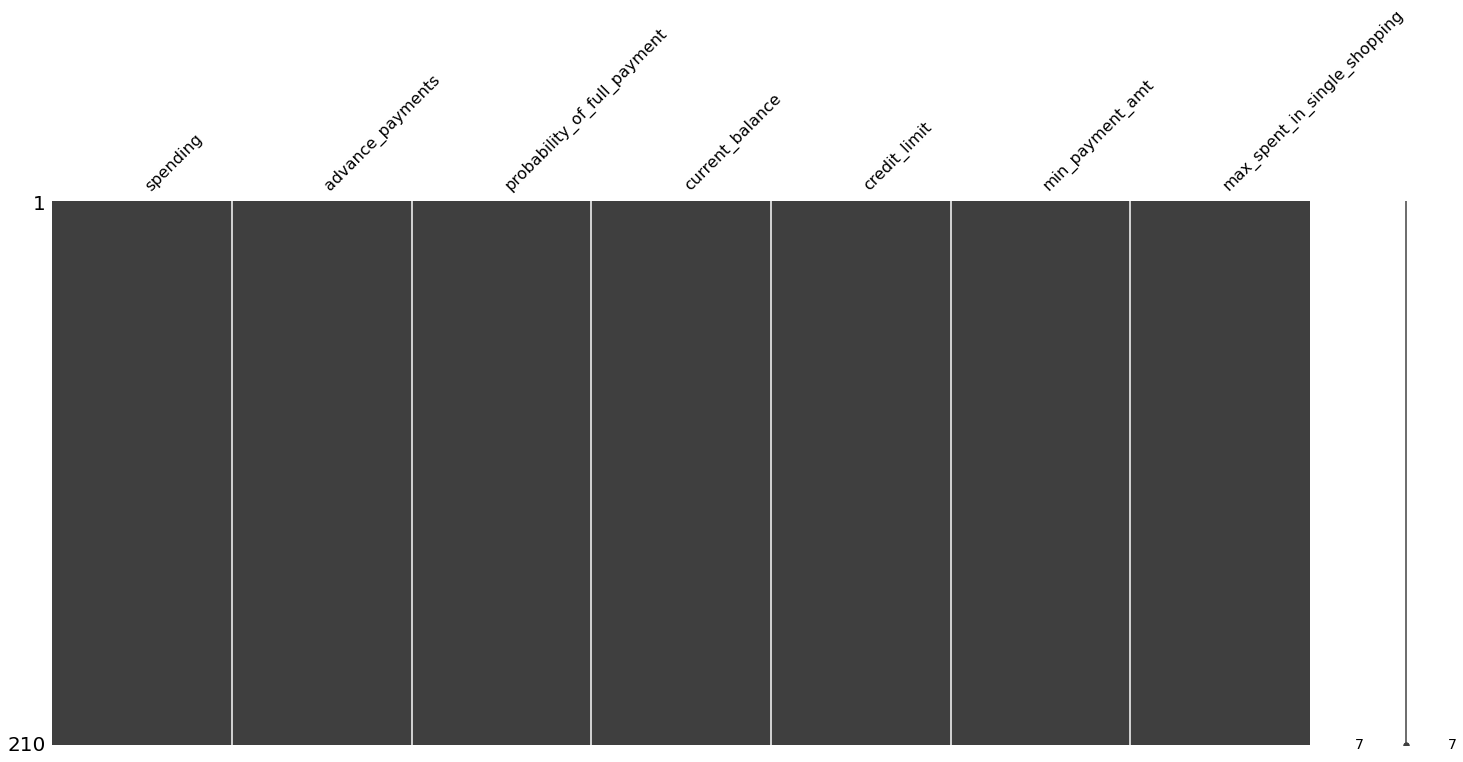

In [1102]:
msno.matrix(df)

## Describing the data

In [1103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [1104]:
df.describe()

spending  advance_payments  probability_of_full_payment  \
count  210.000000        210.000000                   210.000000   
mean    14.847524         14.559286                     0.870999   
std      2.909699          1.305959                     0.023629   
min     10.590000         12.410000                     0.808100   
25%     12.270000         13.450000                     0.856900   
50%     14.355000         14.320000                     0.873450   
75%     17.305000         15.715000                     0.887775   
max     21.180000         17.250000                     0.918300   

       current_balance  credit_limit  min_payment_amt  \
count       210.000000    210.000000       210.000000   
mean          5.628533      3.258605         3.700201   
std           0.443063      0.377714         1.503557   
min           4.899000      2.630000         0.765100   
25%           5.262250      2.944000         2.561500   
50%           5.523500      3.237000         3.599000   
75%           5.979750      3.561750         4.768750   
max           6.675000      4.033000         8.456000   

       max_spent_in_single_shopping  
count                    210.000000  
mean                       5.408071  
std                        0.491480  
min                        4.519000  
25%                        5.045000  
50%                        5.223000  
75%                        5.877000  
max                        6.550000

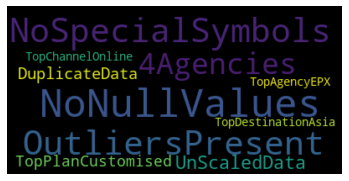

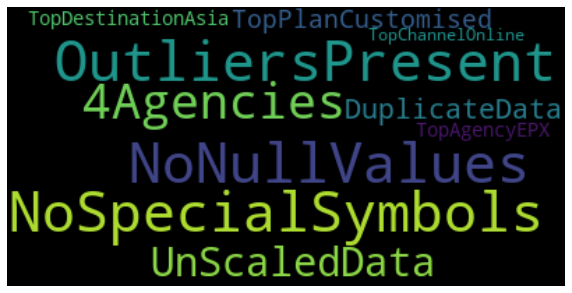

In [1105]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'sampleWords.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

In [1106]:
display(df)

spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                       0.8752            6.675   
1       15.99             14.89                       0.9064            5.363   
2       18.95             16.42                       0.8829            6.248   
3       10.83             12.96                       0.8099            5.278   
4       17.99             15.86                       0.8992            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                       0.8880            5.439   
206     16.77             15.62                       0.8638            5.927   
207     14.03             14.16                       0.8796            5.438   
208     16.12             15.00                       0.9000            5.709   
209     15.57             15.15                       0.8527            5.920   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0           3.763            3.252                         6.550  
1           3.582            3.336                         5.144  
2           3.755            3.368                         6.148  
3           2.641            5.182                         5.185  
4           3.694            2.068                         5.837  
..            ...              ...                           ...  
205         3.199            3.986                         4.738  
206         3.438            4.920                         5.795  
207         3.201            1.717                         5.001  
208         3.485            2.270                         5.443  
209         3.231            2.640                         5.879  

[210 rows x 7 columns]

## Visualizing the data - Before Standardizing

In [1107]:
from matplotlib.collections import PolyCollection
def setAlpha(ax,a):
    for art in ax.get_children():
        if isinstance(art, PolyCollection):
            art.set_alpha(a)

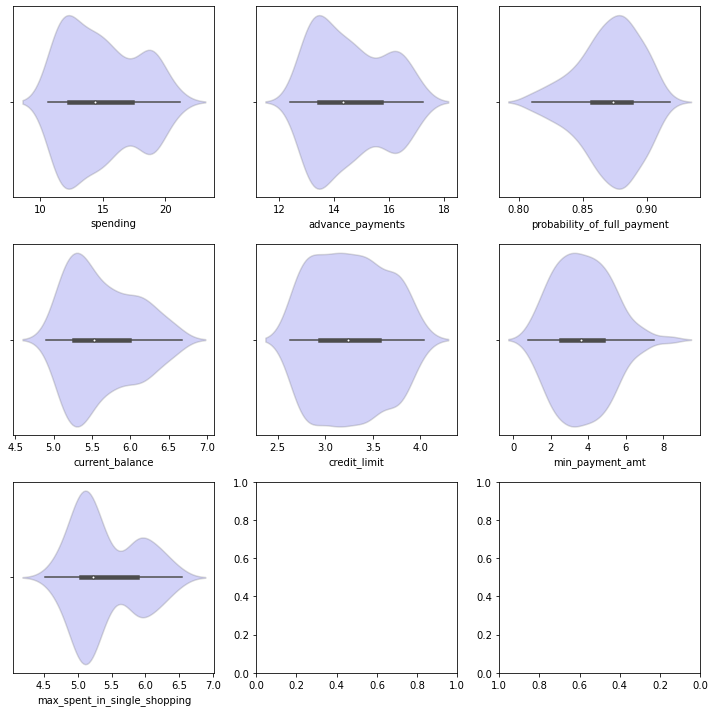

In [1108]:
fig, axs = plt.subplots(3, 3,figsize=(10,10))
j=0
k=0
plt.gca().invert_xaxis()
for i in df.columns:
    sns.violinplot(df[i],ax=axs[j,k],color='blue')
    setAlpha(axs[j,k],0.2)
    #sns.boxplot(df[i],ax=axs[j,k],color='green',boxprops=dict(alpha=.5))
    k=k+1
    if k==3:
        k=0
        j=j+1
fig.tight_layout()
plt.show()



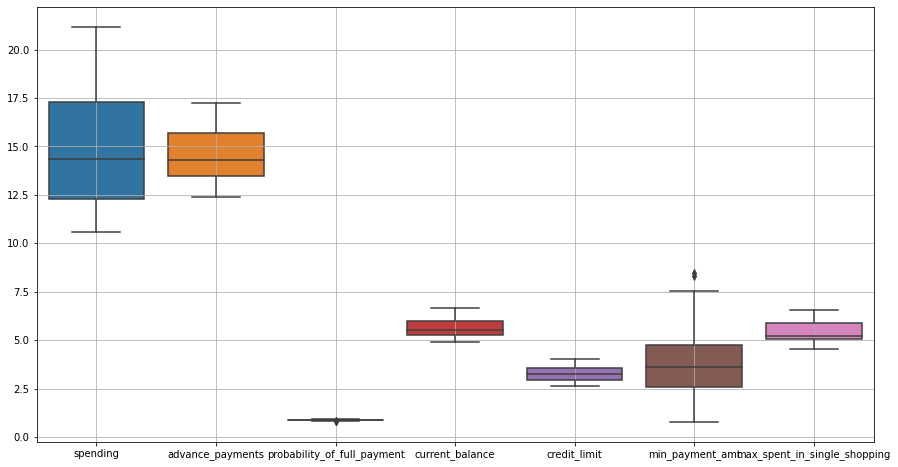

In [1109]:
fig, axes = plt.subplots()
fig.set_size_inches(15,8)
a = sns.boxplot(data=df, orient = "v" )
fig=a.get_figure()
plt.grid()
#fig.savefig('Outliers'+'.png',bbox_inches='tight')

## Outlier Count

In [1110]:
outlier_list=[]
q1,q3=np.percentile(df['min_payment_amt'],[25,75])
q1,q3
iqr=q3-q1
iqr
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
upper,lower
for i in df['min_payment_amt']:
    if i < lower or i > upper:
        outlier_list.append(i)
print("Outliers: {}".format(outlier_list))
print("Outlier Count: {}".format(len(outlier_list)))

Outliers: [8.456, 8.315]
Outlier Count: 2


## Converting the data to original scales

In [1111]:
df['spending']=df['spending']*1000
df['advance_payments']=df['advance_payments']*100
df['current_balance']=df['current_balance']*1000
df['credit_limit']=df['credit_limit']*10000
df['min_payment_amt']=df['min_payment_amt']*100
df['max_spent_in_single_shopping']=df['max_spent_in_single_shopping']*1000

In [1112]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0   19940.0            1692.0                       0.8752           6675.0   
1   15990.0            1489.0                       0.9064           5363.0   
2   18950.0            1642.0                       0.8829           6248.0   
3   10830.0            1296.0                       0.8099           5278.0   
4   17990.0            1586.0                       0.8992           5890.0   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0       37630.0            325.2                        6550.0  
1       35820.0            333.6                        5144.0  
2       37550.0            336.8                        6148.0  
3       26410.0            518.2                        5185.0  
4       36940.0            206.8                        5837.0

In [1113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [1114]:
df_org=df

In [781]:
my_report  = sw.analyze([df,'SweetViz_Report_Problem1'],target_feat='probability_of_full_payment')






                                   |                         | [  0%]   00:00  -> (? left)




Summarizing dataframe:             |                         | [  0%]   00:00  -> (? left)




:TARGET::                          |██▋                  | [ 12%]   00:00  -> (00:00 left)




:TARGET::                          |█████▎               | [ 25%]   00:00  -> (00:01 left)




:spending:                         |█████▎               | [ 25%]   00:00  -> (00:01 left)




:spending:                         |███████▉             | [ 38%]   00:00  -> (00:01 left)




:advance_payments:                 |███████▉             | [ 38%]   00:00  -> (00:01 left)




:advance_payments:                 |██████████▌          | [ 50%]   00:01  -> (00:01 left)




:current_balance:                  |██████████▌          | [ 50%]   00:01  -> (00:01 left)




:current_balance:                  |█████████████▏       | [ 62%]   00:01  -> (00:01 left)




:credit_limit:                     |█████████

Creating Associations graph... DONE!


In [782]:
my_report.show_html('SweetViz_Report_Problem1.html')

In [783]:
IFrame(src='SweetViz_Report_Problem1.html', width=2000, height=600)

## Standardizing the data

In [1115]:
sc = StandardScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [1116]:
df

spending  advance_payments  probability_of_full_payment  current_balance  \
0    1.754355          1.811968                     0.178230         2.367533   
1    0.393582          0.253840                     1.501773        -0.600744   
2    1.413300          1.428192                     0.504874         1.401485   
3   -1.384034         -1.227533                    -2.591878        -0.793049   
4    1.082581          0.998364                     1.196340         0.591544   
..        ...               ...                          ...              ...   
205 -0.329866         -0.413929                     0.721222        -0.428801   
206  0.662292          0.814152                    -0.305372         0.675253   
207 -0.281636         -0.306472                     0.364883        -0.431064   
208  0.438367          0.338271                     1.230277         0.182048   
209  0.248893          0.453403                    -0.776248         0.659416   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  
0        1.338579        -0.298806                      2.328998  
1        0.858236        -0.242805                     -0.538582  
2        1.317348        -0.221471                      1.509107  
3       -1.639017         0.987884                     -0.454961  
4        1.155464        -1.088154                      0.874813  
..            ...              ...                           ...  
205     -0.158181         0.190536                     -1.366631  
206      0.476084         0.813214                      0.789153  
207     -0.152873        -1.322158                     -0.830235  
208      0.600814        -0.953484                      0.071238  
209     -0.073258        -0.706813                      0.960473  

[210 rows x 7 columns]

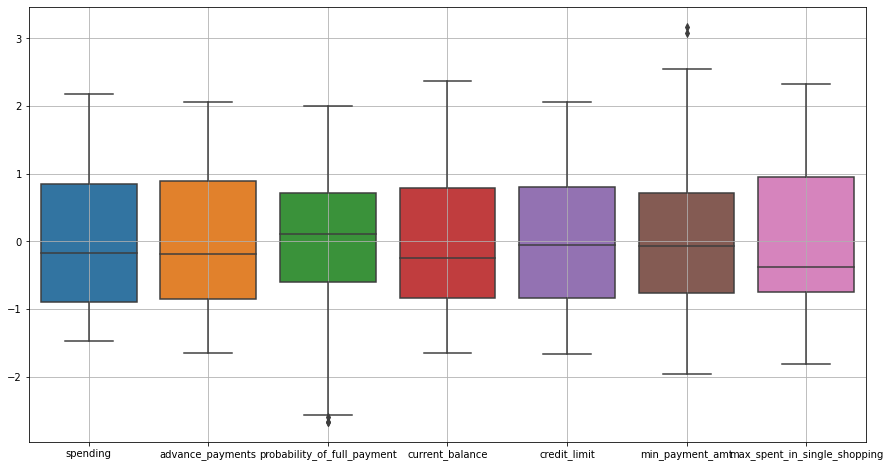

In [1117]:
fig, axes = plt.subplots()
fig.set_size_inches(15,8)
a = sns.boxplot(data=df, orient = "v" )
fig=a.get_figure()
plt.grid()
#fig.savefig('Outliers'+'.png',bbox_inches='tight')

## Checking for skewness in data

In [1118]:
import scipy.stats as stats
pd.DataFrame(stats.skew(df),index=df.columns,columns=['Amount of Skewness'])

Amount of Skewness
spending                                0.397027
advance_payments                        0.383806
probability_of_full_payment            -0.534104
current_balance                         0.521721
credit_limit                            0.133416
min_payment_amt                         0.398793
max_spent_in_single_shopping            0.557876

##  BiVariate Analysis

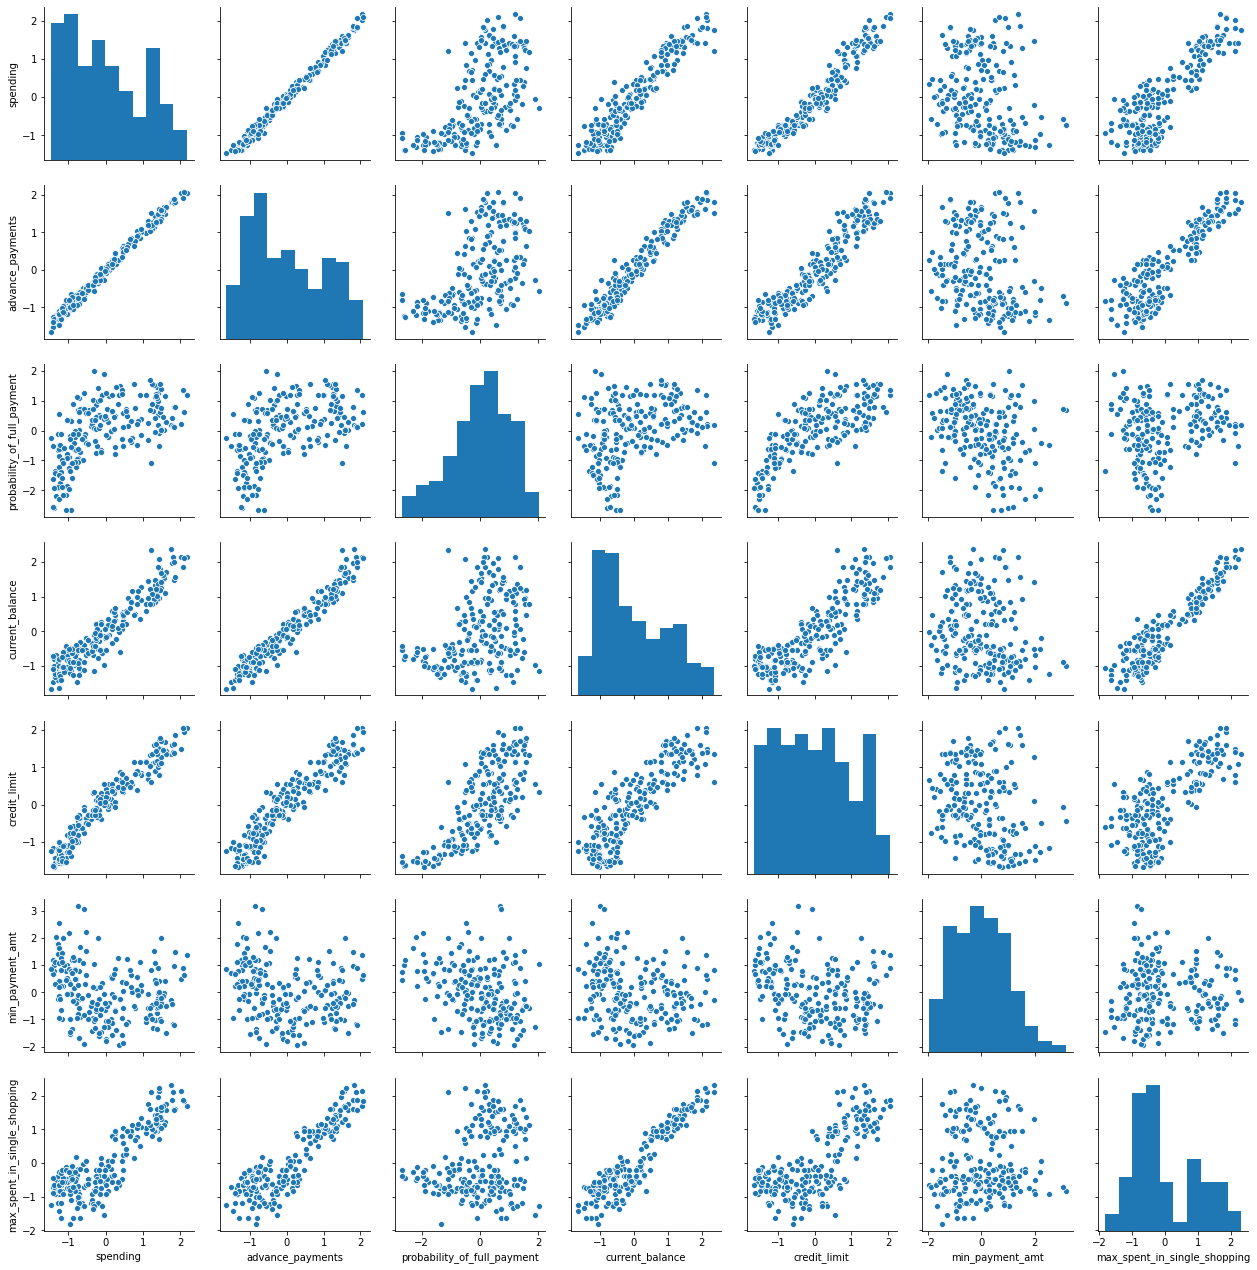

In [1119]:
#fig=plt.figure(figsize=(10,10))
sns.pairplot(df).savefig('out.png')

### High Multicollinearity

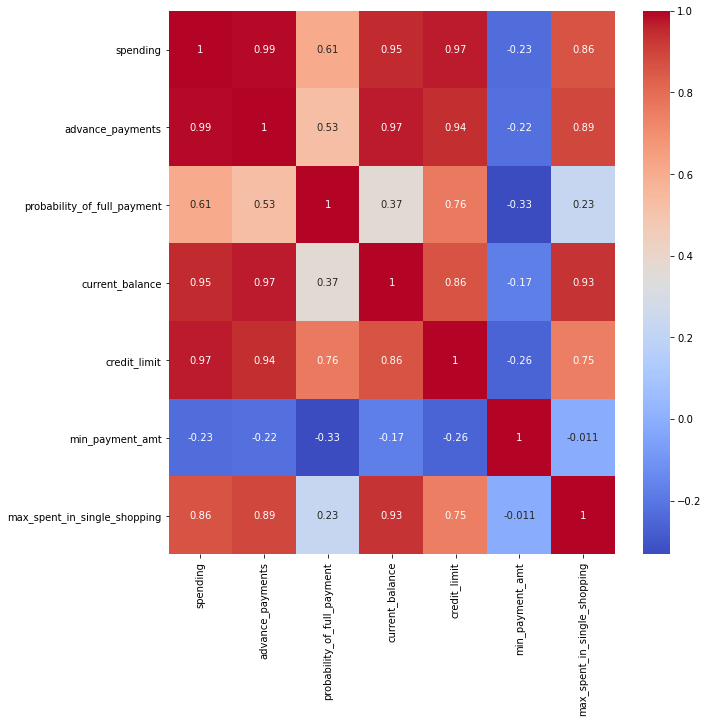

In [1120]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Figure size 720x720 with 0 Axes>

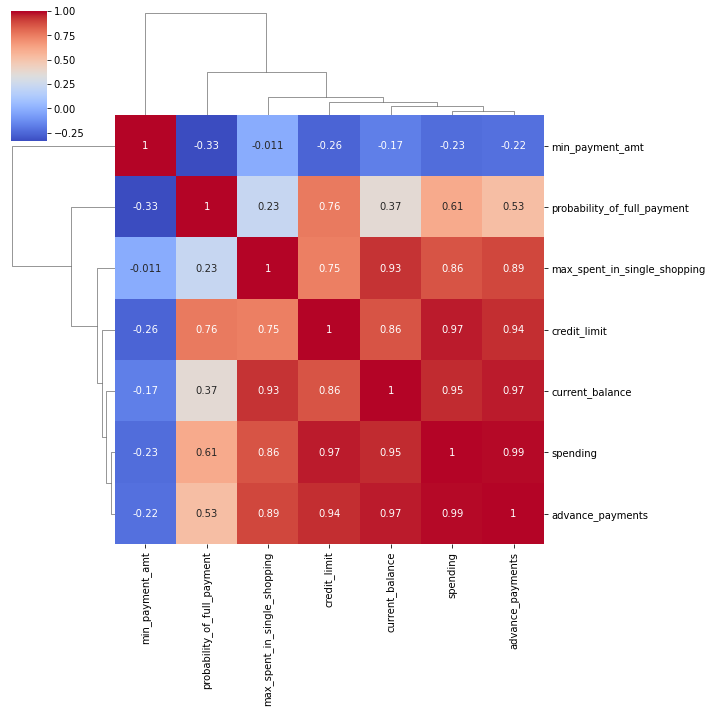

In [1121]:
plt.figure(figsize=(10,10))
sns.clustermap(df.corr(),cmap='coolwarm',annot=True)

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

### Yes, scaling is required for this data set as the original data given to us is not scaled properly. Although the data has been scaled, however it has not been scaled as per a standard scale across different columns. We can see some of the columns are scaled to the hundreds (100s), some are scaled to thousands (1000s) while some other are scaled to ten thousands (10000s). Hence it becomes very important to first convert these columns into the absolute values and then apply standard scaling hence moving all the values to a scale of -1 to +1.

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them



In [1122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)

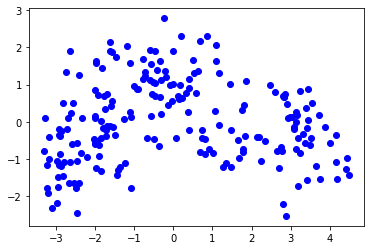

In [1123]:
for i in range(0, pca_2d.shape[0]):
    plt.scatter(pca_2d[i,0],pca_2d[i,1],color='blue')

In [1124]:
from scipy.cluster.hierarchy import dendrogram, linkage
link_ward = linkage(df, method = 'ward')
link_avg = linkage(df, method = 'average')
link_complete = linkage(df, method = 'complete')

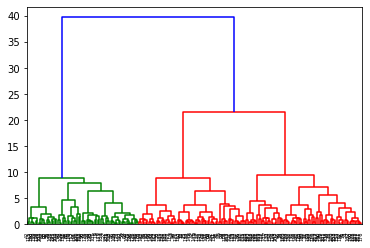

In [1125]:
dend_ward=dendrogram(link_ward,distance_sort=True)

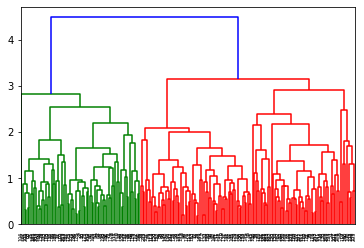

In [1126]:
dend_avg = dendrogram(link_avg)

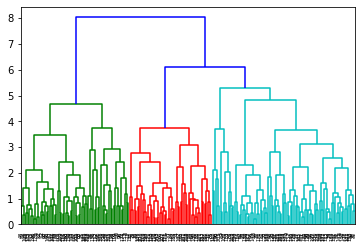

In [1127]:
dend_complete = dendrogram(link_complete)

In [1143]:
#Method 1
from scipy.cluster.hierarchy import fcluster
clusters_ward = fcluster(link_ward, 10, criterion='distance')
clusters_avg = fcluster(link_avg, 3, criterion='distance')
clusters_complete = fcluster(link_complete, 5, criterion='distance')

In [1144]:
pd.Series(clusters_ward).value_counts()

3    73
1    70
2    67
dtype: int64

In [1145]:
pd.Series(clusters_avg).value_counts()

1    75
2    70
3    65
dtype: int64

In [1146]:
pd.Series(clusters_complete).value_counts()

4    76
1    68
2    52
3    14
dtype: int64

In [1132]:
#Method 2
# from scipy.cluster.hierarchy import fcluster
# clusters_ward = fcluster(link_ward, 5, criterion='maxclust')
# clusters_avg = fcluster(link_avg, 5, criterion='maxclust')
# clusters_complete = fcluster(link_complete, 5, criterion='maxclust')

In [1147]:
df['clusters_ward']=clusters_ward
df['clusters_avg']=clusters_avg
df['clusters_complete']=clusters_complete

In [1148]:
df.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  clusters_ward  \
0      1.338579        -0.298806                      2.328998              1   
1      0.858236        -0.242805                     -0.538582              3   
2      1.317348        -0.221471                      1.509107              1   
3     -1.639017         0.987884                     -0.454961              2   
4      1.155464        -1.088154                      0.874813              1   

   clusters_avg  clusters_complete  
0             1                  1  
1             3                  2  
2             1                  1  
3             2                  4  
4             1                  1

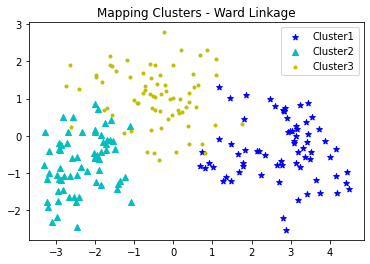

<Figure size 720x720 with 0 Axes>

In [1149]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if df.clusters_ward[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    elif df.clusters_ward[i] == 2:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='^')
    elif df.clusters_ward[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='.')
pl.legend([c1, c2, c3], ['Cluster1','Cluster2','Cluster3'])
pl.title('Mapping Clusters - Ward Linkage')
plt.figure(figsize=(10,10))
pl.show()

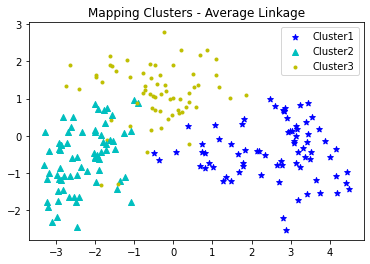

In [1150]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if df.clusters_avg[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    elif df.clusters_avg[i] == 2:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='^')
    elif df.clusters_avg[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='.')
pl.legend([c1, c2, c3], ['Cluster1','Cluster2','Cluster3'])
pl.title('Mapping Clusters - Average Linkage')
pl.show()

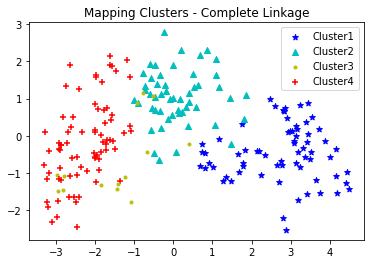

In [1151]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if df.clusters_complete[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    elif df.clusters_complete[i] == 2:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='^')
    elif df.clusters_complete[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='.')
    elif df.clusters_complete[i] == 4:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
pl.legend([c1, c2, c3,c4], ['Cluster1','Cluster2','Cluster3','Cluster4'])
pl.title('Mapping Clusters - Complete Linkage')
pl.show()

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [807]:
df2=df.drop(['clusters_ward','clusters_avg','clusters_complete'],axis=1)

In [808]:
df2.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  
0      1.338579        -0.298806                      2.328998  
1      0.858236        -0.242805                     -0.538582  
2      1.317348        -0.221471                      1.509107  
3     -1.639017         0.987884                     -0.454961  
4      1.155464        -1.088154                      0.874813

### Applying Elbow Curve Model Evaluation Method

In [809]:
from sklearn.cluster import KMeans 
wss=[]
for i in range(1,7):
    KM = KMeans(n_clusters=i,random_state=0)
    KM.fit(df2)
    wss.append(KM.inertia_)

In [810]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.65314399951615,
 326.76706714696616,
 289.3124315282333]

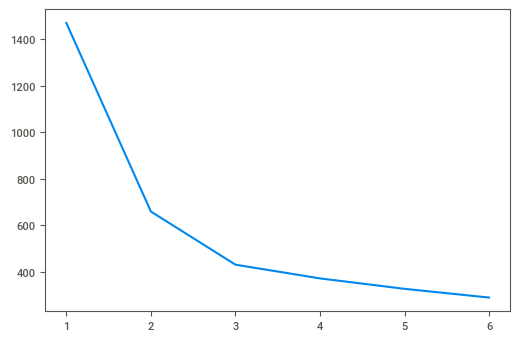

In [811]:
plt.plot(range(1,7), wss)

In [812]:
from sklearn.metrics import silhouette_score,silhouette_samples
sil_score_list=[]
for i in range(2,7):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df2)
    sil_score = silhouette_score(df2,KM.labels_)
    sil_score_list.append(round(sil_score,4))

In [1290]:
sil_score_list

[0.4658, 0.4007, 0.3277, 0.2827, 0.2886]

### Applying Average Silhouette Score Model Evaluation Method

For n_clusters = 2 The average silhouette_score is : 0.46577247686580914
For n_clusters = 3 The average silhouette_score is : 0.4007270552751299
For n_clusters = 4 The average silhouette_score is : 0.3291966792017614
For n_clusters = 5 The average silhouette_score is : 0.28597151037326085
For n_clusters = 6 The average silhouette_score is : 0.27286803076383404


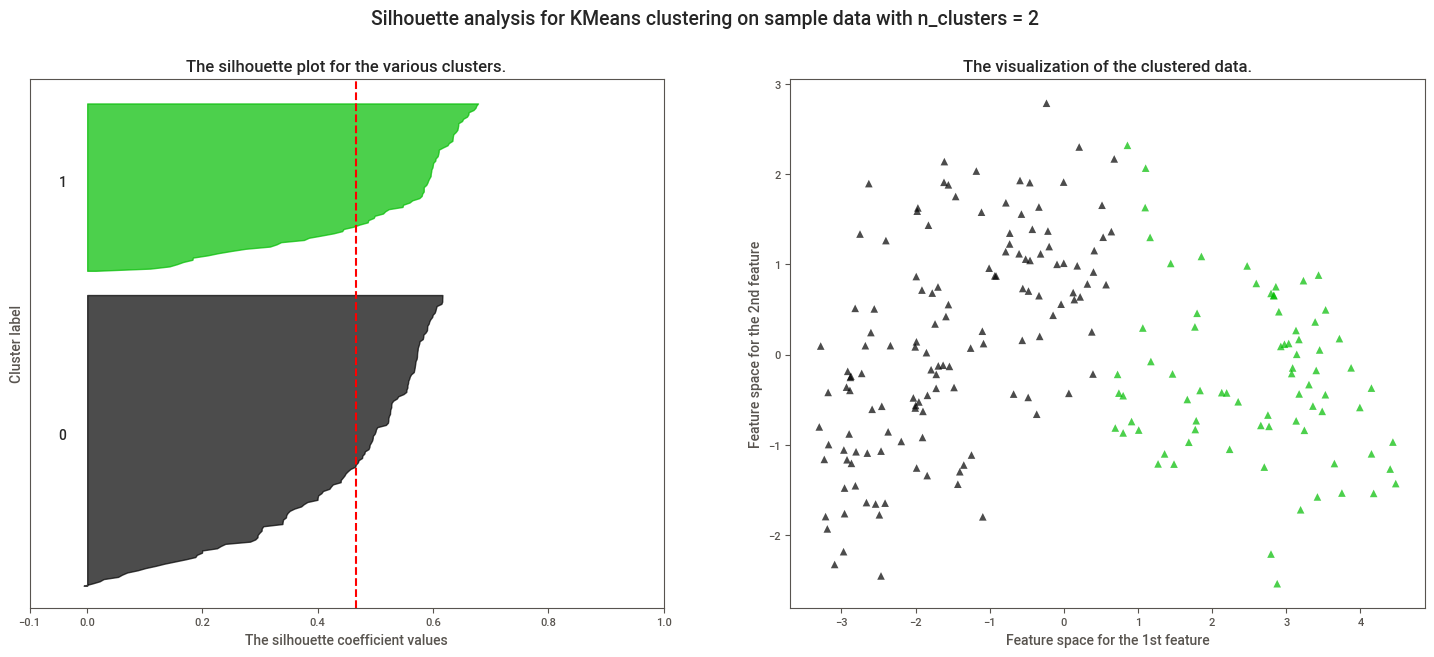

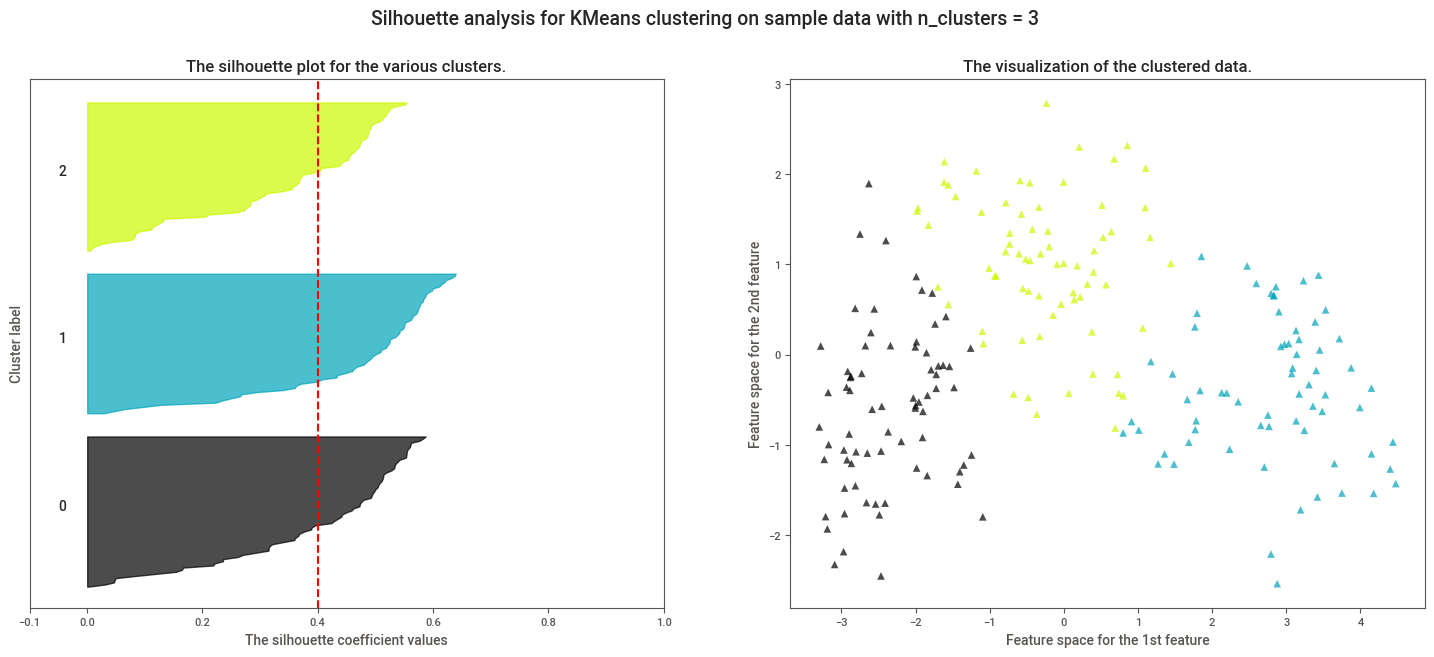

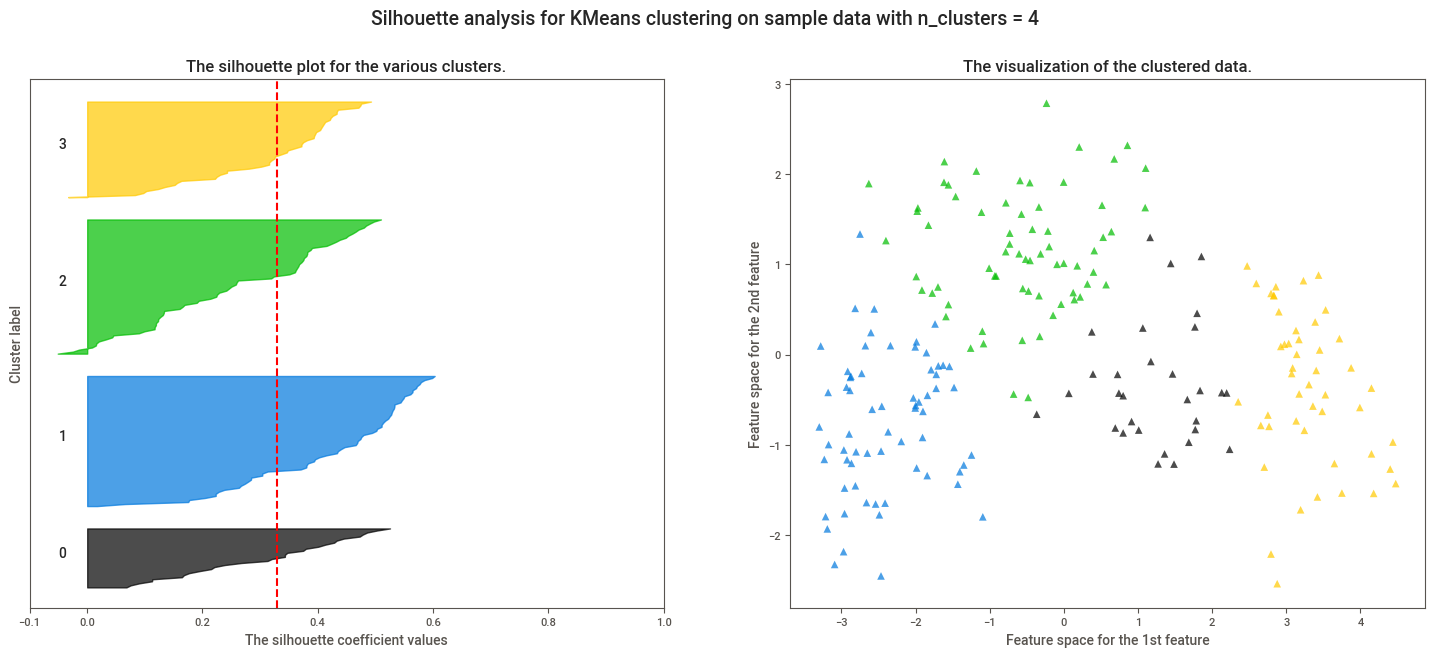

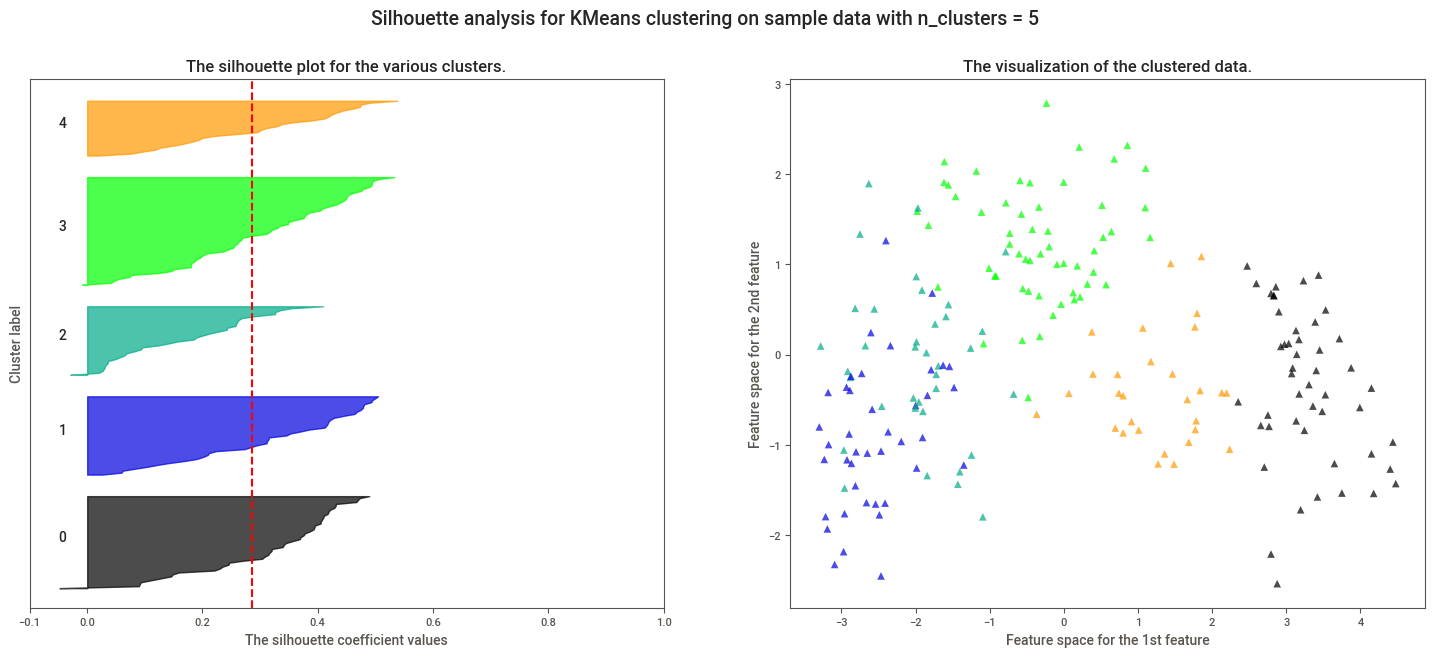

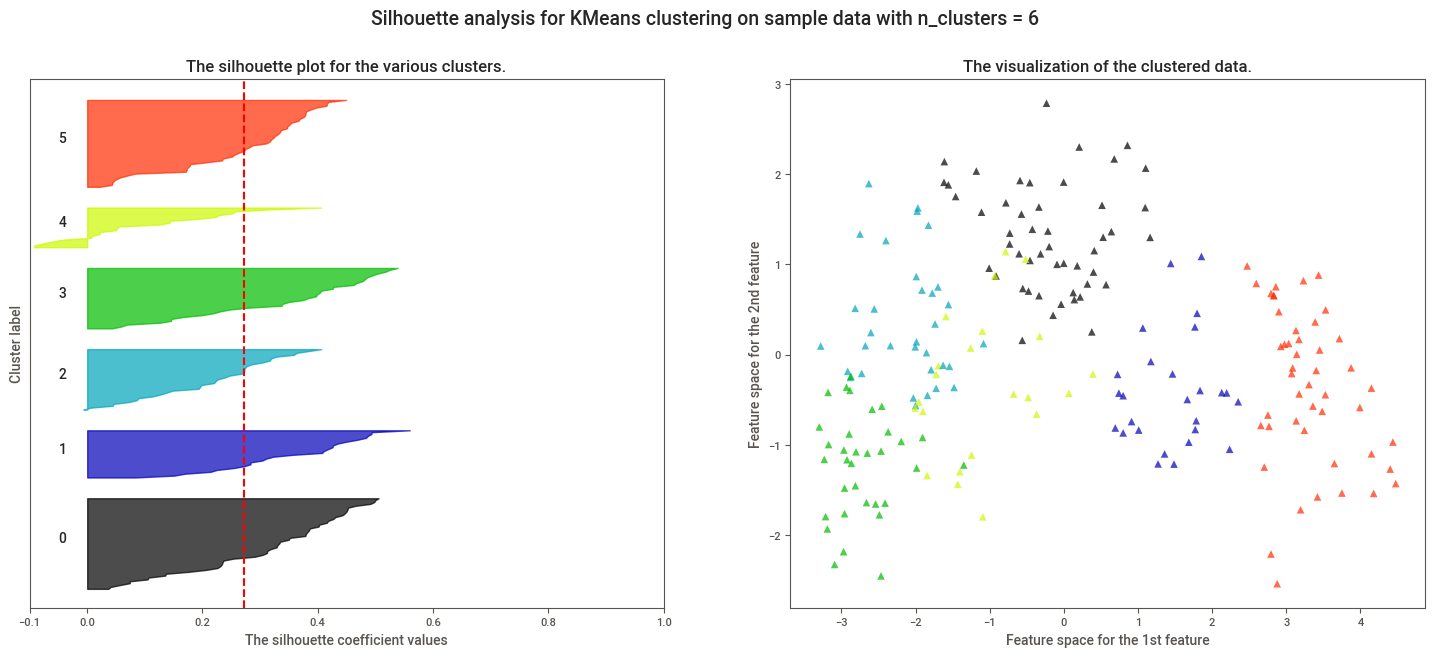

In [814]:
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df2) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df2)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df2, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        #Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   
    ax2.scatter(pca_2d[:,0],pca_2d[:,1],marker='^', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [815]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df2)
labels = k_means.labels_

In [816]:
df2['kmeans_clus']=labels

In [817]:
df2.head()

spending  advance_payments  probability_of_full_payment  current_balance  \
0  1.754355          1.811968                     0.178230         2.367533   
1  0.393582          0.253840                     1.501773        -0.600744   
2  1.413300          1.428192                     0.504874         1.401485   
3 -1.384034         -1.227533                    -2.591878        -0.793049   
4  1.082581          0.998364                     1.196340         0.591544   

   credit_limit  min_payment_amt  max_spent_in_single_shopping  kmeans_clus  
0      1.338579        -0.298806                      2.328998            2  
1      0.858236        -0.242805                     -0.538582            0  
2      1.317348        -0.221471                      1.509107            2  
3     -1.639017         0.987884                     -0.454961            1  
4      1.155464        -1.088154                      0.874813            2

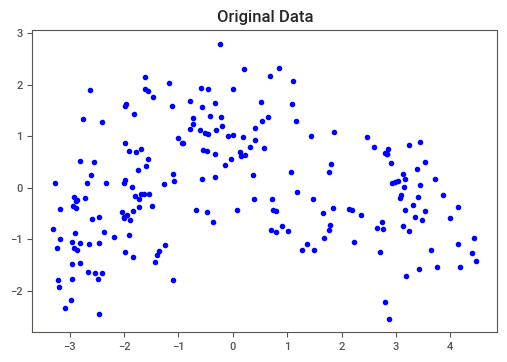

In [818]:
for i in range(0, pca_2d.shape[0]):
    plt.scatter(pca_2d[i,0],pca_2d[i,1],color='blue')
    plt.title('Original Data')

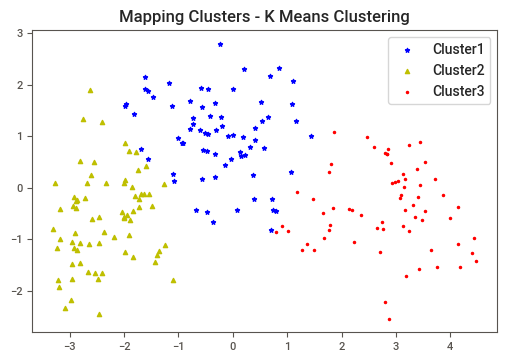

In [819]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if df2.kmeans_clus[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    elif df2.kmeans_clus[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='^')
    elif df2.kmeans_clus[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='.')
pl.legend([c1, c2, c3], ['Cluster1','Cluster2','Cluster3'])
pl.title('Mapping Clusters - K Means Clustering')
pl.show()

In [820]:
df2.kmeans_clus.value_counts().sort_index()

0    71
1    72
2    67
Name: kmeans_clus, dtype: int64

In [821]:
df_org['cluster']=labels
df_org

spending  advance_payments  probability_of_full_payment  current_balance  \
0     19940.0            1692.0                       0.8752           6675.0   
1     15990.0            1489.0                       0.9064           5363.0   
2     18950.0            1642.0                       0.8829           6248.0   
3     10830.0            1296.0                       0.8099           5278.0   
4     17990.0            1586.0                       0.8992           5890.0   
..        ...               ...                          ...              ...   
205   13890.0            1402.0                       0.8880           5439.0   
206   16770.0            1562.0                       0.8638           5927.0   
207   14030.0            1416.0                       0.8796           5438.0   
208   16120.0            1500.0                       0.9000           5709.0   
209   15570.0            1515.0                       0.8527           5920.0   

     credit_limit  min_payment_amt  max_spent_in_single_shopping  cluster  
0         37630.0            325.2                        6550.0        2  
1         35820.0            333.6                        5144.0        0  
2         37550.0            336.8                        6148.0        2  
3         26410.0            518.2                        5185.0        1  
4         36940.0            206.8                        5837.0        2  
..            ...              ...                           ...      ...  
205       31990.0            398.6                        4738.0        0  
206       34380.0            492.0                        5795.0        2  
207       32010.0            171.7                        5001.0        0  
208       34850.0            227.0                        5443.0        0  
209       32310.0            264.0                        5879.0        0  

[210 rows x 8 columns]

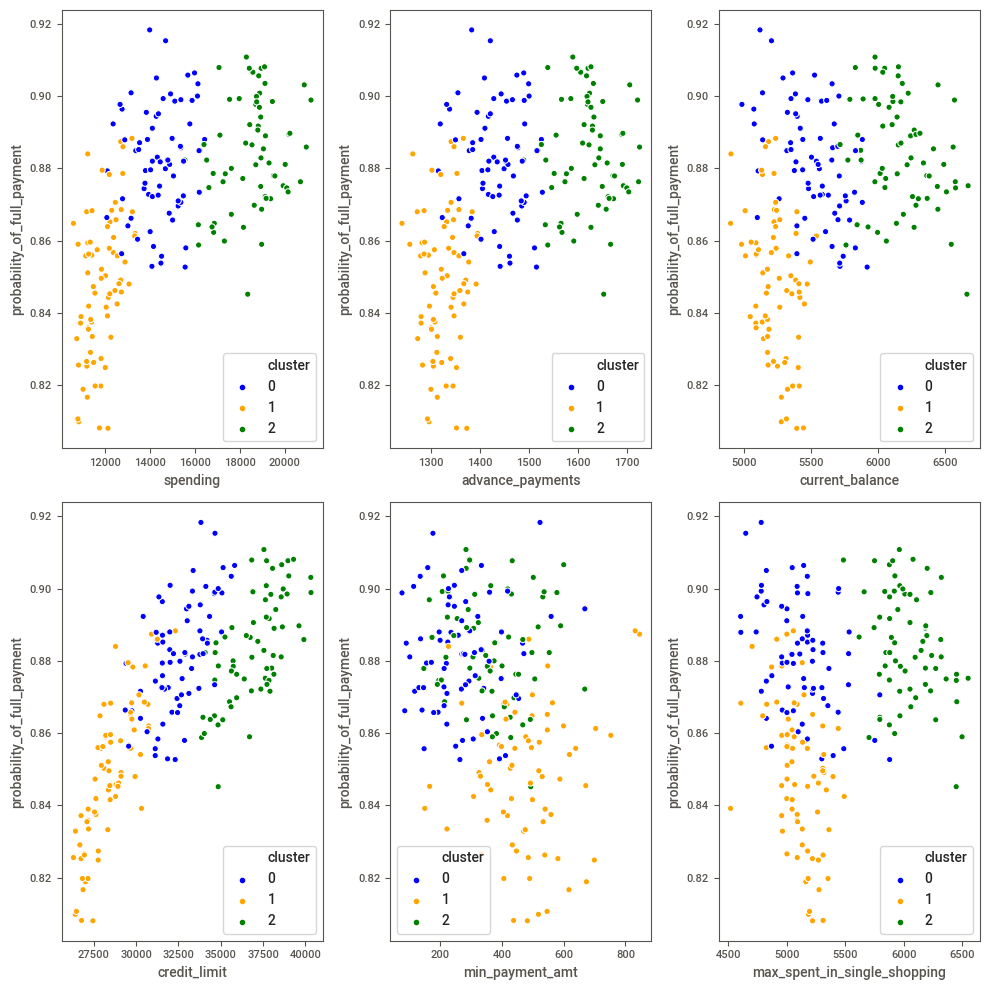

In [852]:
fig, axs = plt.subplots(2, 3,figsize=(10,10))
j=0
k=0
for i in df_org.columns.drop(['probability_of_full_payment','cluster']):
    sns.scatterplot(df_org[i],df_org['probability_of_full_payment'],hue=df_org['cluster'],ci=None,ax=axs[j,k],palette=['blue','orange','green'],s=20)
    k=k+1
    if k==3:
        k=0
        j=j+1
fig.tight_layout()
plt.show()

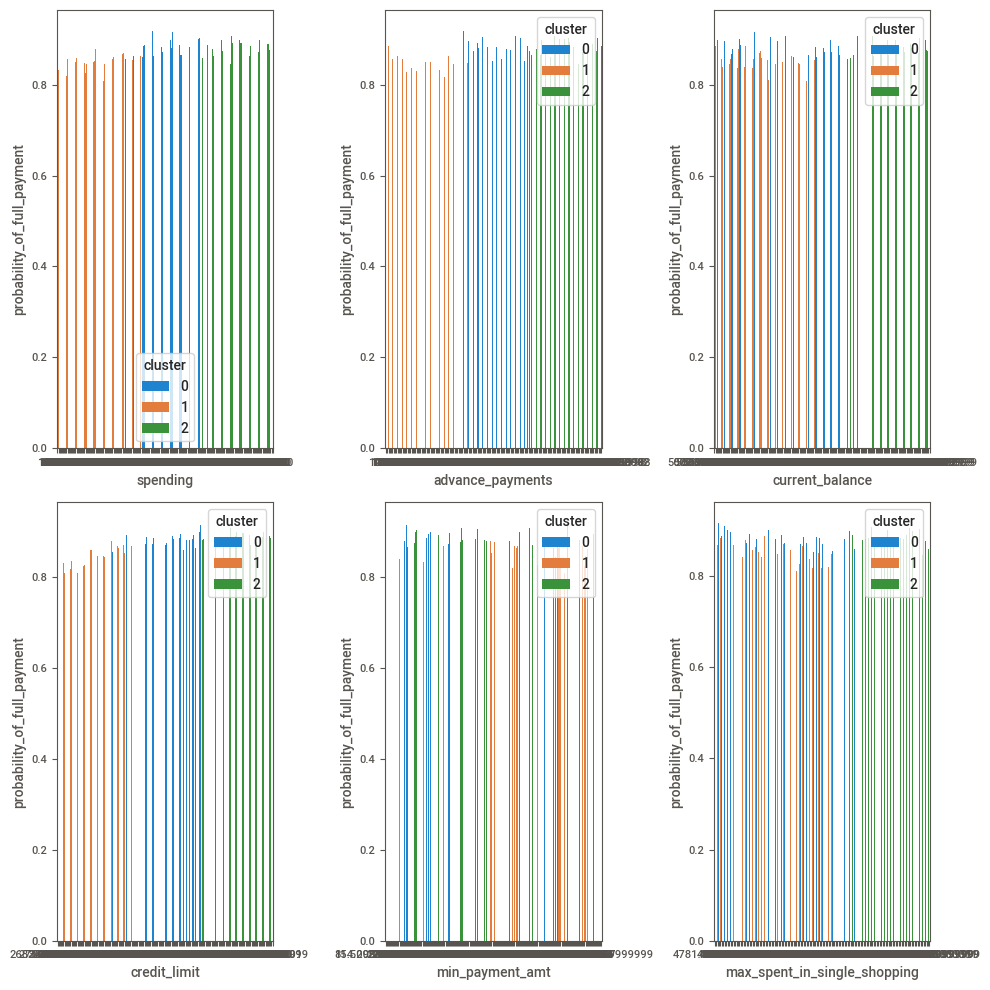

In [844]:
fig, axs = plt.subplots(2, 3,figsize=(10,10))
j=0
k=0
for i in df_org.columns.drop(['probability_of_full_payment','cluster']):
    sns.barplot(df_org[i],df_org['probability_of_full_payment'],hue=df_org['cluster'],ci=None,ax=axs[j,k])
    k=k+1
    if k==3:
        k=0
        j=j+1
fig.tight_layout()
plt.show()

In [827]:
clust_profile=df_org
clust_profile=clust_profile.groupby('cluster').mean()
clust_profile['freq']=df2.kmeans_clus.value_counts().sort_index()
clust_profile

spending  advance_payments  probability_of_full_payment  \
cluster                                                                
0        14437.887324       1433.774648                     0.881597   
1        11856.944444       1324.777778                     0.848253   
2        18495.373134       1620.343284                     0.884210   

         current_balance  credit_limit  min_payment_amt  \
cluster                                                   
0            5514.577465  32592.253521       270.734085   
1            5231.750000  28495.416667       474.238889   
2            6175.686567  36975.373134       363.237313   

         max_spent_in_single_shopping  freq  
cluster                                      
0                         5120.802817    71  
1                         5101.722222    72  
2                         6041.701493    67

In [828]:
clust_profile['cluster']=[0,1,2]

In [829]:
clust_profile

spending  advance_payments  probability_of_full_payment  \
cluster                                                                
0        14437.887324       1433.774648                     0.881597   
1        11856.944444       1324.777778                     0.848253   
2        18495.373134       1620.343284                     0.884210   

         current_balance  credit_limit  min_payment_amt  \
cluster                                                   
0            5514.577465  32592.253521       270.734085   
1            5231.750000  28495.416667       474.238889   
2            6175.686567  36975.373134       363.237313   

         max_spent_in_single_shopping  freq  cluster  
cluster                                               
0                         5120.802817    71        0  
1                         5101.722222    72        1  
2                         6041.701493    67        2

In [830]:
clust_profile.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'freq', 'cluster'],
      dtype='object')

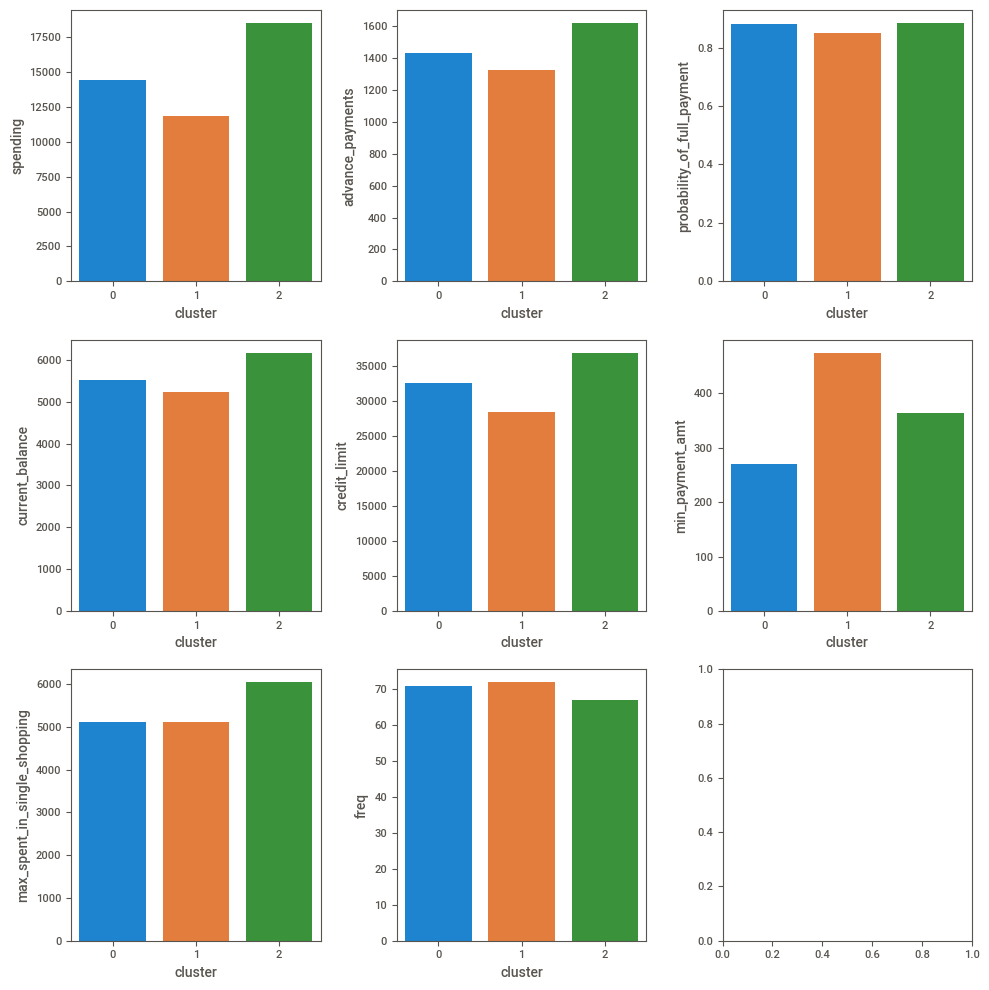

In [856]:
fig, axs = plt.subplots(3, 3,figsize=(10,10))
j=0
k=0
for i in clust_profile.columns:
    if i == 'cluster':
        pass
    else:
        sns.barplot(clust_profile['cluster'],clust_profile[i],ax=axs[j,k])
        k=k+1
        if k==3:
            k=0
            j=j+1
fig.tight_layout()
plt.show()

<br>

<br>

<br>

# Question 2

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [940]:
df=pd.read_csv('insurance_part2_data.csv')

In [941]:
df_org=df.copy()

## Info and Describe

In [942]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [943]:
df.describe()

Age    Commision     Duration        Sales
count  3000.000000  3000.000000  3000.000000  3000.000000
mean     38.091000    14.529203    70.001333    60.249913
std      10.463518    25.481455   134.053313    70.733954
min       8.000000     0.000000    -1.000000     0.000000
25%      32.000000     0.000000    11.000000    20.000000
50%      36.000000     4.630000    26.500000    33.000000
75%      42.000000    17.235000    63.000000    69.000000
max      84.000000   210.210000  4580.000000   539.000000

In [944]:
df.head()

Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No       0.70  Online         7   2.51   
1   36         EPX  Travel Agency      No       0.00  Online        34  20.00   
2   39         CWT  Travel Agency      No       5.94  Online         3   9.90   
3   36         EPX  Travel Agency      No       0.00  Online         4  26.00   
4   33         JZI       Airlines      No       6.30  Online        53  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA

## No Null Values

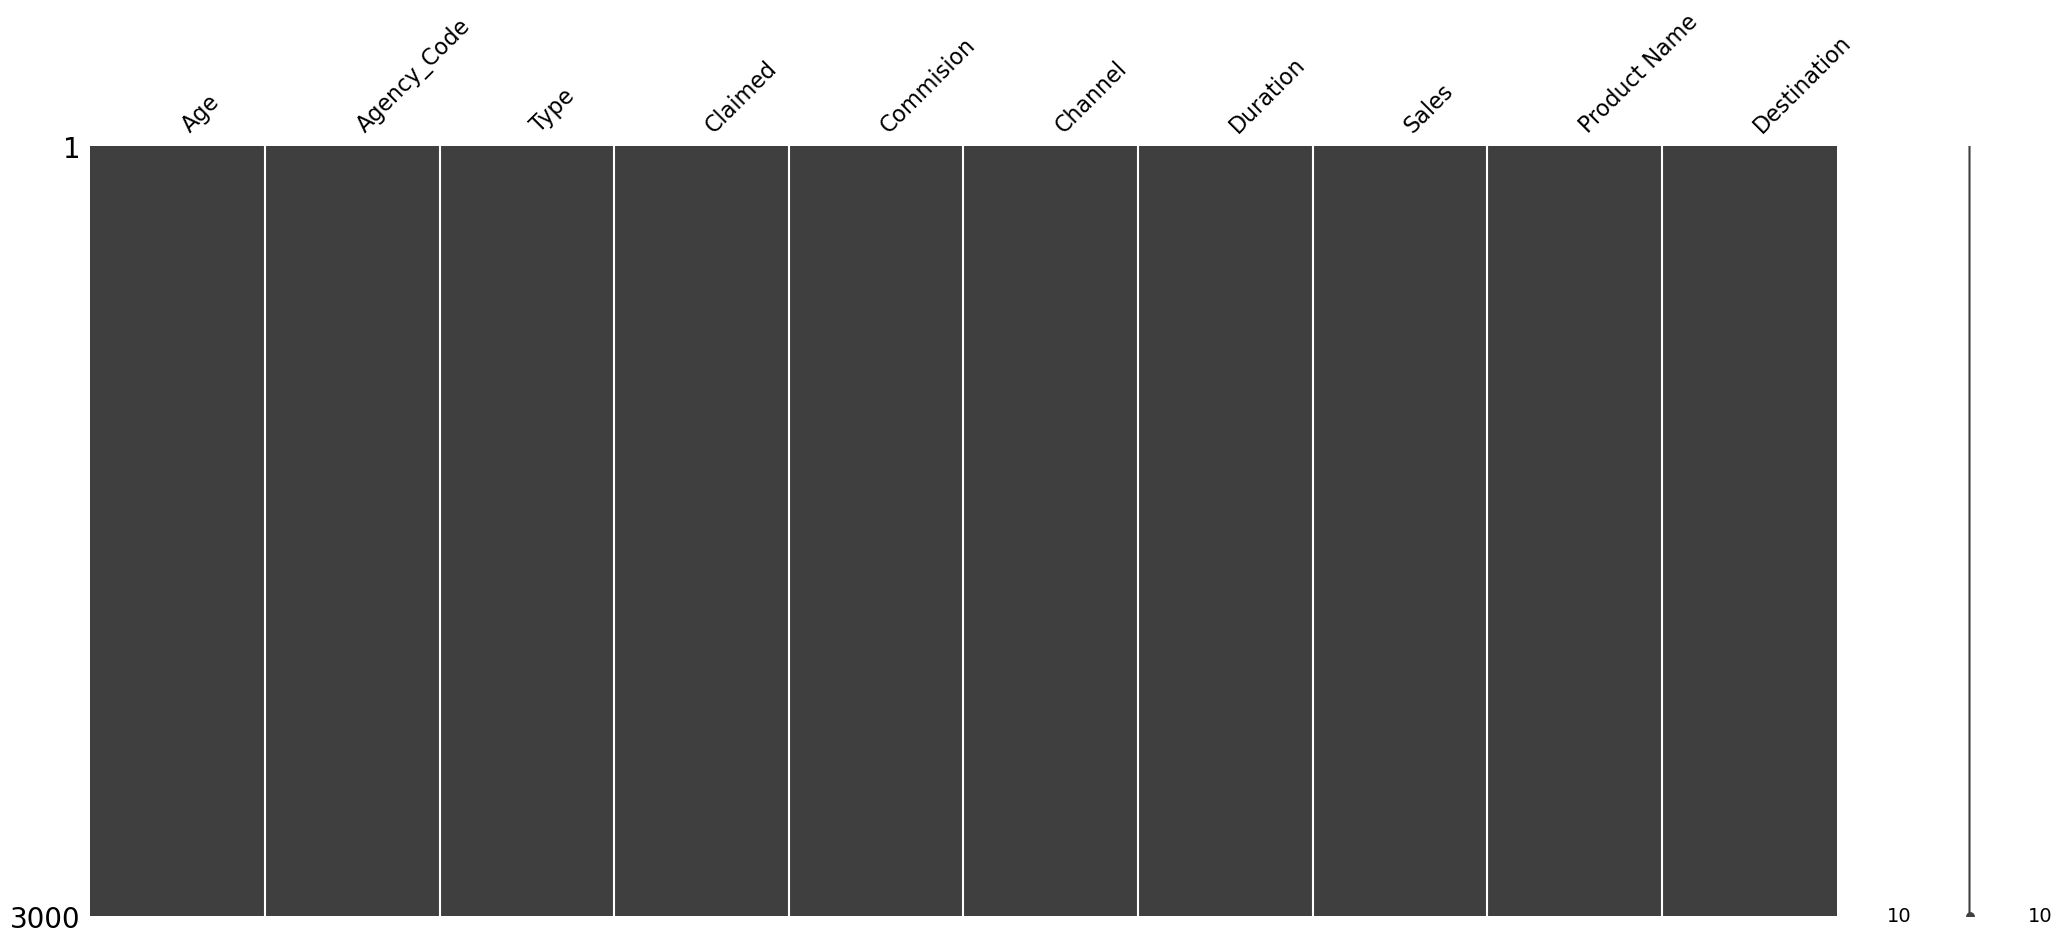

In [945]:
msno.matrix(df)

In [946]:
df.isna().sum().sum()

0

In [947]:
df.isnull().sum().sum()

0

# Univriate Analysis

In [948]:
df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
0      48         C2B       Airlines      No       0.70  Online         7   
1      36         EPX  Travel Agency      No       0.00  Online        34   
2      39         CWT  Travel Agency      No       5.94  Online         3   
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
...   ...         ...            ...     ...        ...     ...       ...   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2998   34         C2B       Airlines     Yes       7.64  Online        39   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales       Product Name Destination  
0       2.51    Customised Plan        ASIA  
1      20.00    Customised Plan        ASIA  
2       9.90    Customised Plan    Americas  
3      26.00  Cancellation Plan        ASIA  
4      18.00        Bronze Plan        ASIA  
...      ...                ...         ...  
2995  256.20          Gold Plan    Americas  
2996   54.00          Gold Plan        ASIA  
2997   28.00    Customised Plan        ASIA  
2998   30.55        Bronze Plan        ASIA  
2999   33.00        Bronze Plan        ASIA  

[3000 rows x 10 columns]

In [949]:
df['Agency_Code'].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [950]:
df['Type'].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [951]:
df['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [952]:
df['Channel'].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [953]:
df['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [954]:
df['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

In [955]:
sns.reset_defaults()

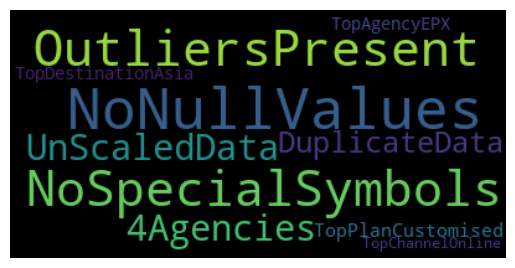

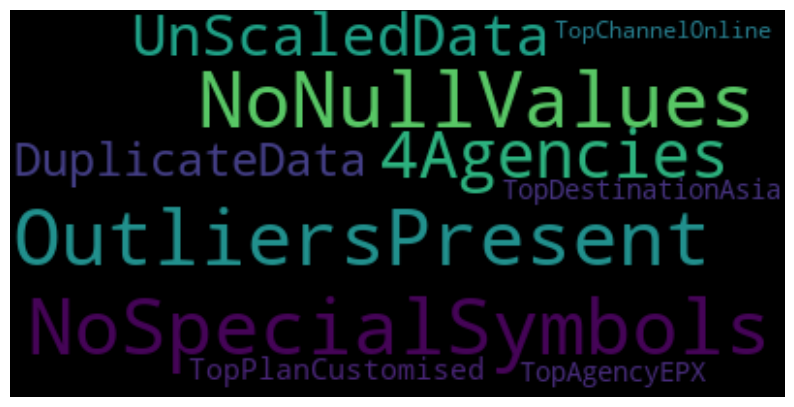

In [956]:
import os

from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'sampleWords.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
# image.show()

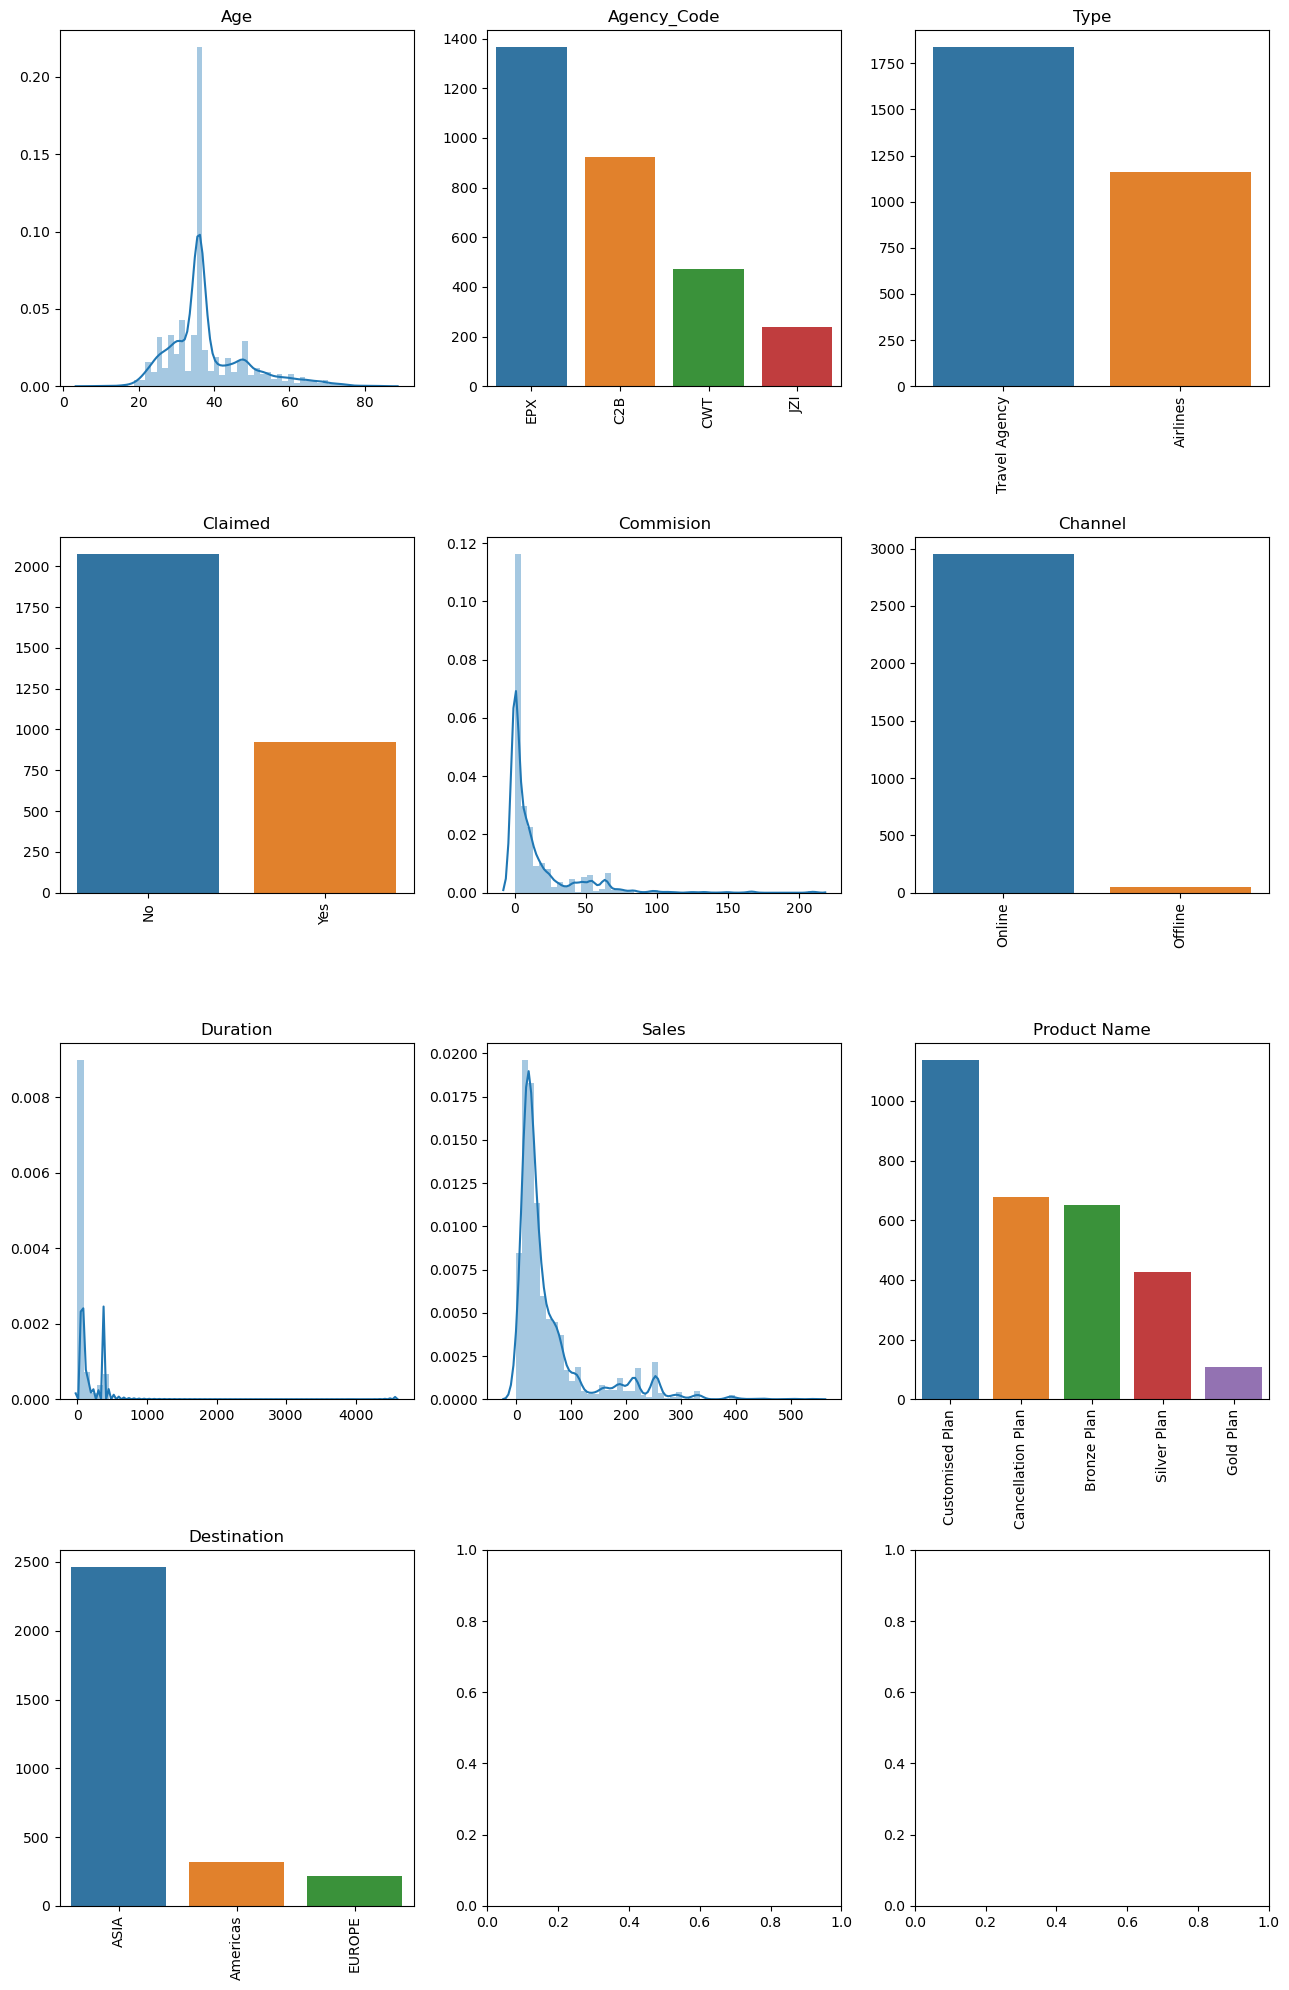

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [958]:
import seaborn as sns
fig, axs = plt.subplots(4, 3,figsize=(13,20))
j=0
k=0
for i in df.columns:
    if df[i].dtype == 'object':
        ax=sns.barplot(df[i].value_counts().index,df[i].value_counts().values,ax=axs[j,k])
        ax.set_title(i)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        
        #sns.set(font_scale=2,style='dark')
        #sns.set_context('poster')
    elif df[i].dtype != 'object':
        plt.figure(figsize=(15,15))
        sns.distplot(df[i],ax=axs[j,k]).set_title(i,y=1)
        axs[j,k].set_xlabel('')
    k=k+1
    if k==3:
        k=0
        j=j+1
fig.tight_layout()
fig.savefig('des.jpg')
plt.show()

## BiVariate Analysis

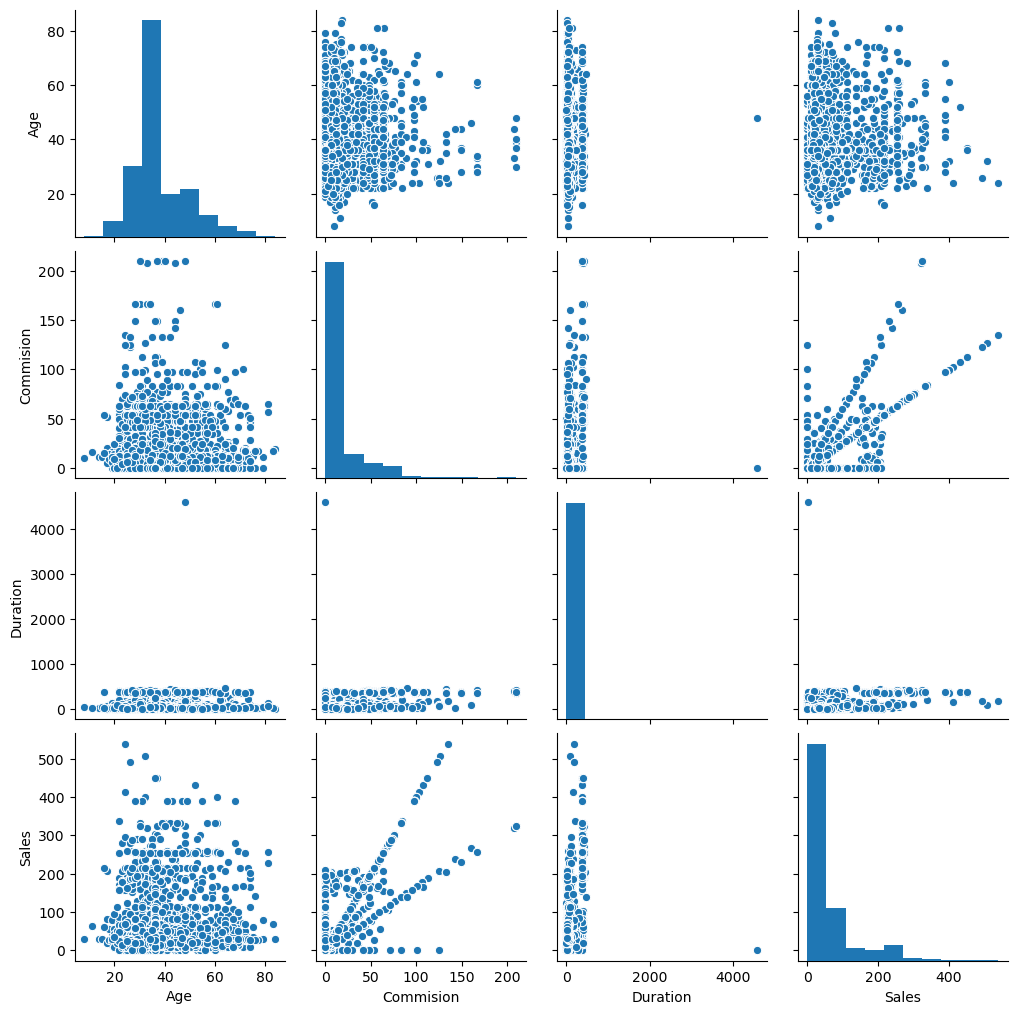

In [959]:
sns.pairplot(df_org)

<Figure size 300x300 with 0 Axes>

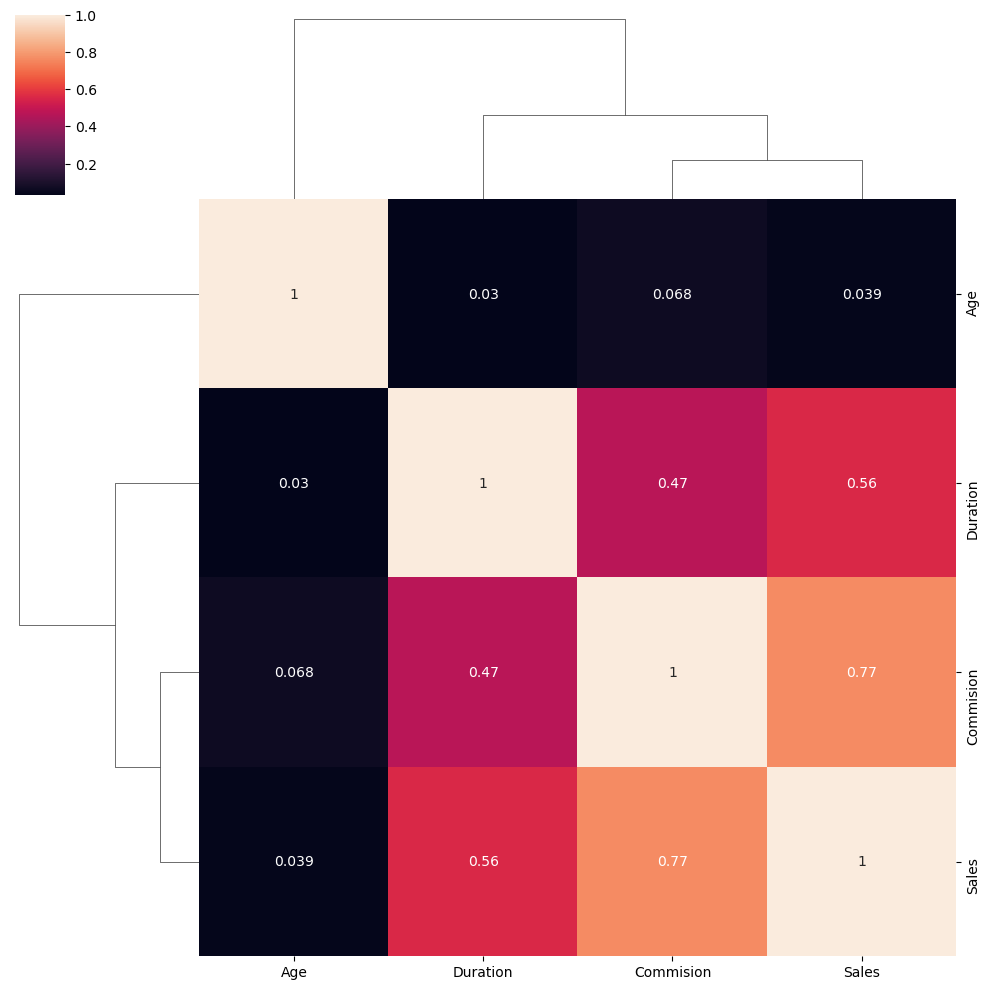

In [960]:
plt.figure(figsize=(3,3))
sns.clustermap(df_org.corr(),annot=True)

## Outlier Analysis

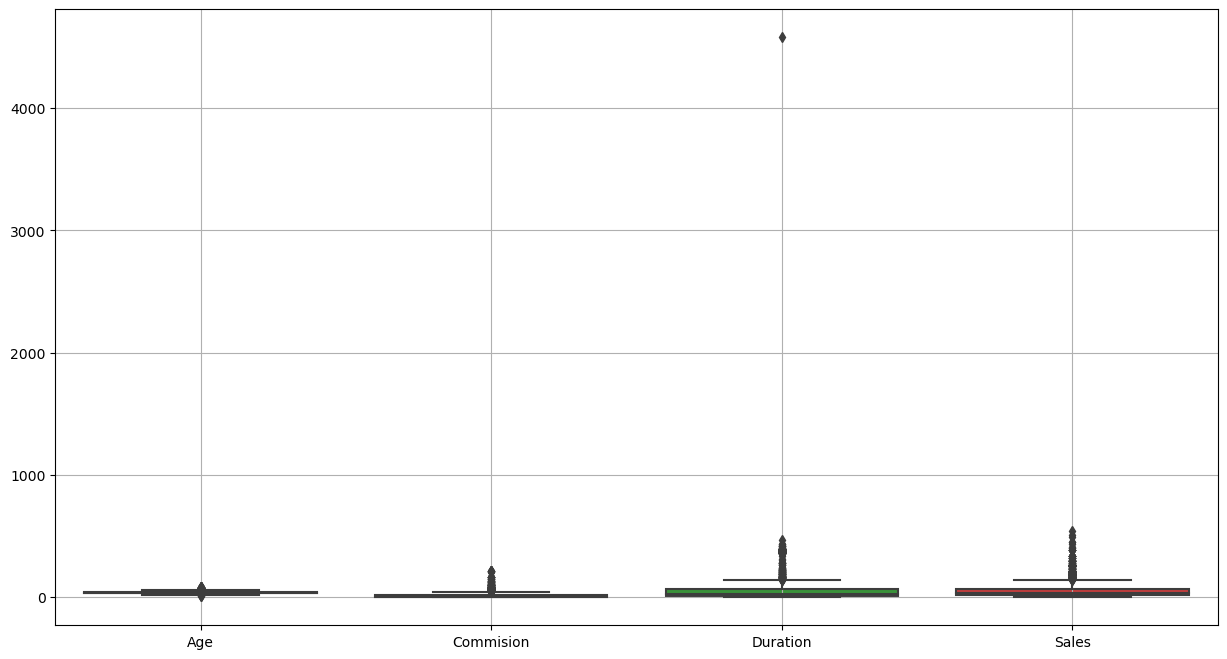

In [961]:
fig, axes = plt.subplots()
fig.set_size_inches(15,8)
a = sns.boxplot(data=df, orient = "v" )
fig=a.get_figure()
plt.grid()
#fig.savefig('Outliers'+'.png',bbox_inches='tight')

In [962]:
outlier_list=[]
q1,q3=np.percentile(df['Duration'],[25,75])
q1,q3
iqr=q3-q1
iqr
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
upper,lower
for i in df['Duration']:
    if i < lower or i > upper:
        outlier_list.append(i)
#print("Outliers: {}".format(outlier_list))
outlier_list.sort()
print(outlier_list)
print("Outlier Count: {}".format(len(outlier_list)))


[142, 144, 144, 145, 145, 145, 145, 146, 146, 146, 147, 147, 147, 147, 148, 149, 152, 152, 153, 154, 154, 155, 156, 156, 156, 158, 159, 160, 162, 163, 163, 164, 164, 165, 166, 167, 167, 167, 167, 168, 171, 171, 172, 173, 175, 175, 177, 177, 179, 180, 184, 185, 186, 187, 187, 187, 189, 189, 189, 190, 191, 195, 195, 197, 198, 201, 202, 202, 203, 204, 208, 209, 212, 215, 216, 217, 218, 222, 223, 224, 224, 224, 226, 229, 232, 234, 234, 235, 235, 239, 244, 259, 266, 266, 273, 276, 278, 280, 280, 281, 289, 303, 309, 334, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 366, 366,

## Dropping extreme outlier in Duration column.

In [963]:
df.drop(df[df['Duration']==4580].index,inplace=True)

In [964]:
df.drop(df[df['Duration']==-1].index,inplace=True)

In [965]:
df.shape

(2998, 10)

In [966]:
df.describe()

Age    Commision     Duration        Sales
count  2998.000000  2998.000000  2998.000000  2998.000000
mean     38.092061    14.536765    68.520680    60.283996
std      10.462712    25.488146   105.790319    70.744865
min       8.000000     0.000000     0.000000     0.000000
25%      32.000000     0.000000    11.000000    20.000000
50%      36.000000     4.630000    26.500000    33.000000
75%      42.000000    17.245000    63.000000    69.000000
max      84.000000   210.210000   466.000000   539.000000

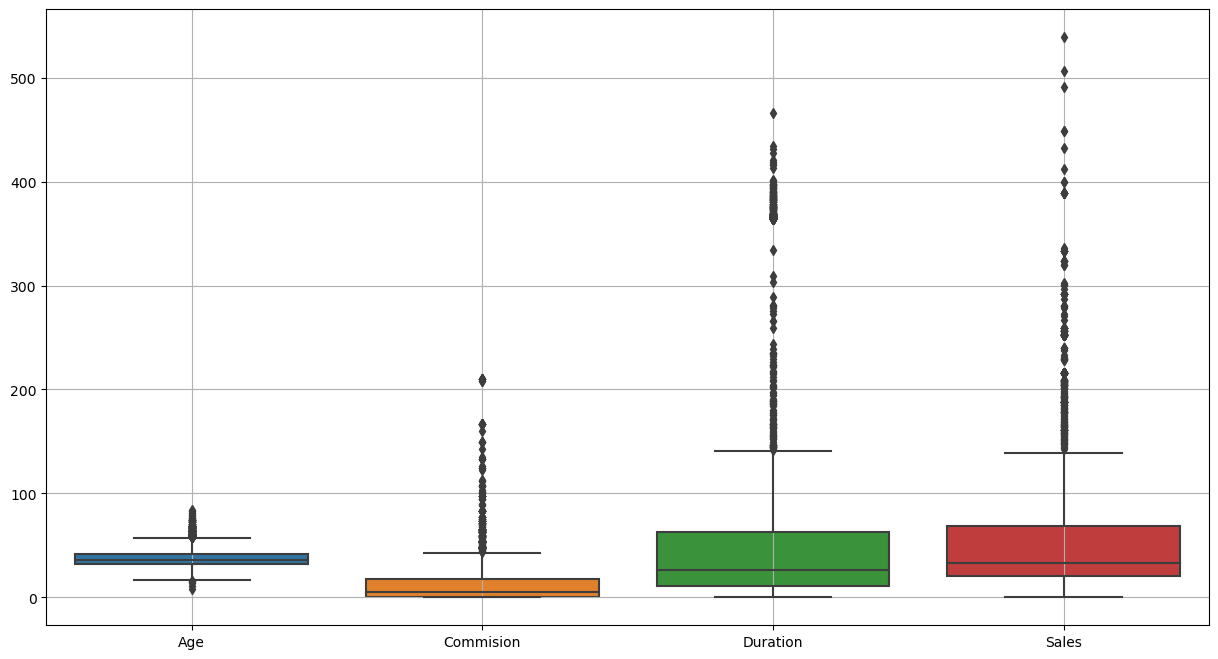

In [967]:
fig, axes = plt.subplots()
fig.set_size_inches(15,8)
a = sns.boxplot(data=df, orient = "v" )
fig=a.get_figure()
plt.grid()
#fig.savefig('Outliers'+'.png',bbox_inches='tight')

In [968]:
df.head()

Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No       0.70  Online         7   2.51   
1   36         EPX  Travel Agency      No       0.00  Online        34  20.00   
2   39         CWT  Travel Agency      No       5.94  Online         3   9.90   
3   36         EPX  Travel Agency      No       0.00  Online         4  26.00   
4   33         JZI       Airlines      No       6.30  Online        53  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA

In [969]:
df.describe(include='all')

Age Agency_Code           Type Claimed    Commision Channel  \
count   2998.000000        2998           2998    2998  2998.000000    2998   
unique          NaN           4              2       2          NaN       2   
top             NaN         EPX  Travel Agency      No          NaN  Online   
freq            NaN        1365           1837    2074          NaN    2952   
mean      38.092061         NaN            NaN     NaN    14.536765     NaN   
std       10.462712         NaN            NaN     NaN    25.488146     NaN   
min        8.000000         NaN            NaN     NaN     0.000000     NaN   
25%       32.000000         NaN            NaN     NaN     0.000000     NaN   
50%       36.000000         NaN            NaN     NaN     4.630000     NaN   
75%       42.000000         NaN            NaN     NaN    17.245000     NaN   
max       84.000000         NaN            NaN     NaN   210.210000     NaN   

           Duration        Sales     Product Name Destination  
count   2998.000000  2998.000000             2998        2998  
unique          NaN          NaN                5           3  
top             NaN          NaN  Customised Plan        ASIA  
freq            NaN          NaN             1135        2463  
mean      68.520680    60.283996              NaN         NaN  
std      105.790319    70.744865              NaN         NaN  
min        0.000000     0.000000              NaN         NaN  
25%       11.000000    20.000000              NaN         NaN  
50%       26.500000    33.000000              NaN         NaN  
75%       63.000000    69.000000              NaN         NaN  
max      466.000000   539.000000              NaN         NaN

In [970]:
df[df.duplicated()]

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
63     30         C2B       Airlines     Yes       15.0  Online        27   
329    36         EPX  Travel Agency      No        0.0  Online         5   
407    36         EPX  Travel Agency      No        0.0  Online        11   
411    35         EPX  Travel Agency      No        0.0  Online         2   
422    36         EPX  Travel Agency      No        0.0  Online         5   
...   ...         ...            ...     ...        ...     ...       ...   
2940   36         EPX  Travel Agency      No        0.0  Online         8   
2947   36         EPX  Travel Agency      No        0.0  Online        10   
2952   36         EPX  Travel Agency      No        0.0  Online         2   
2962   36         EPX  Travel Agency      No        0.0  Online         4   
2984   36         EPX  Travel Agency      No        0.0  Online         1   

      Sales       Product Name Destination  
63     60.0        Bronze Plan        ASIA  
329    20.0    Customised Plan        ASIA  
407    19.0  Cancellation Plan        ASIA  
411    20.0    Customised Plan        ASIA  
422    20.0    Customised Plan        ASIA  
...     ...                ...         ...  
2940   10.0  Cancellation Plan        ASIA  
2947   28.0    Customised Plan        ASIA  
2952   10.0  Cancellation Plan        ASIA  
2962   20.0    Customised Plan        ASIA  
2984   20.0    Customised Plan        ASIA  

[139 rows x 10 columns]

In [971]:
#df[(df['Age']==36) & (df['Type']=='Travel Agency') & (df['Sales']==20.0) & (df['Duration']==2)]

In [972]:
#df.drop_duplicates(inplace=True)

In [973]:
df.duplicated().sum()

139

In [974]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2998 non-null   int64  
 1   Agency_Code   2998 non-null   object 
 2   Type          2998 non-null   object 
 3   Claimed       2998 non-null   object 
 4   Commision     2998 non-null   float64
 5   Channel       2998 non-null   object 
 6   Duration      2998 non-null   int64  
 7   Sales         2998 non-null   float64
 8   Product Name  2998 non-null   object 
 9   Destination   2998 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 257.6+ KB


## Converting categorical data into numerical data

In [975]:
df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
0      48         C2B       Airlines      No       0.70  Online         7   
1      36         EPX  Travel Agency      No       0.00  Online        34   
2      39         CWT  Travel Agency      No       5.94  Online         3   
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
...   ...         ...            ...     ...        ...     ...       ...   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2998   34         C2B       Airlines     Yes       7.64  Online        39   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales       Product Name Destination  
0       2.51    Customised Plan        ASIA  
1      20.00    Customised Plan        ASIA  
2       9.90    Customised Plan    Americas  
3      26.00  Cancellation Plan        ASIA  
4      18.00        Bronze Plan        ASIA  
...      ...                ...         ...  
2995  256.20          Gold Plan    Americas  
2996   54.00          Gold Plan        ASIA  
2997   28.00    Customised Plan        ASIA  
2998   30.55        Bronze Plan        ASIA  
2999   33.00        Bronze Plan        ASIA  

[2998 rows x 10 columns]

In [976]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [977]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2998 non-null   int64  
 1   Agency_Code   2998 non-null   int8   
 2   Type          2998 non-null   int8   
 3   Claimed       2998 non-null   int8   
 4   Commision     2998 non-null   float64
 5   Channel       2998 non-null   int8   
 6   Duration      2998 non-null   int64  
 7   Sales         2998 non-null   float64
 8   Product Name  2998 non-null   int8   
 9   Destination   2998 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 134.7 KB


In [978]:
df.head()

Age  Agency_Code  Type  Claimed  Commision  Channel  Duration  Sales  \
0   48            0     0        0       0.70        1         7   2.51   
1   36            2     1        0       0.00        1        34  20.00   
2   39            1     1        0       5.94        1         3   9.90   
3   36            2     1        0       0.00        1         4  26.00   
4   33            3     0        0       6.30        1        53  18.00   

   Product Name  Destination  
0             2            0  
1             2            0  
2             2            1  
3             1            0  
4             0            0

In [979]:
X = df.drop("Claimed" , axis=1)
y = df.pop("Claimed")

In [980]:
X.shape

(2998, 9)

In [981]:
y.shape

(2998,)

In [982]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# Applying CART

In [624]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [1400]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [1401]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('Problem2_CART_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train),)

Credit_Tree_File.close()


In [1402]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp',ascending=False))

                   Imp
Duration      0.255059
Sales         0.225225
Agency_Code   0.187286
Age           0.184404
Commision     0.080981
Product Name  0.043660
Destination   0.018626
Channel       0.004759
Type          0.000000


In [1403]:
y_predict_test = dt_model.predict(X_test)

In [1404]:
accuracy_score(y_predict_train,train_labels)

0.9947569113441372

In [1405]:
accuracy_score(y_predict_test,test_labels)

0.6855555555555556

### Grid Search Iteration - 1

In [1406]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,6,7,8,9,10],
    'max_features': [2,4,6,8],
    'min_samples_leaf': [10,20,30,40,50,75,100],
    'min_samples_split': [50,100,150,200,250,300],
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10)

In [1407]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                  

In [1408]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 30,
 'min_samples_split': 50}

In [1409]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [1410]:
accuracy_score(y_predict_train,train_labels)

0.792183031458532

In [1411]:
accuracy_score(y_predict_test,test_labels)

0.7688888888888888

### Grid Search Iteration - 2

In [1441]:
from sklearn.model_selection import GridSearchCV
    
param_grid = {
    'max_depth': [3,4,5],
    'max_features': [6,7],
    'min_samples_leaf': [5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split': [75,80,85,90,95,100,105,110,115,120,125],
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10)

In [1442]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [6, 7],
    

In [1443]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 90}

In [1444]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [1445]:
accuracy_score(y_predict_train,train_labels)

0.792183031458532

In [1446]:
accuracy_score(y_predict_test,test_labels)

0.7722222222222223

### Grid Search Iteration - 3

In [1418]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5],
    'max_features': [6],
    'min_samples_leaf': [6],
    'min_samples_split': [100,105,110,115,120,125,130,135,140,145,150],
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10)

In [1419]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5], 'max_features': [6],
             

In [1420]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 135}

In [1421]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [1422]:
accuracy_score(y_predict_train,train_labels)

0.7955195424213537

In [1423]:
accuracy_score(y_predict_test,test_labels)

0.7777777777777778

### Grid Search Iteration - 4

In [660]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5],
    'max_features': [6],
    'min_samples_leaf': [6],
    'min_samples_split': [135,136,137,138,139,140,141,142,143,144,145],
    'random_state': [27]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 10)

In [661]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5], 'max_features': [6],
             

In [662]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 142,
 'random_state': 27}

In [663]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [664]:
accuracy_score(y_predict_train,train_labels)

0.8031458531935176

In [665]:
accuracy_score(y_predict_test,test_labels)

0.7777777777777778

### Final best grid

In [666]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=142,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=27, splitter='best')

In [667]:
from sklearn import tree

train_char_label = ['No', 'Yes']
CART_Tree = open('Problem2_CART_tree.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file=CART_Tree, feature_names = list(X_train),)

CART_Tree.close()

In [668]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp',ascending=False))

                   Imp
Agency_Code   0.562146
Sales         0.240314
Commision     0.102389
Duration      0.053729
Product Name  0.035940
Age           0.005482
Type          0.000000
Channel       0.000000
Destination   0.000000


In [669]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [670]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

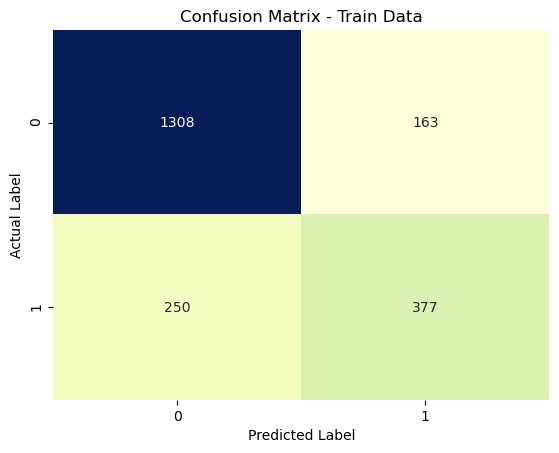

In [671]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data')
plt.show()

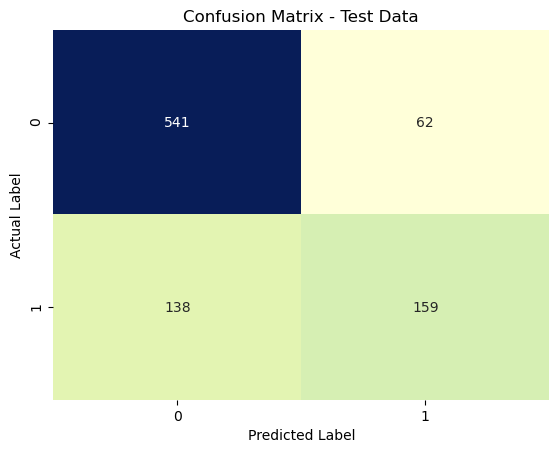

In [672]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data')
plt.show()


In [673]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1471
           1       0.70      0.60      0.65       627

    accuracy                           0.80      2098
   macro avg       0.77      0.75      0.75      2098
weighted avg       0.80      0.80      0.80      2098



In [674]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       603
           1       0.72      0.54      0.61       297

    accuracy                           0.78       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



AUC: 0.832


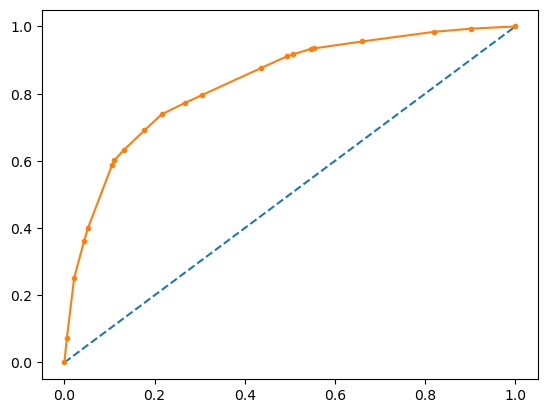

In [675]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.805


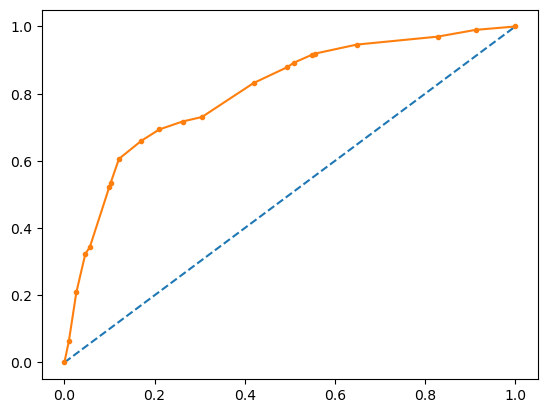

In [676]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Applying Random Forest

In [983]:
from sklearn.ensemble import RandomForestClassifier

### Grid Search Iteration - 1

In [1557]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10,20,30],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [25,50,75,100],
    'min_samples_split': [25,50,75,100],
    'n_estimators': [50,100,150]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [1558]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [1559]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 25,
 'min_samples_split': 50,
 'n_estimators': 50}

In [1560]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [1561]:
accuracy_score(y_predict_train,train_labels)

0.8036224976167778

In [1562]:
accuracy_score(y_predict_test,test_labels)

0.7622222222222222

### Grid Search Iteration - 2

In [1563]:
from sklearn.model_selection import GridSearchCV
if __name__ == '__main__':
    param_grid = {
        'max_depth': [8,9,10,11,12],
        'max_features': [2,3,4],
        'min_samples_leaf': [10,15,20,25,30],
        'min_samples_split': [25,30,35,40,45,50,55,60,65,70,75],
        'n_estimators': [10,20,30,40,50,60]
    }

    rfcl = RandomForestClassifier()

    grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3,n_jobs=-1)
    grid_search.fit(X_train, train_labels)

In [1564]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 60,
 'n_estimators': 20}

In [1565]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [1566]:
accuracy_score(y_predict_train,train_labels)

0.8055290753098189

In [1567]:
accuracy_score(y_predict_test,test_labels)

0.7677777777777778

### Grid Search Iteration - 3

In [984]:
from sklearn.model_selection import GridSearchCV
if __name__ == '__main__':
    param_grid = {
        'max_depth': [10],
        'max_features': [2,3,4],
        'min_samples_leaf': [5,6,7,8,9,10,11,12],
        'min_samples_split': [56,57,58,59,60,61,62,63,64],
        'n_estimators': [15,16,17,18,19,20,21,22,23,24,25]
    }

    rfcl = RandomForestClassifier()

    grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3,n_jobs=4)
    grid_search.fit(X_train, train_labels)

In [985]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 60,
 'n_estimators': 19}

In [1020]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [741]:
accuracy_score(y_predict_train,train_labels)

0.8098188751191611

In [743]:
accuracy_score(y_predict_test,test_labels)

0.78

In [1021]:
np.array(X_test.columns)

array(['Age', 'Agency_Code', 'Type', 'Commision', 'Channel', 'Duration',
       'Sales', 'Product Name', 'Destination'], dtype=object)

## Finding Inference from prediction made using Random Forest for Q2.5

In [1022]:
pred_var=pd.Series(y_predict_test)

In [1023]:
pred_var

0      0
1      1
2      0
3      1
4      0
      ..
895    1
896    0
897    0
898    1
899    1
Length: 900, dtype: int8

In [1025]:
X_test.index

Int64Index([ 749, 2665, 1392, 1917, 2997,  393,   28,   99,  351, 1271,
            ...
             576,   91,  514, 1773,  270,  517, 1813, 2502, 1043, 2716],
           dtype='int64', length=900)

In [1026]:
pred_var.index=X_test.index

In [1032]:
pred_var

749     0
2665    1
1392    0
1917    1
2997    0
       ..
517     1
1813    0
2502    0
1043    1
2716    1
Length: 900, dtype: int8

In [1033]:
final_df=pd.concat([df_org,pred_var],axis=1)

In [1034]:
final_df.dropna(inplace=True)

In [1037]:
final_df.columns=[         'Age',  'Agency_Code',         'Type',      'Claimed',
          'Commision',      'Channel',     'Duration',        'Sales',
       'Product Name',  'Destination',              'Claim_Predicted']

In [1041]:
final_df['Claim_Predicted']=np.where(final_df['Claim_Predicted']==0.0,'No','Yes')

In [1067]:
final_df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
6      61         CWT  Travel Agency      No      35.64  Online        30   
10     37         C2B       Airlines     Yes      46.96  Online       368   
13     52         C2B       Airlines     Yes       5.88  Online         7   
...   ...         ...            ...     ...        ...     ...       ...   
2990   51         EPX  Travel Agency      No       0.00  Online         2   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales       Product Name Destination Claim_Predicted  
3      26.00  Cancellation Plan        ASIA              No  
4      18.00        Bronze Plan        ASIA              No  
6      59.40    Customised Plan    Americas              No  
10    187.85        Silver Plan        ASIA             Yes  
13     23.50        Bronze Plan        ASIA              No  
...      ...                ...         ...             ...  
2990   20.00    Customised Plan        ASIA              No  
2995  256.20          Gold Plan    Americas             Yes  
2996   54.00          Gold Plan        ASIA              No  
2997   28.00    Customised Plan        ASIA              No  
2999   33.00        Bronze Plan        ASIA              No  

[900 rows x 11 columns]

In [1068]:
temp_df=final_df[final_df['Claim_Predicted']=='Yes']
temp_df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
10     37         C2B       Airlines     Yes      46.96  Online       368   
45     32         C2B       Airlines     Yes      54.00  Online       366   
91     73         C2B       Airlines      No       8.88  Online        53   
102    52         C2B       Airlines     Yes      26.63  Online        39   
151    36         C2B       Airlines      No       5.85  Online        11   
...   ...         ...            ...     ...        ...     ...       ...   
2916   36         CWT  Travel Agency      No     149.50  Online       364   
2939   57         C2B       Airlines     Yes       8.38  Online        32   
2961   20         C2B       Airlines     Yes       8.81  Online        33   
2963   33         C2B       Airlines      No       4.00  Online         8   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   

       Sales Product Name Destination Claim_Predicted  
10    187.85  Silver Plan        ASIA             Yes  
45    216.00  Silver Plan        ASIA             Yes  
91     35.50  Silver Plan        ASIA             Yes  
102   106.50  Silver Plan        ASIA             Yes  
151    23.40  Bronze Plan        ASIA             Yes  
...      ...          ...         ...             ...  
2916  230.00  Silver Plan    Americas             Yes  
2939   33.50  Bronze Plan        ASIA             Yes  
2961   35.25  Bronze Plan        ASIA             Yes  
2963   16.00  Bronze Plan        ASIA             Yes  
2995  256.20    Gold Plan    Americas             Yes  

[220 rows x 11 columns]

In [1095]:
temp_df['Duration'].value_counts().to_csv('asd.csv')

In [1079]:
temp_df[temp_df['Type']=='Travel Agency']['Destination'].value_counts()

Americas    10
EUROPE       4
ASIA         3
Name: Destination, dtype: int64

In [1078]:
temp_df[temp_df['Type']=='Airlines']['Agency_Code'].value_counts()

C2B    203
Name: Agency_Code, dtype: int64

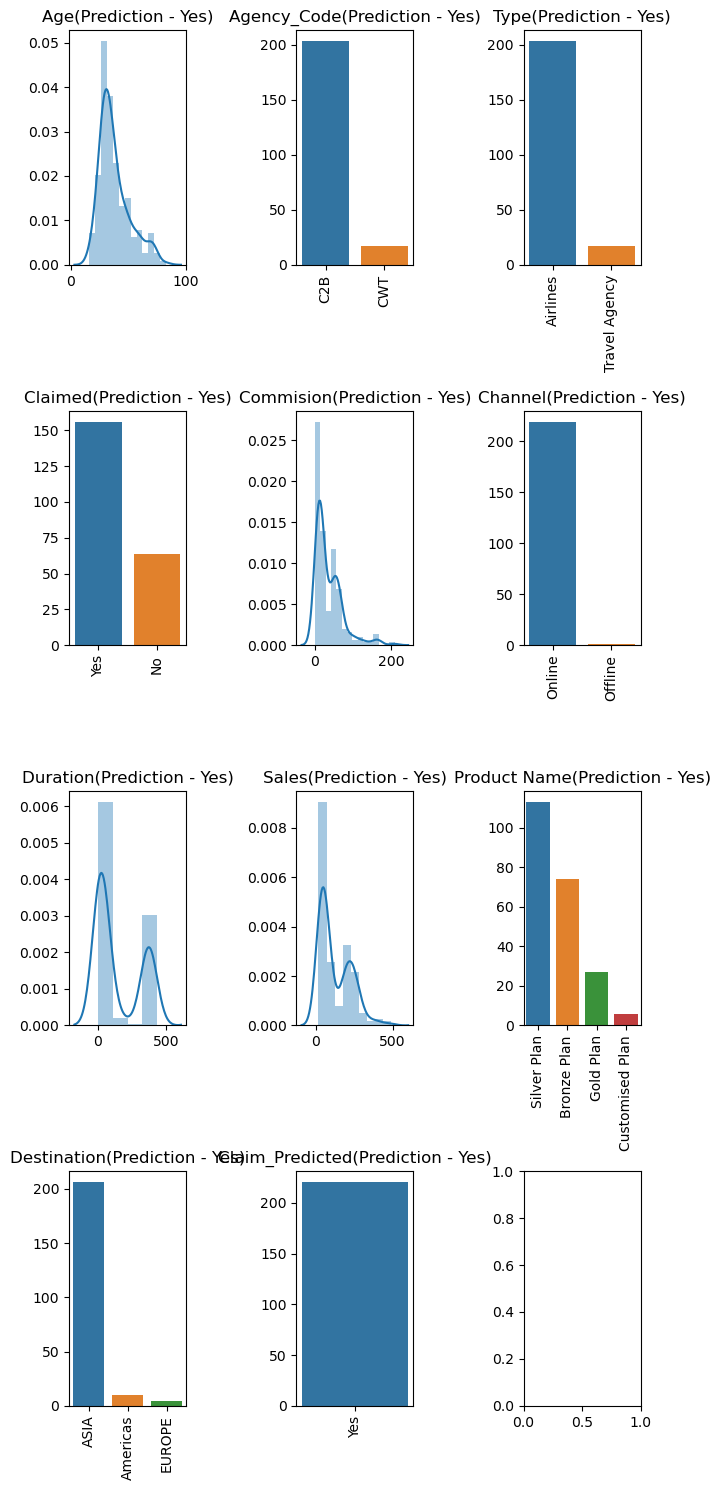

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [1061]:
import seaborn as sns
fig, axs = plt.subplots(4, 3,figsize=(7,15))
j=0
k=0
for i in temp_df.columns:
    if temp_df[i].dtype == 'object':
        ax=sns.barplot(temp_df[i].value_counts().index,temp_df[i].value_counts().values,ax=axs[j,k])
        ax.set_title(i+'(Prediction - Yes)')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        
        #sns.set(font_scale=2,style='dark')
        #sns.set_context('poster')
    elif temp_df[i].dtype != 'object':
        plt.figure(figsize=(15,15))
        sns.distplot(temp_df[i],ax=axs[j,k]).set_title(i+'(Prediction - Yes)',y=1)
        axs[j,k].set_xlabel('')
    k=k+1
    if k==3:
        k=0
        j=j+1
fig.tight_layout()
fig.savefig('des.jpg')
plt.show()

In [1084]:
temp_df=final_df[final_df['Claimed']=='Yes']
temp_df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
10     37         C2B       Airlines     Yes      46.96  Online       368   
13     52         C2B       Airlines     Yes       5.88  Online         7   
32     36         EPX  Travel Agency     Yes       0.00  Online        16   
40     30         CWT  Travel Agency     Yes      16.25  Online         5   
41     33         C2B       Airlines     Yes       7.38  Online        11   
...   ...         ...            ...     ...        ...     ...       ...   
2961   20         C2B       Airlines     Yes       8.81  Online        33   
2973   30         EPX  Travel Agency     Yes       0.00  Online       105   
2985   34         EPX  Travel Agency     Yes       0.00  Online        34   
2988   36         EPX  Travel Agency     Yes       0.00  Online        18   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   

       Sales       Product Name Destination Claim_Predicted  
10    187.85        Silver Plan        ASIA             Yes  
13     23.50        Bronze Plan        ASIA              No  
32     42.00    Customised Plan        ASIA              No  
40     25.00          Gold Plan        ASIA              No  
41     29.50        Bronze Plan        ASIA              No  
...      ...                ...         ...             ...  
2961   35.25        Bronze Plan        ASIA             Yes  
2973   19.87    Customised Plan        ASIA              No  
2985   19.00  Cancellation Plan        ASIA              No  
2988   36.00    Customised Plan        ASIA              No  
2995  256.20          Gold Plan    Americas             Yes  

[297 rows x 11 columns]

In [1085]:
temp_df['Duration'].value_counts().values.mean()

2.7

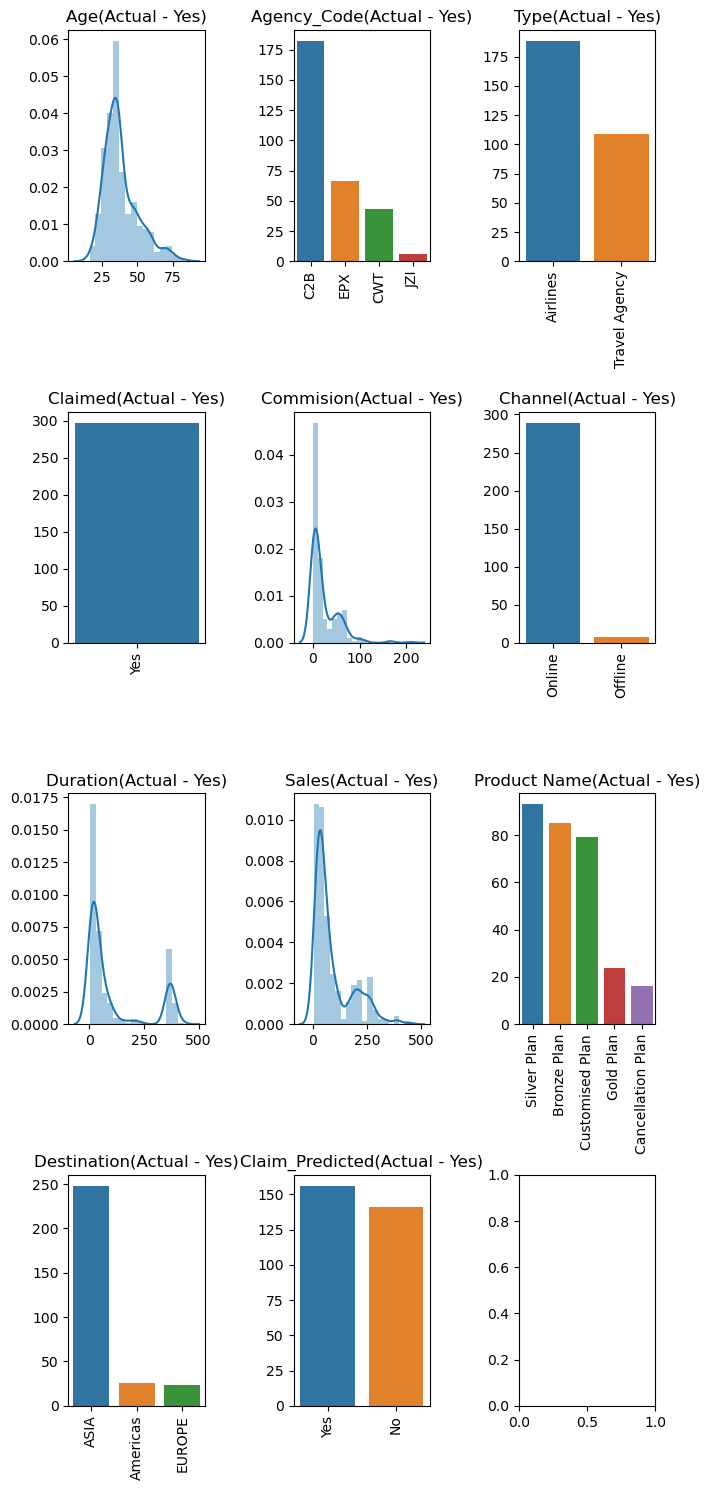

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [1064]:
import seaborn as sns
fig, axs = plt.subplots(4, 3,figsize=(7,15))
j=0
k=0
for i in temp_df.columns:
    if temp_df[i].dtype == 'object':
        ax=sns.barplot(temp_df[i].value_counts().index,temp_df[i].value_counts().values,ax=axs[j,k])
        ax.set_title(i+'(Actual - Yes)')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        
        #sns.set(font_scale=2,style='dark')
        #sns.set_context('poster')
    elif temp_df[i].dtype != 'object':
        plt.figure(figsize=(15,15))
        sns.distplot(temp_df[i],ax=axs[j,k]).set_title(i+'(Actual - Yes)',y=1)
        axs[j,k].set_xlabel('')
    k=k+1
    if k==3:
        k=0
        j=j+1
fig.tight_layout()
fig.savefig('des.jpg')
plt.show()

In [1086]:
temp_df=final_df[final_df['Claim_Predicted']=='No']
temp_df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
6      61         CWT  Travel Agency      No      35.64  Online        30   
13     52         C2B       Airlines     Yes       5.88  Online         7   
17     45         CWT  Travel Agency      No      59.40  Online        40   
...   ...         ...            ...     ...        ...     ...       ...   
2988   36         EPX  Travel Agency     Yes       0.00  Online        18   
2990   51         EPX  Travel Agency      No       0.00  Online         2   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2999   47         JZI       Airlines      No      11.55  Online        15   

      Sales       Product Name Destination Claim_Predicted  
3      26.0  Cancellation Plan        ASIA              No  
4      18.0        Bronze Plan        ASIA              No  
6      59.4    Customised Plan    Americas              No  
13     23.5        Bronze Plan        ASIA              No  
17     99.0    Customised Plan    Americas              No  
...     ...                ...         ...             ...  
2988   36.0    Customised Plan        ASIA              No  
2990   20.0    Customised Plan        ASIA              No  
2996   54.0          Gold Plan        ASIA              No  
2997   28.0    Customised Plan        ASIA              No  
2999   33.0        Bronze Plan        ASIA              No  

[680 rows x 11 columns]

In [1087]:
temp_df['Duration'].value_counts().values.mean()

4.788732394366197

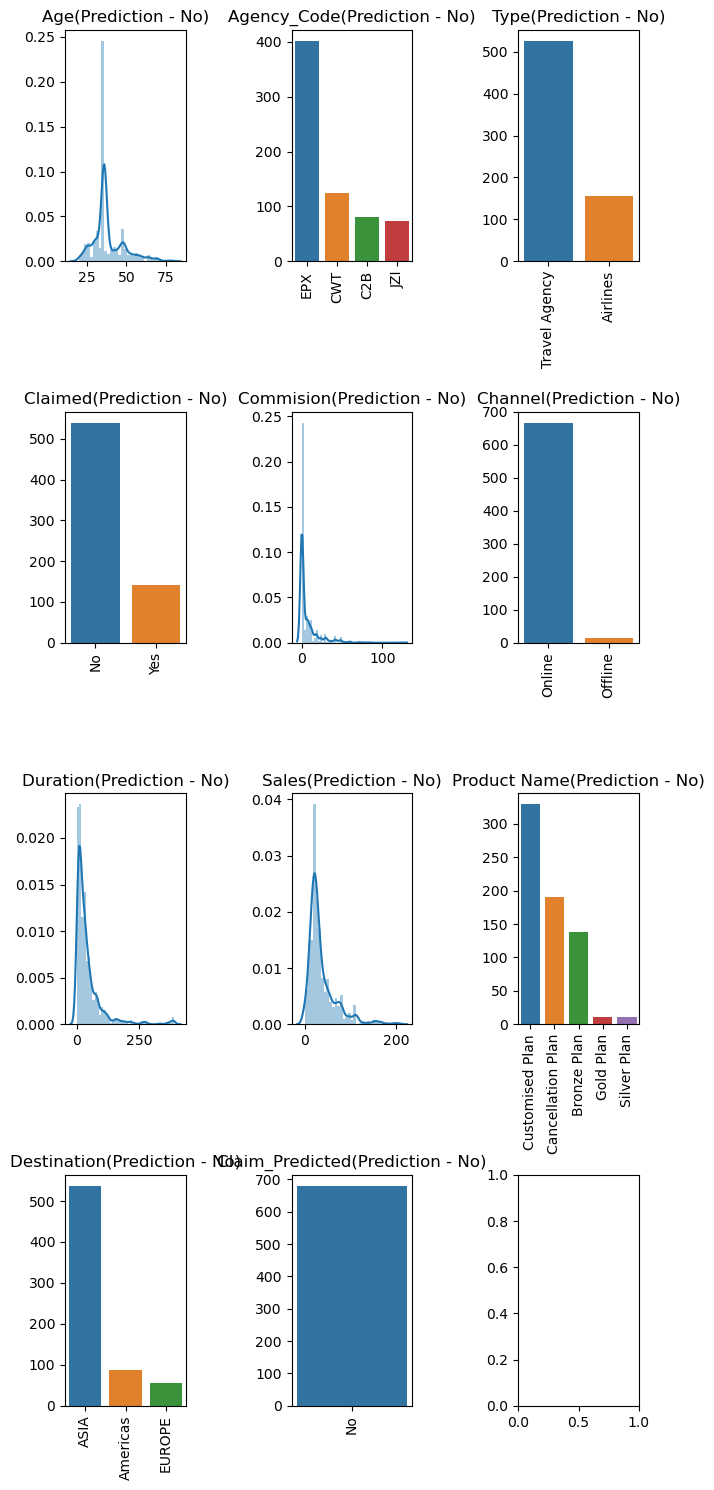

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [1059]:
import seaborn as sns
fig, axs = plt.subplots(4, 3,figsize=(7,15))
j=0
k=0
for i in temp_df.columns:
    if temp_df[i].dtype == 'object':
        ax=sns.barplot(temp_df[i].value_counts().index,temp_df[i].value_counts().values,ax=axs[j,k])
        ax.set_title(i+'(Prediction - No)')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        
        #sns.set(font_scale=2,style='dark')
        #sns.set_context('poster')
    elif temp_df[i].dtype != 'object':
        plt.figure(figsize=(15,15))
        sns.distplot(temp_df[i],ax=axs[j,k]).set_title(i+'(Prediction - No)',y=1)
        axs[j,k].set_xlabel('')
    k=k+1
    if k==3:
        k=0
        j=j+1
fig.tight_layout()
fig.savefig('des.jpg')
plt.show()

In [1088]:
temp_df=final_df[final_df['Claimed']=='No']
temp_df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
6      61         CWT  Travel Agency      No      35.64  Online        30   
17     45         CWT  Travel Agency      No      59.40  Online        40   
28     46         JZI       Airlines      No       6.30  Online        36   
...   ...         ...            ...     ...        ...     ...       ...   
2984   36         EPX  Travel Agency      No       0.00  Online         1   
2990   51         EPX  Travel Agency      No       0.00  Online         2   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2999   47         JZI       Airlines      No      11.55  Online        15   

      Sales       Product Name Destination Claim_Predicted  
3      26.0  Cancellation Plan        ASIA              No  
4      18.0        Bronze Plan        ASIA              No  
6      59.4    Customised Plan    Americas              No  
17     99.0    Customised Plan    Americas              No  
28     18.0        Bronze Plan        ASIA              No  
...     ...                ...         ...             ...  
2984   20.0    Customised Plan        ASIA              No  
2990   20.0    Customised Plan        ASIA              No  
2996   54.0          Gold Plan        ASIA              No  
2997   28.0    Customised Plan        ASIA              No  
2999   33.0        Bronze Plan        ASIA              No  

[603 rows x 11 columns]

In [1089]:
temp_df['Duration'].value_counts().values.mean()

4.276595744680851

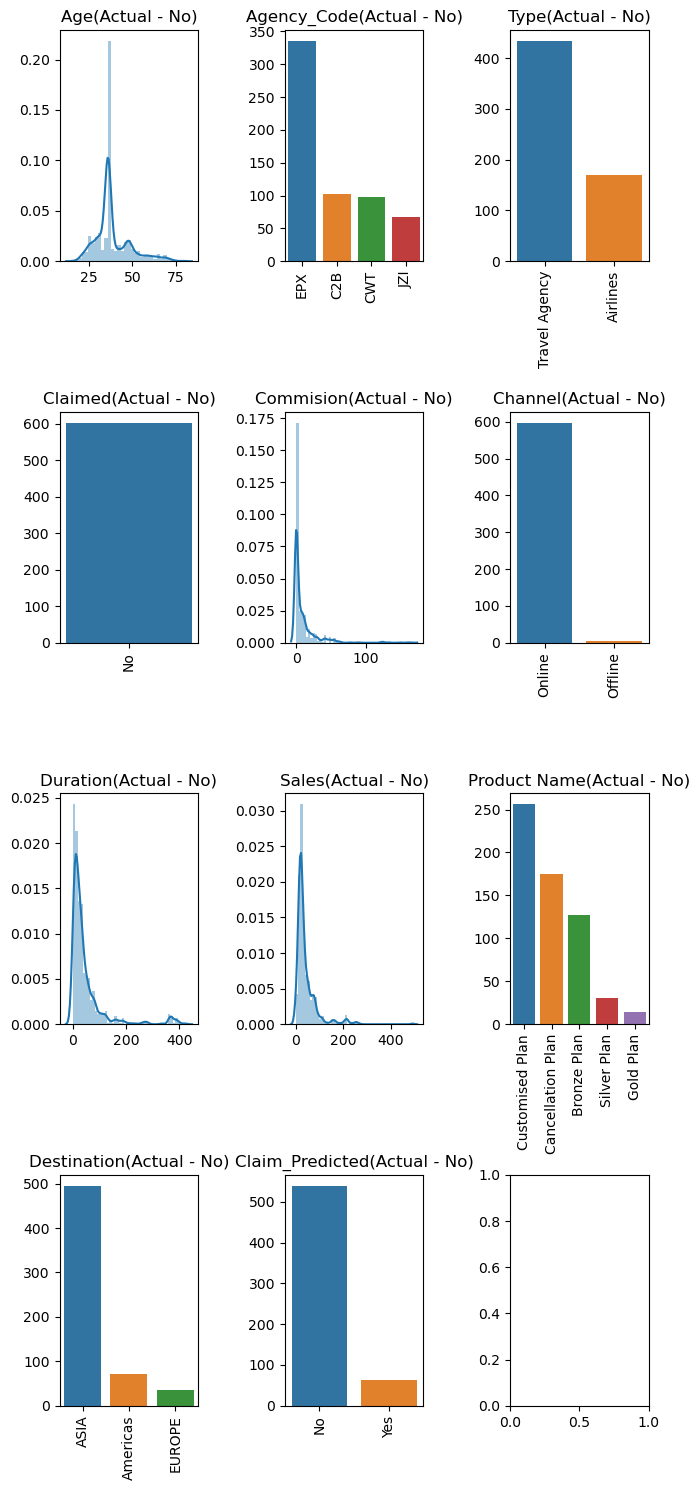

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [1066]:
import seaborn as sns
fig, axs = plt.subplots(4, 3,figsize=(7,15))
j=0
k=0
for i in temp_df.columns:
    if temp_df[i].dtype == 'object':
        ax=sns.barplot(temp_df[i].value_counts().index,temp_df[i].value_counts().values,ax=axs[j,k])
        ax.set_title(i+'(Actual - No)')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        
        #sns.set(font_scale=2,style='dark')
        #sns.set_context('poster')
    elif temp_df[i].dtype != 'object':
        plt.figure(figsize=(15,15))
        sns.distplot(temp_df[i],ax=axs[j,k]).set_title(i+'(Actual - No)',y=1)
        axs[j,k].set_xlabel('')
    k=k+1
    if k==3:
        k=0
        j=j+1
fig.tight_layout()
fig.savefig('des.jpg')
plt.show()

## Visualizing First 5 tree from our random tree forest

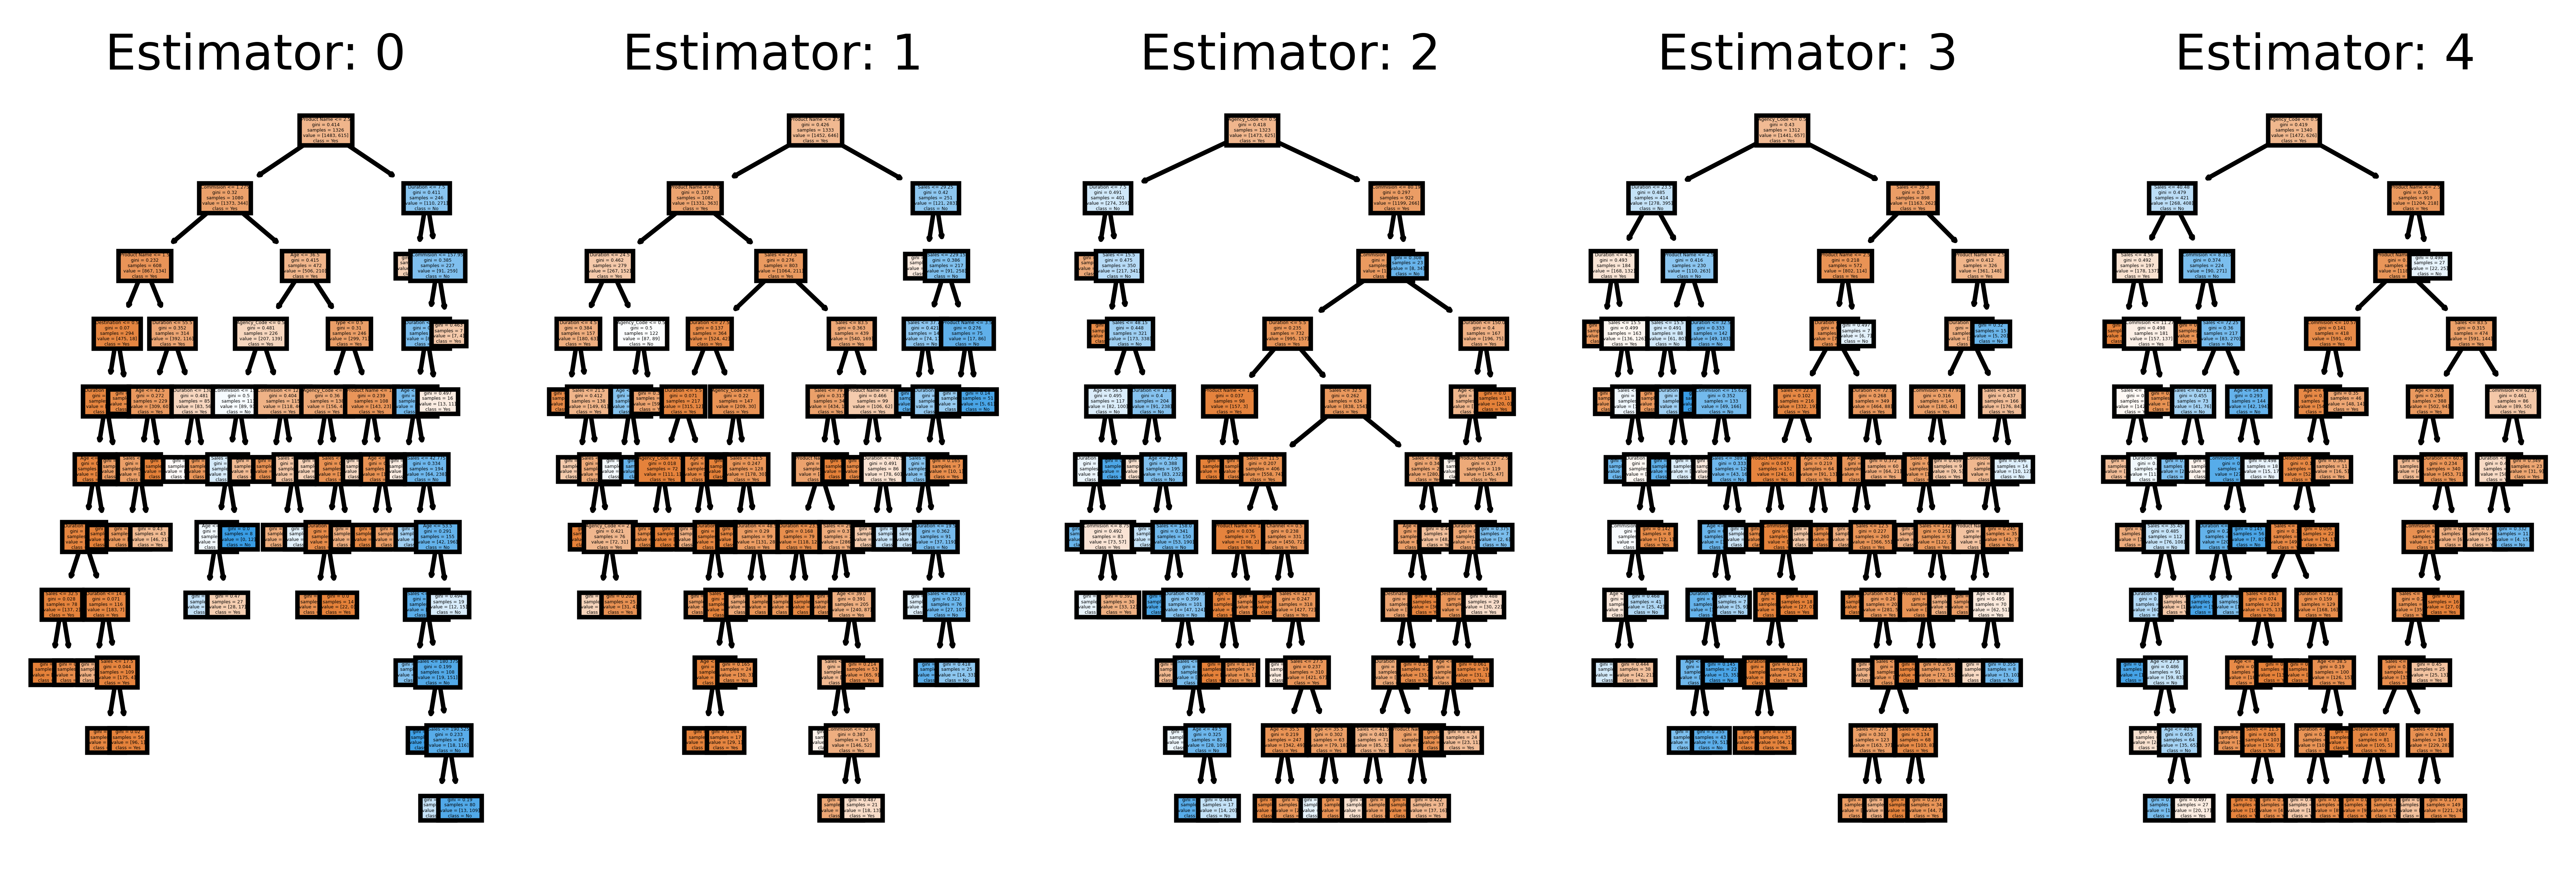

In [1596]:
from sklearn import tree
fn=np.array(X_test.columns)
cn=np.array(['Yes','No'])
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,3), dpi=900)
for index in range(0, 5):
    tree.plot_tree(best_grid.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

## Final best grid

In [744]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=63,
                       min_weight_fraction_leaf=0.0, n_estimators=22,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1597]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp',ascending=False))

                   Imp
Agency_Code   0.297248
Product Name  0.212331
Sales         0.185031
Duration      0.107702
Commision     0.095075
Age           0.056916
Type          0.037621
Destination   0.006961
Channel       0.001115


In [746]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [747]:
from sklearn.metrics import confusion_matrix,classification_report

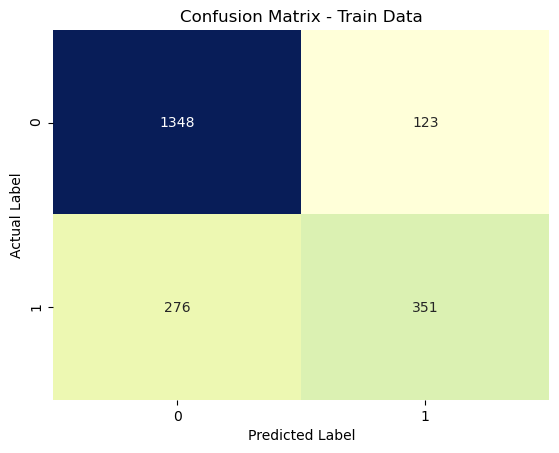

In [748]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data')
plt.show()

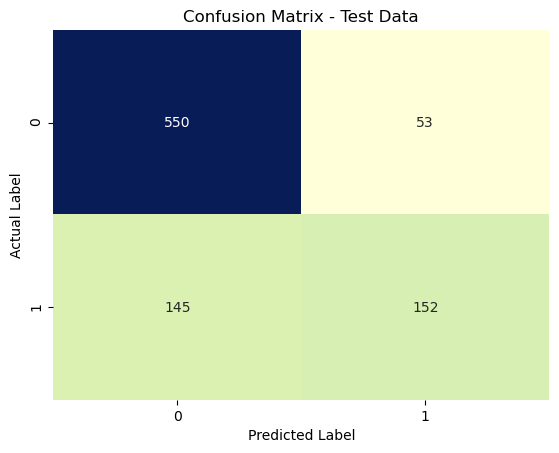

In [749]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data')
plt.show()

In [750]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1471
           1       0.74      0.56      0.64       627

    accuracy                           0.81      2098
   macro avg       0.79      0.74      0.75      2098
weighted avg       0.80      0.81      0.80      2098



In [751]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       603
           1       0.74      0.51      0.61       297

    accuracy                           0.78       900
   macro avg       0.77      0.71      0.73       900
weighted avg       0.77      0.78      0.77       900



AUC: 0.864


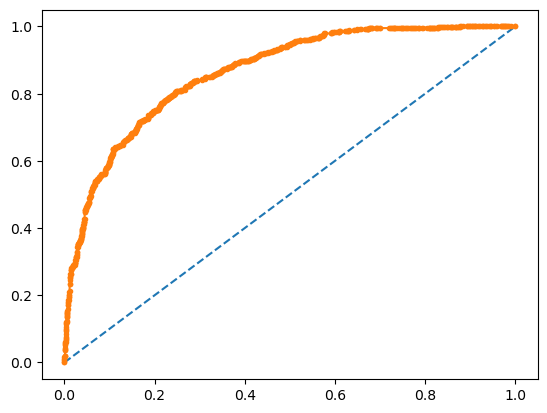

In [752]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.822


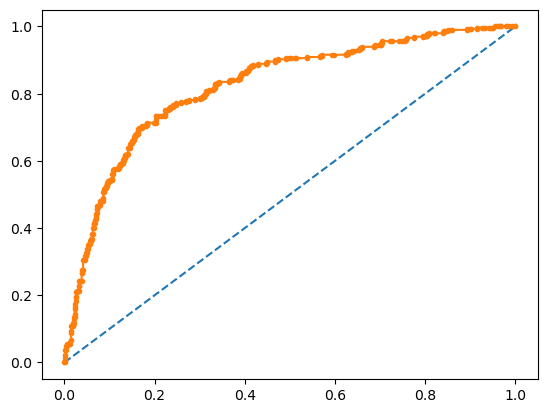

In [753]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Applying Neural Networks

In [202]:
X_train

Age  Agency_Code  Type  Commision  Channel  Duration  Sales  \
2834   28            0     0      20.38        1        29   81.5   
1793   19            0     0       6.00        1        32   15.0   
957    36            2     1       0.00        1         2   20.0   
1385   25            0     0      12.40        1        42   31.0   
1307   30            1     1      17.82        1        16   29.7   
...   ...          ...   ...        ...      ...       ...    ...   
2764   28            0     0      13.25        1        21   53.0   
905    41            0     0       6.00        1         9   15.0   
1096   36            2     1       0.00        1       131   63.0   
235    44            3     0       6.30        1         6   18.0   
1061   36            0     0       5.63        1        85   22.5   

      Product Name  Destination  
2834             4            0  
1793             0            0  
957              2            0  
1385             0            0  
1307             2            1  
...            ...          ...  
2764             0            0  
905              0            0  
1096             2            0  
235              0            0  
1061             4            0  

[2098 rows x 9 columns]

### Standardizing data before using ANN

In [203]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [204]:
X_train = sc.fit_transform(X_train)

In [205]:
X_test = sc.transform(X_test)

In [206]:
X_train

array([[-0.96916029, -1.32465328, -1.26992219, ...,  0.27941814,
         1.85604898, -0.43750626],
       [-1.84403166, -1.32465328, -1.26992219, ..., -0.64456154,
        -1.33574673, -0.43750626],
       [-0.19149684,  0.69579207,  0.78744982, ..., -0.57508938,
         0.26015113, -0.43750626],
       ...,
       [-0.19149684,  0.69579207,  0.78744982, ...,  0.02237116,
         0.26015113, -0.43750626],
       [ 0.5861666 ,  1.70601475, -1.26992219, ..., -0.60287825,
        -1.33574673, -0.43750626],
       [-0.19149684, -1.32465328, -1.26992219, ..., -0.5403533 ,
         1.85604898, -0.43750626]])

In [207]:
from sklearn.neural_network import MLPClassifier

### Grid Search Iteration - 1

In [1613]:
if __name__ == '__main__':
    param_grid = {
        'hidden_layer_sizes': [5,10,15,(5,5),(10,10),(15,15)],
        'max_iter': [1000,2000],
        'solver': ['sgd','adam'],
        'verbose': ['True'],
        'random_state': [1],
        'tol': [0.001,0.0001,0.00001]    
    }

    mlp_clf = MLPClassifier()

    grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1)
    grid_search.fit(X_train, train_labels)

Iteration 1, loss = 0.62830649
Iteration 2, loss = 0.62113925
Iteration 3, loss = 0.61219959
Iteration 4, loss = 0.60371152
Iteration 5, loss = 0.59573486
Iteration 6, loss = 0.58876891
Iteration 7, loss = 0.58250943
Iteration 8, loss = 0.57669568
Iteration 9, loss = 0.57157501
Iteration 10, loss = 0.56684951
Iteration 11, loss = 0.56252713
Iteration 12, loss = 0.55855888
Iteration 13, loss = 0.55493672
Iteration 14, loss = 0.55147211
Iteration 15, loss = 0.54831656
Iteration 16, loss = 0.54535844
Iteration 17, loss = 0.54256895
Iteration 18, loss = 0.53998293
Iteration 19, loss = 0.53743402
Iteration 20, loss = 0.53517672
Iteration 21, loss = 0.53292560
Iteration 22, loss = 0.53088002
Iteration 23, loss = 0.52894092
Iteration 24, loss = 0.52718762
Iteration 25, loss = 0.52548501
Iteration 26, loss = 0.52393695
Iteration 27, loss = 0.52236518
Iteration 28, loss = 0.52094585
Iteration 29, loss = 0.51963513
Iteration 30, loss = 0.51833702
Iteration 31, loss = 0.51709845
Iteration 32, los

Iteration 273, loss = 0.48215393
Iteration 274, loss = 0.48211990
Iteration 275, loss = 0.48209755
Iteration 276, loss = 0.48206463
Iteration 277, loss = 0.48203201
Iteration 278, loss = 0.48202318
Iteration 279, loss = 0.48198426
Iteration 280, loss = 0.48196722
Iteration 281, loss = 0.48193324
Iteration 282, loss = 0.48189920
Iteration 283, loss = 0.48189177
Iteration 284, loss = 0.48184417
Iteration 285, loss = 0.48182250
Iteration 286, loss = 0.48179449
Iteration 287, loss = 0.48178149
Iteration 288, loss = 0.48173474
Iteration 289, loss = 0.48170142
Iteration 290, loss = 0.48167514
Iteration 291, loss = 0.48164785
Iteration 292, loss = 0.48162547
Iteration 293, loss = 0.48158672
Iteration 294, loss = 0.48156534
Iteration 295, loss = 0.48154027
Iteration 296, loss = 0.48150599
Iteration 297, loss = 0.48149893
Iteration 298, loss = 0.48147166
Iteration 299, loss = 0.48143234
Iteration 300, loss = 0.48140563
Iteration 301, loss = 0.48138049
Iteration 302, loss = 0.48134061
Iteration 

Iteration 525, loss = 0.47497555
Iteration 526, loss = 0.47494772
Iteration 527, loss = 0.47493146
Iteration 528, loss = 0.47489142
Iteration 529, loss = 0.47486434
Iteration 530, loss = 0.47484085
Iteration 531, loss = 0.47480338
Iteration 532, loss = 0.47477092
Iteration 533, loss = 0.47475037
Iteration 534, loss = 0.47472848
Iteration 535, loss = 0.47469521
Iteration 536, loss = 0.47466122
Iteration 537, loss = 0.47463782
Iteration 538, loss = 0.47460909
Iteration 539, loss = 0.47458839
Iteration 540, loss = 0.47455754
Iteration 541, loss = 0.47452556
Iteration 542, loss = 0.47451027
Iteration 543, loss = 0.47447415
Iteration 544, loss = 0.47445010
Iteration 545, loss = 0.47443563
Iteration 546, loss = 0.47439968
Iteration 547, loss = 0.47437470
Iteration 548, loss = 0.47433281
Iteration 549, loss = 0.47430487
Iteration 550, loss = 0.47427720
Iteration 551, loss = 0.47427435
Iteration 552, loss = 0.47423075
Iteration 553, loss = 0.47419157
Iteration 554, loss = 0.47418332
Iteration 

Iteration 782, loss = 0.46898969
Iteration 783, loss = 0.46897393
Iteration 784, loss = 0.46895366
Iteration 785, loss = 0.46893166
Iteration 786, loss = 0.46894065
Iteration 787, loss = 0.46889696
Iteration 788, loss = 0.46889016
Iteration 789, loss = 0.46887212
Iteration 790, loss = 0.46884110
Iteration 791, loss = 0.46882458
Iteration 792, loss = 0.46881136
Iteration 793, loss = 0.46881846
Iteration 794, loss = 0.46878091
Iteration 795, loss = 0.46875958
Iteration 796, loss = 0.46873189
Iteration 797, loss = 0.46872152
Iteration 798, loss = 0.46870417
Iteration 799, loss = 0.46868303
Iteration 800, loss = 0.46866731
Iteration 801, loss = 0.46863875
Iteration 802, loss = 0.46863383
Iteration 803, loss = 0.46861304
Iteration 804, loss = 0.46857938
Iteration 805, loss = 0.46857447
Iteration 806, loss = 0.46856110
Iteration 807, loss = 0.46856583
Iteration 808, loss = 0.46851397
Iteration 809, loss = 0.46850323
Iteration 810, loss = 0.46849578
Iteration 811, loss = 0.46848432
Iteration 

Iteration 1041, loss = 0.46435590
Iteration 1042, loss = 0.46433491
Iteration 1043, loss = 0.46432395
Iteration 1044, loss = 0.46429660
Iteration 1045, loss = 0.46430880
Iteration 1046, loss = 0.46425758
Iteration 1047, loss = 0.46424702
Iteration 1048, loss = 0.46426073
Iteration 1049, loss = 0.46420877
Iteration 1050, loss = 0.46419831
Iteration 1051, loss = 0.46418386
Iteration 1052, loss = 0.46418350
Iteration 1053, loss = 0.46413316
Iteration 1054, loss = 0.46412896
Iteration 1055, loss = 0.46411594
Iteration 1056, loss = 0.46408832
Iteration 1057, loss = 0.46406029
Iteration 1058, loss = 0.46404999
Iteration 1059, loss = 0.46402788
Iteration 1060, loss = 0.46401398
Iteration 1061, loss = 0.46400244
Iteration 1062, loss = 0.46397908
Iteration 1063, loss = 0.46395117
Iteration 1064, loss = 0.46393533
Iteration 1065, loss = 0.46393436
Iteration 1066, loss = 0.46389699
Iteration 1067, loss = 0.46387944
Iteration 1068, loss = 0.46386453
Iteration 1069, loss = 0.46383836
Iteration 1070

Iteration 1309, loss = 0.46038043
Iteration 1310, loss = 0.46038217
Iteration 1311, loss = 0.46035624
Iteration 1312, loss = 0.46034603
Iteration 1313, loss = 0.46032654
Iteration 1314, loss = 0.46033951
Iteration 1315, loss = 0.46032504
Iteration 1316, loss = 0.46029796
Iteration 1317, loss = 0.46032076
Iteration 1318, loss = 0.46029855
Iteration 1319, loss = 0.46027156
Iteration 1320, loss = 0.46025259
Iteration 1321, loss = 0.46025979
Iteration 1322, loss = 0.46024048
Iteration 1323, loss = 0.46023034
Iteration 1324, loss = 0.46021363
Iteration 1325, loss = 0.46020242
Iteration 1326, loss = 0.46019758
Iteration 1327, loss = 0.46020791
Iteration 1328, loss = 0.46018583
Iteration 1329, loss = 0.46016989
Iteration 1330, loss = 0.46015356
Iteration 1331, loss = 0.46015104
Iteration 1332, loss = 0.46013206
Iteration 1333, loss = 0.46013350
Iteration 1334, loss = 0.46013592
Iteration 1335, loss = 0.46010091
Iteration 1336, loss = 0.46009371
Iteration 1337, loss = 0.46007061
Iteration 1338

Iteration 1567, loss = 0.45794819
Iteration 1568, loss = 0.45796633
Iteration 1569, loss = 0.45793023
Iteration 1570, loss = 0.45795298
Iteration 1571, loss = 0.45790559
Iteration 1572, loss = 0.45793119
Iteration 1573, loss = 0.45791192
Iteration 1574, loss = 0.45789074
Iteration 1575, loss = 0.45787280
Iteration 1576, loss = 0.45788037
Iteration 1577, loss = 0.45787546
Iteration 1578, loss = 0.45787843
Iteration 1579, loss = 0.45785912
Iteration 1580, loss = 0.45785128
Iteration 1581, loss = 0.45788407
Iteration 1582, loss = 0.45784572
Iteration 1583, loss = 0.45784953
Iteration 1584, loss = 0.45781846
Iteration 1585, loss = 0.45783328
Iteration 1586, loss = 0.45781985
Iteration 1587, loss = 0.45780124
Iteration 1588, loss = 0.45779506
Iteration 1589, loss = 0.45779057
Iteration 1590, loss = 0.45778958
Iteration 1591, loss = 0.45777512
Iteration 1592, loss = 0.45775114
Iteration 1593, loss = 0.45775286
Iteration 1594, loss = 0.45774051
Iteration 1595, loss = 0.45774042
Iteration 1596

Iteration 1827, loss = 0.45620882
Iteration 1828, loss = 0.45620092
Iteration 1829, loss = 0.45616749
Iteration 1830, loss = 0.45617724
Iteration 1831, loss = 0.45615605
Iteration 1832, loss = 0.45615495
Iteration 1833, loss = 0.45614550
Iteration 1834, loss = 0.45616355
Iteration 1835, loss = 0.45614808
Iteration 1836, loss = 0.45612201
Iteration 1837, loss = 0.45614594
Iteration 1838, loss = 0.45612005
Iteration 1839, loss = 0.45610401
Iteration 1840, loss = 0.45612811
Iteration 1841, loss = 0.45610764
Iteration 1842, loss = 0.45609517
Iteration 1843, loss = 0.45608015
Iteration 1844, loss = 0.45607215
Iteration 1845, loss = 0.45608640
Iteration 1846, loss = 0.45605847
Iteration 1847, loss = 0.45605735
Iteration 1848, loss = 0.45607349
Iteration 1849, loss = 0.45605814
Iteration 1850, loss = 0.45603679
Iteration 1851, loss = 0.45602103
Iteration 1852, loss = 0.45602086
Iteration 1853, loss = 0.45602440
Iteration 1854, loss = 0.45602200
Iteration 1855, loss = 0.45602232
Iteration 1856

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.



In [1614]:
grid_search.best_params_

{'hidden_layer_sizes': 15,
 'max_iter': 2000,
 'random_state': 1,
 'solver': 'sgd',
 'tol': 1e-05,
 'verbose': 'True'}

In [1615]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [1616]:
accuracy_score(y_predict_train,train_labels)

0.7816968541468065

In [1617]:
accuracy_score(y_predict_test,test_labels)

0.75

### Grid Search Iteration - 2

In [1618]:
if __name__ == '__main__':
    param_grid = {
        'hidden_layer_sizes': [15,50,100,(15,15),(50,50),(100,100)],
        'max_iter': [2000,3000],
        'solver': ['sgd','adam'],
        'verbose': ['True'],
        'random_state': [1],
        'tol': [0.00001]    
    }

    mlp_clf = MLPClassifier()

    grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1)
    grid_search.fit(X_train, train_labels)

Iteration 1, loss = 0.73301271
Iteration 2, loss = 0.70447044
Iteration 3, loss = 0.67233569
Iteration 4, loss = 0.64392113
Iteration 5, loss = 0.61984124
Iteration 6, loss = 0.60024723
Iteration 7, loss = 0.58431820
Iteration 8, loss = 0.57130817
Iteration 9, loss = 0.56049356
Iteration 10, loss = 0.55160532
Iteration 11, loss = 0.54385107
Iteration 12, loss = 0.53741174
Iteration 13, loss = 0.53162602
Iteration 14, loss = 0.52661785
Iteration 15, loss = 0.52251481
Iteration 16, loss = 0.51888703
Iteration 17, loss = 0.51559616
Iteration 18, loss = 0.51279179
Iteration 19, loss = 0.51022283
Iteration 20, loss = 0.50791098
Iteration 21, loss = 0.50591401
Iteration 22, loss = 0.50407044
Iteration 23, loss = 0.50242763
Iteration 24, loss = 0.50087775
Iteration 25, loss = 0.49953657
Iteration 26, loss = 0.49829239
Iteration 27, loss = 0.49713709
Iteration 28, loss = 0.49610263
Iteration 29, loss = 0.49513197
Iteration 30, loss = 0.49423631
Iteration 31, loss = 0.49347464
Iteration 32, los

Iteration 503, loss = 0.46582105
Iteration 504, loss = 0.46579729
Iteration 505, loss = 0.46578466
Iteration 506, loss = 0.46578982
Iteration 507, loss = 0.46572359
Iteration 508, loss = 0.46570978
Iteration 509, loss = 0.46568478
Iteration 510, loss = 0.46565547
Iteration 511, loss = 0.46565451
Iteration 512, loss = 0.46561615
Iteration 513, loss = 0.46559293
Iteration 514, loss = 0.46556716
Iteration 515, loss = 0.46555385
Iteration 516, loss = 0.46553209
Iteration 517, loss = 0.46550084
Iteration 518, loss = 0.46546340
Iteration 519, loss = 0.46545629
Iteration 520, loss = 0.46543311
Iteration 521, loss = 0.46540678
Iteration 522, loss = 0.46538447
Iteration 523, loss = 0.46536474
Iteration 524, loss = 0.46531785
Iteration 525, loss = 0.46530090
Iteration 526, loss = 0.46529010
Iteration 527, loss = 0.46528420
Iteration 528, loss = 0.46522873
Iteration 529, loss = 0.46521652
Iteration 530, loss = 0.46518738
Iteration 531, loss = 0.46517082
Iteration 532, loss = 0.46513493
Iteration 

Iteration 757, loss = 0.46063629
Iteration 758, loss = 0.46061703
Iteration 759, loss = 0.46061628
Iteration 760, loss = 0.46058556
Iteration 761, loss = 0.46056229
Iteration 762, loss = 0.46054247
Iteration 763, loss = 0.46052959
Iteration 764, loss = 0.46052757
Iteration 765, loss = 0.46048931
Iteration 766, loss = 0.46050976
Iteration 767, loss = 0.46046347
Iteration 768, loss = 0.46045913
Iteration 769, loss = 0.46042593
Iteration 770, loss = 0.46041553
Iteration 771, loss = 0.46039635
Iteration 772, loss = 0.46037760
Iteration 773, loss = 0.46035856
Iteration 774, loss = 0.46033351
Iteration 775, loss = 0.46033183
Iteration 776, loss = 0.46032611
Iteration 777, loss = 0.46028478
Iteration 778, loss = 0.46032406
Iteration 779, loss = 0.46029457
Iteration 780, loss = 0.46025777
Iteration 781, loss = 0.46025553
Iteration 782, loss = 0.46021694
Iteration 783, loss = 0.46020982
Iteration 784, loss = 0.46018983
Iteration 785, loss = 0.46018229
Iteration 786, loss = 0.46015751
Iteration 

Iteration 1012, loss = 0.45686039
Iteration 1013, loss = 0.45684893
Iteration 1014, loss = 0.45685062
Iteration 1015, loss = 0.45683391
Iteration 1016, loss = 0.45682255
Iteration 1017, loss = 0.45681117
Iteration 1018, loss = 0.45677455
Iteration 1019, loss = 0.45678850
Iteration 1020, loss = 0.45676138
Iteration 1021, loss = 0.45673333
Iteration 1022, loss = 0.45674215
Iteration 1023, loss = 0.45671104
Iteration 1024, loss = 0.45672881
Iteration 1025, loss = 0.45669257
Iteration 1026, loss = 0.45667566
Iteration 1027, loss = 0.45668170
Iteration 1028, loss = 0.45664568
Iteration 1029, loss = 0.45664916
Iteration 1030, loss = 0.45666153
Iteration 1031, loss = 0.45662754
Iteration 1032, loss = 0.45661333
Iteration 1033, loss = 0.45660341
Iteration 1034, loss = 0.45659369
Iteration 1035, loss = 0.45658332
Iteration 1036, loss = 0.45656011
Iteration 1037, loss = 0.45656243
Iteration 1038, loss = 0.45656476
Iteration 1039, loss = 0.45651756
Iteration 1040, loss = 0.45651365
Iteration 1041

Iteration 1254, loss = 0.45415492
Iteration 1255, loss = 0.45414687
Iteration 1256, loss = 0.45413662
Iteration 1257, loss = 0.45415392
Iteration 1258, loss = 0.45415023
Iteration 1259, loss = 0.45410558
Iteration 1260, loss = 0.45410372
Iteration 1261, loss = 0.45410021
Iteration 1262, loss = 0.45407452
Iteration 1263, loss = 0.45407755
Iteration 1264, loss = 0.45406571
Iteration 1265, loss = 0.45406370
Iteration 1266, loss = 0.45404803
Iteration 1267, loss = 0.45404166
Iteration 1268, loss = 0.45400411
Iteration 1269, loss = 0.45404300
Iteration 1270, loss = 0.45399346
Iteration 1271, loss = 0.45398914
Iteration 1272, loss = 0.45397959
Iteration 1273, loss = 0.45397036
Iteration 1274, loss = 0.45396441
Iteration 1275, loss = 0.45395305
Iteration 1276, loss = 0.45394789
Iteration 1277, loss = 0.45393043
Iteration 1278, loss = 0.45392941
Iteration 1279, loss = 0.45393469
Iteration 1280, loss = 0.45389648
Iteration 1281, loss = 0.45388841
Iteration 1282, loss = 0.45392420
Iteration 1283

Iteration 1500, loss = 0.45191915
Iteration 1501, loss = 0.45186031
Iteration 1502, loss = 0.45186134
Iteration 1503, loss = 0.45188687
Iteration 1504, loss = 0.45183755
Iteration 1505, loss = 0.45185576
Iteration 1506, loss = 0.45184486
Iteration 1507, loss = 0.45181914
Iteration 1508, loss = 0.45180931
Iteration 1509, loss = 0.45179584
Iteration 1510, loss = 0.45180454
Iteration 1511, loss = 0.45180293
Iteration 1512, loss = 0.45176956
Iteration 1513, loss = 0.45175971
Iteration 1514, loss = 0.45175577
Iteration 1515, loss = 0.45177632
Iteration 1516, loss = 0.45176560
Iteration 1517, loss = 0.45172935
Iteration 1518, loss = 0.45172028
Iteration 1519, loss = 0.45172212
Iteration 1520, loss = 0.45170154
Iteration 1521, loss = 0.45169778
Iteration 1522, loss = 0.45168001
Iteration 1523, loss = 0.45167568
Iteration 1524, loss = 0.45168137
Iteration 1525, loss = 0.45170921
Iteration 1526, loss = 0.45165654
Iteration 1527, loss = 0.45163962
Iteration 1528, loss = 0.45162547
Iteration 1529

Iteration 1741, loss = 0.44988027
Iteration 1742, loss = 0.44989009
Iteration 1743, loss = 0.44986908
Iteration 1744, loss = 0.44985464
Iteration 1745, loss = 0.44986596
Iteration 1746, loss = 0.44983751
Iteration 1747, loss = 0.44985967
Iteration 1748, loss = 0.44982019
Iteration 1749, loss = 0.44983438
Iteration 1750, loss = 0.44981387
Iteration 1751, loss = 0.44983010
Iteration 1752, loss = 0.44982396
Iteration 1753, loss = 0.44979797
Iteration 1754, loss = 0.44978144
Iteration 1755, loss = 0.44978581
Iteration 1756, loss = 0.44976624
Iteration 1757, loss = 0.44975180
Iteration 1758, loss = 0.44976192
Iteration 1759, loss = 0.44973935
Iteration 1760, loss = 0.44975997
Iteration 1761, loss = 0.44978602
Iteration 1762, loss = 0.44970726
Iteration 1763, loss = 0.44973676
Iteration 1764, loss = 0.44971444
Iteration 1765, loss = 0.44968146
Iteration 1766, loss = 0.44967992
Iteration 1767, loss = 0.44968325
Iteration 1768, loss = 0.44966141
Iteration 1769, loss = 0.44966004
Iteration 1770

Iteration 2224, loss = 0.44671791
Iteration 2225, loss = 0.44671059
Iteration 2226, loss = 0.44673210
Iteration 2227, loss = 0.44671627
Iteration 2228, loss = 0.44668541
Iteration 2229, loss = 0.44669394
Iteration 2230, loss = 0.44668982
Iteration 2231, loss = 0.44668356
Iteration 2232, loss = 0.44668562
Iteration 2233, loss = 0.44667088
Iteration 2234, loss = 0.44665710
Iteration 2235, loss = 0.44665848
Iteration 2236, loss = 0.44667298
Iteration 2237, loss = 0.44664870
Iteration 2238, loss = 0.44665324
Iteration 2239, loss = 0.44663254
Iteration 2240, loss = 0.44661543
Iteration 2241, loss = 0.44661576
Iteration 2242, loss = 0.44659461
Iteration 2243, loss = 0.44659906
Iteration 2244, loss = 0.44660931
Iteration 2245, loss = 0.44668652
Iteration 2246, loss = 0.44660512
Iteration 2247, loss = 0.44658308
Iteration 2248, loss = 0.44662380
Iteration 2249, loss = 0.44658189
Iteration 2250, loss = 0.44659275
Iteration 2251, loss = 0.44657502
Iteration 2252, loss = 0.44655400
Iteration 2253

In [1619]:
grid_search.best_params_

{'hidden_layer_sizes': 100,
 'max_iter': 3000,
 'random_state': 1,
 'solver': 'sgd',
 'tol': 1e-05,
 'verbose': 'True'}

In [1620]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [1621]:
accuracy_score(y_predict_train,train_labels)

0.7888465204957102

In [1622]:
accuracy_score(y_predict_test,test_labels)

0.7622222222222222

### Grid Search Iteration - 3

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [100,200,300],
    'max_iter': [3000,4000],
    'solver': ['sgd','adam'],
    'verbose': [10],
    'random_state': [1],
    'tol': [0.00001,0.000001]    
}

mlp_clf = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1,verbose=100)

In [46]:
grid_search.fit(X_train, train_labels)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1398,), dtype=int32).
Pickling array (shape=(700,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64)

[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:  4.3min
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:  4.6min
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1398,), dtype=int32).
Pickling array (shape=(700,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.8min
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32)

[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed: 12.5min
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1398,), dtype=int32).
Pickling array (shape=(700,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed: 12.8min
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed: 14.4min
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32)

Iteration 27, loss = 0.49713709
Iteration 28, loss = 0.49610263
Iteration 29, loss = 0.49513197
Iteration 30, loss = 0.49423631
Iteration 31, loss = 0.49347464
Iteration 32, loss = 0.49273863
Iteration 33, loss = 0.49200647
Iteration 34, loss = 0.49139833
Iteration 35, loss = 0.49076313
Iteration 36, loss = 0.49021531
Iteration 37, loss = 0.48972497
Iteration 38, loss = 0.48919804
Iteration 39, loss = 0.48882573
Iteration 40, loss = 0.48833076
Iteration 41, loss = 0.48797388
Iteration 42, loss = 0.48755469
Iteration 43, loss = 0.48721832
Iteration 44, loss = 0.48690130
Iteration 45, loss = 0.48656954
Iteration 46, loss = 0.48627156
Iteration 47, loss = 0.48601103
Iteration 48, loss = 0.48573735
Iteration 49, loss = 0.48547672
Iteration 50, loss = 0.48522650
Iteration 51, loss = 0.48502104
Iteration 52, loss = 0.48478212
Iteration 53, loss = 0.48456420
Iteration 54, loss = 0.48436774
Iteration 55, loss = 0.48421090
Iteration 56, loss = 0.48397339
Iteration 57, loss = 0.48380983
Iteratio

Iteration 284, loss = 0.47193608
Iteration 285, loss = 0.47189856
Iteration 286, loss = 0.47185502
Iteration 287, loss = 0.47182924
Iteration 288, loss = 0.47179425
Iteration 289, loss = 0.47176057
Iteration 290, loss = 0.47172185
Iteration 291, loss = 0.47168471
Iteration 292, loss = 0.47166461
Iteration 293, loss = 0.47161778
Iteration 294, loss = 0.47159221
Iteration 295, loss = 0.47156097
Iteration 296, loss = 0.47152170
Iteration 297, loss = 0.47148744
Iteration 298, loss = 0.47147026
Iteration 299, loss = 0.47142967
Iteration 300, loss = 0.47140133
Iteration 301, loss = 0.47136738
Iteration 302, loss = 0.47135677
Iteration 303, loss = 0.47133871
Iteration 304, loss = 0.47126610
Iteration 305, loss = 0.47124275
Iteration 306, loss = 0.47120803
Iteration 307, loss = 0.47118367
Iteration 308, loss = 0.47114617
Iteration 309, loss = 0.47113313
Iteration 310, loss = 0.47108702
Iteration 311, loss = 0.47106575
Iteration 312, loss = 0.47103935
Iteration 313, loss = 0.47099489
Iteration 

Iteration 539, loss = 0.46498495
Iteration 540, loss = 0.46495820
Iteration 541, loss = 0.46493824
Iteration 542, loss = 0.46494030
Iteration 543, loss = 0.46490176
Iteration 544, loss = 0.46486735
Iteration 545, loss = 0.46485878
Iteration 546, loss = 0.46481753
Iteration 547, loss = 0.46481867
Iteration 548, loss = 0.46477440
Iteration 549, loss = 0.46476829
Iteration 550, loss = 0.46472549
Iteration 551, loss = 0.46473861
Iteration 552, loss = 0.46468818
Iteration 553, loss = 0.46467058
Iteration 554, loss = 0.46463584
Iteration 555, loss = 0.46462380
Iteration 556, loss = 0.46459315
Iteration 557, loss = 0.46457625
Iteration 558, loss = 0.46454592
Iteration 559, loss = 0.46454570
Iteration 560, loss = 0.46451510
Iteration 561, loss = 0.46449093
Iteration 562, loss = 0.46445606
Iteration 563, loss = 0.46443776
Iteration 564, loss = 0.46441722
Iteration 565, loss = 0.46440037
Iteration 566, loss = 0.46436747
Iteration 567, loss = 0.46434879
Iteration 568, loss = 0.46433804
Iteration 

Iteration 787, loss = 0.46017662
Iteration 788, loss = 0.46012258
Iteration 789, loss = 0.46011107
Iteration 790, loss = 0.46010356
Iteration 791, loss = 0.46007824
Iteration 792, loss = 0.46005122
Iteration 793, loss = 0.46003057
Iteration 794, loss = 0.46002285
Iteration 795, loss = 0.46000565
Iteration 796, loss = 0.46001094
Iteration 797, loss = 0.46001695
Iteration 798, loss = 0.45994971
Iteration 799, loss = 0.45994164
Iteration 800, loss = 0.45992564
Iteration 801, loss = 0.45991280
Iteration 802, loss = 0.45988541
Iteration 803, loss = 0.45987106
Iteration 804, loss = 0.45986711
Iteration 805, loss = 0.45984290
Iteration 806, loss = 0.45983672
Iteration 807, loss = 0.45981292
Iteration 808, loss = 0.45979045
Iteration 809, loss = 0.45978645
Iteration 810, loss = 0.45978746
Iteration 811, loss = 0.45974651
Iteration 812, loss = 0.45974464
Iteration 813, loss = 0.45971777
Iteration 814, loss = 0.45969488
Iteration 815, loss = 0.45969507
Iteration 816, loss = 0.45968574
Iteration 

Iteration 1038, loss = 0.45656476
Iteration 1039, loss = 0.45651756
Iteration 1040, loss = 0.45651365
Iteration 1041, loss = 0.45650817
Iteration 1042, loss = 0.45649337
Iteration 1043, loss = 0.45649232
Iteration 1044, loss = 0.45647194
Iteration 1045, loss = 0.45644926
Iteration 1046, loss = 0.45645026
Iteration 1047, loss = 0.45645034
Iteration 1048, loss = 0.45642562
Iteration 1049, loss = 0.45639466
Iteration 1050, loss = 0.45639092
Iteration 1051, loss = 0.45637313
Iteration 1052, loss = 0.45639541
Iteration 1053, loss = 0.45633784
Iteration 1054, loss = 0.45634249
Iteration 1055, loss = 0.45635577
Iteration 1056, loss = 0.45633529
Iteration 1057, loss = 0.45630367
Iteration 1058, loss = 0.45630658
Iteration 1059, loss = 0.45629001
Iteration 1060, loss = 0.45625463
Iteration 1061, loss = 0.45624620
Iteration 1062, loss = 0.45623549
Iteration 1063, loss = 0.45623371
Iteration 1064, loss = 0.45623185
Iteration 1065, loss = 0.45620202
Iteration 1066, loss = 0.45621753
Iteration 1067

Iteration 1283, loss = 0.45387351
Iteration 1284, loss = 0.45389631
Iteration 1285, loss = 0.45384964
Iteration 1286, loss = 0.45385650
Iteration 1287, loss = 0.45383003
Iteration 1288, loss = 0.45381872
Iteration 1289, loss = 0.45381043
Iteration 1290, loss = 0.45378495
Iteration 1291, loss = 0.45378945
Iteration 1292, loss = 0.45378534
Iteration 1293, loss = 0.45377532
Iteration 1294, loss = 0.45380562
Iteration 1295, loss = 0.45376558
Iteration 1296, loss = 0.45374028
Iteration 1297, loss = 0.45373851
Iteration 1298, loss = 0.45372183
Iteration 1299, loss = 0.45372606
Iteration 1300, loss = 0.45369256
Iteration 1301, loss = 0.45368832
Iteration 1302, loss = 0.45368540
Iteration 1303, loss = 0.45368318
Iteration 1304, loss = 0.45365811
Iteration 1305, loss = 0.45366991
Iteration 1306, loss = 0.45364314
Iteration 1307, loss = 0.45363415
Iteration 1308, loss = 0.45361623
Iteration 1309, loss = 0.45360528
Iteration 1310, loss = 0.45364274
Iteration 1311, loss = 0.45363557
Iteration 1312

Iteration 1528, loss = 0.45162547
Iteration 1529, loss = 0.45164863
Iteration 1530, loss = 0.45162187
Iteration 1531, loss = 0.45164266
Iteration 1532, loss = 0.45160912
Iteration 1533, loss = 0.45160053
Iteration 1534, loss = 0.45158185
Iteration 1535, loss = 0.45158556
Iteration 1536, loss = 0.45160501
Iteration 1537, loss = 0.45155482
Iteration 1538, loss = 0.45154798
Iteration 1539, loss = 0.45154758
Iteration 1540, loss = 0.45153712
Iteration 1541, loss = 0.45152880
Iteration 1542, loss = 0.45150066
Iteration 1543, loss = 0.45149778
Iteration 1544, loss = 0.45148889
Iteration 1545, loss = 0.45151545
Iteration 1546, loss = 0.45149313
Iteration 1547, loss = 0.45146883
Iteration 1548, loss = 0.45146098
Iteration 1549, loss = 0.45148309
Iteration 1550, loss = 0.45146137
Iteration 1551, loss = 0.45143300
Iteration 1552, loss = 0.45143451
Iteration 1553, loss = 0.45143142
Iteration 1554, loss = 0.45142686
Iteration 1555, loss = 0.45140779
Iteration 1556, loss = 0.45138413
Iteration 1557

Iteration 1772, loss = 0.44963795
Iteration 1773, loss = 0.44962927
Iteration 1774, loss = 0.44962486
Iteration 1775, loss = 0.44963496
Iteration 1776, loss = 0.44963587
Iteration 1777, loss = 0.44960346
Iteration 1778, loss = 0.44957556
Iteration 1779, loss = 0.44958887
Iteration 1780, loss = 0.44957792
Iteration 1781, loss = 0.44958609
Iteration 1782, loss = 0.44958248
Iteration 1783, loss = 0.44956175
Iteration 1784, loss = 0.44953886
Iteration 1785, loss = 0.44953428
Iteration 1786, loss = 0.44953074
Iteration 1787, loss = 0.44951841
Iteration 1788, loss = 0.44952849
Iteration 1789, loss = 0.44950681
Iteration 1790, loss = 0.44950408
Iteration 1791, loss = 0.44949504
Iteration 1792, loss = 0.44948134
Iteration 1793, loss = 0.44946878
Iteration 1794, loss = 0.44945536
Iteration 1795, loss = 0.44946420
Iteration 1796, loss = 0.44944576
Iteration 1797, loss = 0.44943795
Iteration 1798, loss = 0.44943219
Iteration 1799, loss = 0.44945058
Iteration 1800, loss = 0.44941497
Iteration 1801

Iteration 2012, loss = 0.44796130
Iteration 2013, loss = 0.44792684
Iteration 2014, loss = 0.44793699
Iteration 2015, loss = 0.44792435
Iteration 2016, loss = 0.44791102
Iteration 2017, loss = 0.44791775
Iteration 2018, loss = 0.44788308
Iteration 2019, loss = 0.44790349
Iteration 2020, loss = 0.44788917
Iteration 2021, loss = 0.44787537
Iteration 2022, loss = 0.44787657
Iteration 2023, loss = 0.44788280
Iteration 2024, loss = 0.44790283
Iteration 2025, loss = 0.44787879
Iteration 2026, loss = 0.44783142
Iteration 2027, loss = 0.44783872
Iteration 2028, loss = 0.44783868
Iteration 2029, loss = 0.44784930
Iteration 2030, loss = 0.44782505
Iteration 2031, loss = 0.44779194
Iteration 2032, loss = 0.44782153
Iteration 2033, loss = 0.44781089
Iteration 2034, loss = 0.44781498
Iteration 2035, loss = 0.44784306
Iteration 2036, loss = 0.44780203
Iteration 2037, loss = 0.44777937
Iteration 2038, loss = 0.44778417
Iteration 2039, loss = 0.44776494
Iteration 2040, loss = 0.44776535
Iteration 2041

Iteration 2258, loss = 0.44652266
Iteration 2259, loss = 0.44654302
Iteration 2260, loss = 0.44654504
Iteration 2261, loss = 0.44653215
Iteration 2262, loss = 0.44651763
Iteration 2263, loss = 0.44650401
Iteration 2264, loss = 0.44652876
Iteration 2265, loss = 0.44651740
Iteration 2266, loss = 0.44648974
Iteration 2267, loss = 0.44648648
Iteration 2268, loss = 0.44650379
Iteration 2269, loss = 0.44648604
Iteration 2270, loss = 0.44647047
Iteration 2271, loss = 0.44646563
Iteration 2272, loss = 0.44646473
Iteration 2273, loss = 0.44646360
Iteration 2274, loss = 0.44647038
Iteration 2275, loss = 0.44646982
Iteration 2276, loss = 0.44644816
Iteration 2277, loss = 0.44644186
Iteration 2278, loss = 0.44641406
Iteration 2279, loss = 0.44640258
Iteration 2280, loss = 0.44641053
Iteration 2281, loss = 0.44640377
Iteration 2282, loss = 0.44640004
Iteration 2283, loss = 0.44640097
Iteration 2284, loss = 0.44641179
Iteration 2285, loss = 0.44638621
Iteration 2286, loss = 0.44638173
Iteration 2287

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...le=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'hidden_la

In [47]:
grid_search.best_params_

{'hidden_layer_sizes': 100,
 'max_iter': 3000,
 'random_state': 1,
 'solver': 'sgd',
 'tol': 1e-05,
 'verbose': 10}

In [48]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [52]:
accuracy_score(y_predict_train,train_labels)

0.7888465204957102

In [53]:
accuracy_score(y_predict_test,test_labels)

0.7622222222222222

### GridSearch Iteration - 4

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(5,5),(10,10)],
    'max_iter': [3000],
    'solver': ['sgd'],
    'verbose': [10],
    'random_state': [1],
    'tol': [0.00001]    
}

mlp_clf = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1,verbose=100)

In [68]:
grid_search.fit(X_train, train_labels)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1398,), dtype=int32).
Pickling array (shape=(700,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).


Iteration 203, loss = 0.48182535
Iteration 204, loss = 0.48176518
Iteration 205, loss = 0.48169564
Iteration 206, loss = 0.48165200
Iteration 207, loss = 0.48159771
Iteration 208, loss = 0.48153701
Iteration 209, loss = 0.48149901
Iteration 210, loss = 0.48142996
Iteration 211, loss = 0.48136918
Iteration 212, loss = 0.48132591
Iteration 213, loss = 0.48126196
Iteration 214, loss = 0.48120416
Iteration 215, loss = 0.48115451
Iteration 216, loss = 0.48110794
Iteration 217, loss = 0.48104743
Iteration 218, loss = 0.48100329
Iteration 219, loss = 0.48095922
Iteration 220, loss = 0.48089914
Iteration 221, loss = 0.48085804
Iteration 222, loss = 0.48080082
Iteration 223, loss = 0.48076764
Iteration 224, loss = 0.48071495
Iteration 225, loss = 0.48066245
Iteration 226, loss = 0.48062332
Iteration 227, loss = 0.48056148
Iteration 228, loss = 0.48051463
Iteration 229, loss = 0.48047297
Iteration 230, loss = 0.48042618
Iteration 231, loss = 0.48038425
Iteration 232, loss = 0.48032475
Iteration 

Iteration 463, loss = 0.47297220
Iteration 464, loss = 0.47294769
Iteration 465, loss = 0.47291082
Iteration 466, loss = 0.47289850
Iteration 467, loss = 0.47289331
Iteration 468, loss = 0.47285385
Iteration 469, loss = 0.47283165
Iteration 470, loss = 0.47282148
Iteration 471, loss = 0.47279400
Iteration 472, loss = 0.47276418
Iteration 473, loss = 0.47273401
Iteration 474, loss = 0.47270927
Iteration 475, loss = 0.47270214
Iteration 476, loss = 0.47267531
Iteration 477, loss = 0.47266217
Iteration 478, loss = 0.47262522
Iteration 479, loss = 0.47261000
Iteration 480, loss = 0.47257723
Iteration 481, loss = 0.47256043
Iteration 482, loss = 0.47252741
Iteration 483, loss = 0.47252478
Iteration 484, loss = 0.47249882
Iteration 485, loss = 0.47247017
Iteration 486, loss = 0.47245080
Iteration 487, loss = 0.47242557
Iteration 488, loss = 0.47241304
Iteration 489, loss = 0.47242376
Iteration 490, loss = 0.47237064
Iteration 491, loss = 0.47235238
Iteration 492, loss = 0.47234675
Iteration 

Iteration 732, loss = 0.46823046
Iteration 733, loss = 0.46820149
Iteration 734, loss = 0.46821490
Iteration 735, loss = 0.46817795
Iteration 736, loss = 0.46817395
Iteration 737, loss = 0.46817103
Iteration 738, loss = 0.46818717
Iteration 739, loss = 0.46813055
Iteration 740, loss = 0.46812122
Iteration 741, loss = 0.46810812
Iteration 742, loss = 0.46809073
Iteration 743, loss = 0.46807665
Iteration 744, loss = 0.46806264
Iteration 745, loss = 0.46804745
Iteration 746, loss = 0.46803962
Iteration 747, loss = 0.46800643
Iteration 748, loss = 0.46801267
Iteration 749, loss = 0.46799585
Iteration 750, loss = 0.46797775
Iteration 751, loss = 0.46795932
Iteration 752, loss = 0.46795109
Iteration 753, loss = 0.46793677
Iteration 754, loss = 0.46792221
Iteration 755, loss = 0.46790472
Iteration 756, loss = 0.46788376
Iteration 757, loss = 0.46794808
Iteration 758, loss = 0.46786238
Iteration 759, loss = 0.46782994
Iteration 760, loss = 0.46782760
Iteration 761, loss = 0.46780951
Iteration 

Iteration 983, loss = 0.46452299
Iteration 984, loss = 0.46450100
Iteration 985, loss = 0.46450455
Iteration 986, loss = 0.46446527
Iteration 987, loss = 0.46445433
Iteration 988, loss = 0.46446711
Iteration 989, loss = 0.46443120
Iteration 990, loss = 0.46440656
Iteration 991, loss = 0.46442140
Iteration 992, loss = 0.46441523
Iteration 993, loss = 0.46437710
Iteration 994, loss = 0.46436673
Iteration 995, loss = 0.46435376
Iteration 996, loss = 0.46433699
Iteration 997, loss = 0.46431446
Iteration 998, loss = 0.46431529
Iteration 999, loss = 0.46429366
Iteration 1000, loss = 0.46430341
Iteration 1001, loss = 0.46427822
Iteration 1002, loss = 0.46426630
Iteration 1003, loss = 0.46426501
Iteration 1004, loss = 0.46422456
Iteration 1005, loss = 0.46421594
Iteration 1006, loss = 0.46421135
Iteration 1007, loss = 0.46418060
Iteration 1008, loss = 0.46416941
Iteration 1009, loss = 0.46415772
Iteration 1010, loss = 0.46415675
Iteration 1011, loss = 0.46414689
Iteration 1012, loss = 0.464122

Iteration 1247, loss = 0.46112069
Iteration 1248, loss = 0.46113833
Iteration 1249, loss = 0.46109275
Iteration 1250, loss = 0.46111606
Iteration 1251, loss = 0.46107589
Iteration 1252, loss = 0.46108011
Iteration 1253, loss = 0.46110177
Iteration 1254, loss = 0.46108806
Iteration 1255, loss = 0.46106186
Iteration 1256, loss = 0.46103382
Iteration 1257, loss = 0.46103602
Iteration 1258, loss = 0.46100675
Iteration 1259, loss = 0.46100358
Iteration 1260, loss = 0.46101172
Iteration 1261, loss = 0.46098542
Iteration 1262, loss = 0.46097785
Iteration 1263, loss = 0.46096874
Iteration 1264, loss = 0.46094997
Iteration 1265, loss = 0.46096473
Iteration 1266, loss = 0.46093597
Iteration 1267, loss = 0.46092218
Iteration 1268, loss = 0.46090188
Iteration 1269, loss = 0.46087934
Iteration 1270, loss = 0.46088324
Iteration 1271, loss = 0.46088596
Iteration 1272, loss = 0.46088819
Iteration 1273, loss = 0.46084421
Iteration 1274, loss = 0.46087276
Iteration 1275, loss = 0.46082500
Iteration 1276

Iteration 1508, loss = 0.45839353
Iteration 1509, loss = 0.45836464
Iteration 1510, loss = 0.45835013
Iteration 1511, loss = 0.45833128
Iteration 1512, loss = 0.45832029
Iteration 1513, loss = 0.45832621
Iteration 1514, loss = 0.45828924
Iteration 1515, loss = 0.45834305
Iteration 1516, loss = 0.45833220
Iteration 1517, loss = 0.45828334
Iteration 1518, loss = 0.45830430
Iteration 1519, loss = 0.45827059
Iteration 1520, loss = 0.45829273
Iteration 1521, loss = 0.45827372
Iteration 1522, loss = 0.45823144
Iteration 1523, loss = 0.45821955
Iteration 1524, loss = 0.45819918
Iteration 1525, loss = 0.45822247
Iteration 1526, loss = 0.45816560
Iteration 1527, loss = 0.45819692
Iteration 1528, loss = 0.45818459
Iteration 1529, loss = 0.45817284
Iteration 1530, loss = 0.45813234
Iteration 1531, loss = 0.45816234
Iteration 1532, loss = 0.45815202
Iteration 1533, loss = 0.45811863
Iteration 1534, loss = 0.45813720
Iteration 1535, loss = 0.45810204
Iteration 1536, loss = 0.45817828
Iteration 1537

Iteration 1769, loss = 0.45597143
Iteration 1770, loss = 0.45600278
Iteration 1771, loss = 0.45596675
Iteration 1772, loss = 0.45595001
Iteration 1773, loss = 0.45592400
Iteration 1774, loss = 0.45594353
Iteration 1775, loss = 0.45592603
Iteration 1776, loss = 0.45591031
Iteration 1777, loss = 0.45590763
Iteration 1778, loss = 0.45587276
Iteration 1779, loss = 0.45588264
Iteration 1780, loss = 0.45591623
Iteration 1781, loss = 0.45586514
Iteration 1782, loss = 0.45583585
Iteration 1783, loss = 0.45583605
Iteration 1784, loss = 0.45581420
Iteration 1785, loss = 0.45579491
Iteration 1786, loss = 0.45576941
Iteration 1787, loss = 0.45578061
Iteration 1788, loss = 0.45581508
Iteration 1789, loss = 0.45579604
Iteration 1790, loss = 0.45576390
Iteration 1791, loss = 0.45572894
Iteration 1792, loss = 0.45575552
Iteration 1793, loss = 0.45571644
Iteration 1794, loss = 0.45570332
Iteration 1795, loss = 0.45571529
Iteration 1796, loss = 0.45570058
Iteration 1797, loss = 0.45570793
Iteration 1798

Iteration 2014, loss = 0.45369680
Iteration 2015, loss = 0.45371467
Iteration 2016, loss = 0.45369357
Iteration 2017, loss = 0.45365529
Iteration 2018, loss = 0.45366842
Iteration 2019, loss = 0.45365534
Iteration 2020, loss = 0.45363984
Iteration 2021, loss = 0.45365908
Iteration 2022, loss = 0.45365276
Iteration 2023, loss = 0.45360697
Iteration 2024, loss = 0.45358918
Iteration 2025, loss = 0.45361118
Iteration 2026, loss = 0.45356772
Iteration 2027, loss = 0.45357681
Iteration 2028, loss = 0.45360098
Iteration 2029, loss = 0.45354304
Iteration 2030, loss = 0.45356571
Iteration 2031, loss = 0.45354609
Iteration 2032, loss = 0.45354338
Iteration 2033, loss = 0.45354473
Iteration 2034, loss = 0.45352411
Iteration 2035, loss = 0.45350548
Iteration 2036, loss = 0.45348856
Iteration 2037, loss = 0.45346986
Iteration 2038, loss = 0.45350527
Iteration 2039, loss = 0.45348808
Iteration 2040, loss = 0.45345167
Iteration 2041, loss = 0.45347570
Iteration 2042, loss = 0.45343672
Iteration 2043

Iteration 2268, loss = 0.45127780
Iteration 2269, loss = 0.45128367
Iteration 2270, loss = 0.45129022
Iteration 2271, loss = 0.45125233
Iteration 2272, loss = 0.45122661
Iteration 2273, loss = 0.45123945
Iteration 2274, loss = 0.45120034
Iteration 2275, loss = 0.45126590
Iteration 2276, loss = 0.45122562
Iteration 2277, loss = 0.45121644
Iteration 2278, loss = 0.45118967
Iteration 2279, loss = 0.45117457
Iteration 2280, loss = 0.45120128
Iteration 2281, loss = 0.45119392
Iteration 2282, loss = 0.45118830
Iteration 2283, loss = 0.45116030
Iteration 2284, loss = 0.45113036
Iteration 2285, loss = 0.45111899
Iteration 2286, loss = 0.45111622
Iteration 2287, loss = 0.45109319
Iteration 2288, loss = 0.45107640
Iteration 2289, loss = 0.45111016
Iteration 2290, loss = 0.45109937
Iteration 2291, loss = 0.45111892
Iteration 2292, loss = 0.45110207
Iteration 2293, loss = 0.45106372
Iteration 2294, loss = 0.45104667
Iteration 2295, loss = 0.45109808
Iteration 2296, loss = 0.45109633
Iteration 2297

Iteration 2527, loss = 0.44914282
Iteration 2528, loss = 0.44911427
Iteration 2529, loss = 0.44917226
Iteration 2530, loss = 0.44918589
Iteration 2531, loss = 0.44911157
Iteration 2532, loss = 0.44908688
Iteration 2533, loss = 0.44910439
Iteration 2534, loss = 0.44909786
Iteration 2535, loss = 0.44903959
Iteration 2536, loss = 0.44906393
Iteration 2537, loss = 0.44903753
Iteration 2538, loss = 0.44903145
Iteration 2539, loss = 0.44902529
Iteration 2540, loss = 0.44909920
Iteration 2541, loss = 0.44900888
Iteration 2542, loss = 0.44901623
Iteration 2543, loss = 0.44899817
Iteration 2544, loss = 0.44897647
Iteration 2545, loss = 0.44901813
Iteration 2546, loss = 0.44898432
Iteration 2547, loss = 0.44896267
Iteration 2548, loss = 0.44897819
Iteration 2549, loss = 0.44896209
Iteration 2550, loss = 0.44898254
Iteration 2551, loss = 0.44897377
Iteration 2552, loss = 0.44889633
Iteration 2553, loss = 0.44891426
Iteration 2554, loss = 0.44887654
Iteration 2555, loss = 0.44887267
Iteration 2556

Iteration 2777, loss = 0.44741875
Iteration 2778, loss = 0.44734159
Iteration 2779, loss = 0.44739490
Iteration 2780, loss = 0.44742545
Iteration 2781, loss = 0.44742921
Iteration 2782, loss = 0.44734380
Iteration 2783, loss = 0.44734667
Iteration 2784, loss = 0.44733729
Iteration 2785, loss = 0.44736605
Iteration 2786, loss = 0.44740975
Iteration 2787, loss = 0.44735223
Iteration 2788, loss = 0.44736393
Iteration 2789, loss = 0.44731469
Iteration 2790, loss = 0.44735180
Iteration 2791, loss = 0.44730434
Iteration 2792, loss = 0.44730773
Iteration 2793, loss = 0.44737149
Iteration 2794, loss = 0.44733140
Iteration 2795, loss = 0.44731377
Iteration 2796, loss = 0.44734516
Iteration 2797, loss = 0.44728369
Iteration 2798, loss = 0.44724545
Iteration 2799, loss = 0.44726158
Iteration 2800, loss = 0.44726937
Iteration 2801, loss = 0.44728251
Iteration 2802, loss = 0.44734047
Iteration 2803, loss = 0.44719658
Iteration 2804, loss = 0.44726376
Iteration 2805, loss = 0.44724059
Iteration 2806

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'

In [69]:
grid_search.best_params_

{'hidden_layer_sizes': (10, 10),
 'max_iter': 3000,
 'random_state': 1,
 'solver': 'sgd',
 'tol': 1e-05,
 'verbose': 10}

In [70]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [71]:
accuracy_score(y_predict_train,train_labels)

0.7959961868446139

In [72]:
accuracy_score(y_predict_test,test_labels)

0.7611111111111111

### GridSearch Iteration - 5

In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,10),(10,10,10),(20,20)],
    'max_iter': [3000],
    'solver': ['sgd'],
    'verbose': [10],
    'random_state': [1],
    'tol': [0.00001]    
}

mlp_clf = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1,verbose=100)

In [76]:
grid_search.fit(X_train, train_labels)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1398,), dtype=int32).
Pickling array (shape=(700,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).


Iteration 164, loss = 0.47931088
Iteration 165, loss = 0.47925530
Iteration 166, loss = 0.47922847
Iteration 167, loss = 0.47914604
Iteration 168, loss = 0.47910895
Iteration 169, loss = 0.47906257
Iteration 170, loss = 0.47901953
Iteration 171, loss = 0.47897496
Iteration 172, loss = 0.47891416
Iteration 173, loss = 0.47887261
Iteration 174, loss = 0.47881578
Iteration 175, loss = 0.47877231
Iteration 176, loss = 0.47871413
Iteration 177, loss = 0.47866293
Iteration 178, loss = 0.47862281
Iteration 179, loss = 0.47859582
Iteration 180, loss = 0.47856469
Iteration 181, loss = 0.47850311
Iteration 182, loss = 0.47843837
Iteration 183, loss = 0.47840259
Iteration 184, loss = 0.47837601
Iteration 185, loss = 0.47831658
Iteration 186, loss = 0.47825955
Iteration 187, loss = 0.47819198
Iteration 188, loss = 0.47815283
Iteration 189, loss = 0.47810857
Iteration 190, loss = 0.47805686
Iteration 191, loss = 0.47802897
Iteration 192, loss = 0.47796949
Iteration 193, loss = 0.47792948
Iteration 

Iteration 420, loss = 0.47084035
Iteration 421, loss = 0.47082201
Iteration 422, loss = 0.47078672
Iteration 423, loss = 0.47080570
Iteration 424, loss = 0.47080897
Iteration 425, loss = 0.47077645
Iteration 426, loss = 0.47070944
Iteration 427, loss = 0.47068362
Iteration 428, loss = 0.47067723
Iteration 429, loss = 0.47065793
Iteration 430, loss = 0.47063546
Iteration 431, loss = 0.47060059
Iteration 432, loss = 0.47056942
Iteration 433, loss = 0.47061580
Iteration 434, loss = 0.47052028
Iteration 435, loss = 0.47050443
Iteration 436, loss = 0.47046602
Iteration 437, loss = 0.47048287
Iteration 438, loss = 0.47046345
Iteration 439, loss = 0.47043988
Iteration 440, loss = 0.47036958
Iteration 441, loss = 0.47035772
Iteration 442, loss = 0.47031807
Iteration 443, loss = 0.47035233
Iteration 444, loss = 0.47030207
Iteration 445, loss = 0.47029593
Iteration 446, loss = 0.47023031
Iteration 447, loss = 0.47022117
Iteration 448, loss = 0.47018666
Iteration 449, loss = 0.47016883
Iteration 

Iteration 674, loss = 0.46560456
Iteration 675, loss = 0.46556900
Iteration 676, loss = 0.46554935
Iteration 677, loss = 0.46554581
Iteration 678, loss = 0.46552305
Iteration 679, loss = 0.46549462
Iteration 680, loss = 0.46549829
Iteration 681, loss = 0.46546231
Iteration 682, loss = 0.46544412
Iteration 683, loss = 0.46547410
Iteration 684, loss = 0.46547772
Iteration 685, loss = 0.46540262
Iteration 686, loss = 0.46537788
Iteration 687, loss = 0.46537185
Iteration 688, loss = 0.46533141
Iteration 689, loss = 0.46538925
Iteration 690, loss = 0.46532608
Iteration 691, loss = 0.46529043
Iteration 692, loss = 0.46527935
Iteration 693, loss = 0.46525917
Iteration 694, loss = 0.46532699
Iteration 695, loss = 0.46529216
Iteration 696, loss = 0.46522019
Iteration 697, loss = 0.46519624
Iteration 698, loss = 0.46517484
Iteration 699, loss = 0.46515982
Iteration 700, loss = 0.46515893
Iteration 701, loss = 0.46511984
Iteration 702, loss = 0.46515164
Iteration 703, loss = 0.46510527
Iteration 

Iteration 931, loss = 0.46160833
Iteration 932, loss = 0.46162336
Iteration 933, loss = 0.46160513
Iteration 934, loss = 0.46156356
Iteration 935, loss = 0.46157214
Iteration 936, loss = 0.46155373
Iteration 937, loss = 0.46154567
Iteration 938, loss = 0.46153407
Iteration 939, loss = 0.46151966
Iteration 940, loss = 0.46156329
Iteration 941, loss = 0.46150260
Iteration 942, loss = 0.46146488
Iteration 943, loss = 0.46143822
Iteration 944, loss = 0.46143646
Iteration 945, loss = 0.46142157
Iteration 946, loss = 0.46147890
Iteration 947, loss = 0.46137746
Iteration 948, loss = 0.46138545
Iteration 949, loss = 0.46135361
Iteration 950, loss = 0.46137249
Iteration 951, loss = 0.46134280
Iteration 952, loss = 0.46129510
Iteration 953, loss = 0.46132107
Iteration 954, loss = 0.46128506
Iteration 955, loss = 0.46129168
Iteration 956, loss = 0.46127109
Iteration 957, loss = 0.46123891
Iteration 958, loss = 0.46122715
Iteration 959, loss = 0.46121661
Iteration 960, loss = 0.46125005
Iteration 

Iteration 1182, loss = 0.45767674
Iteration 1183, loss = 0.45762823
Iteration 1184, loss = 0.45763346
Iteration 1185, loss = 0.45760210
Iteration 1186, loss = 0.45761820
Iteration 1187, loss = 0.45758180
Iteration 1188, loss = 0.45758719
Iteration 1189, loss = 0.45750787
Iteration 1190, loss = 0.45752775
Iteration 1191, loss = 0.45751297
Iteration 1192, loss = 0.45749755
Iteration 1193, loss = 0.45747279
Iteration 1194, loss = 0.45744900
Iteration 1195, loss = 0.45748807
Iteration 1196, loss = 0.45744986
Iteration 1197, loss = 0.45740682
Iteration 1198, loss = 0.45737314
Iteration 1199, loss = 0.45740618
Iteration 1200, loss = 0.45735022
Iteration 1201, loss = 0.45732434
Iteration 1202, loss = 0.45733045
Iteration 1203, loss = 0.45732727
Iteration 1204, loss = 0.45735150
Iteration 1205, loss = 0.45729251
Iteration 1206, loss = 0.45724885
Iteration 1207, loss = 0.45723261
Iteration 1208, loss = 0.45721437
Iteration 1209, loss = 0.45721087
Iteration 1210, loss = 0.45718543
Iteration 1211

Iteration 1424, loss = 0.45412568
Iteration 1425, loss = 0.45407958
Iteration 1426, loss = 0.45410120
Iteration 1427, loss = 0.45408121
Iteration 1428, loss = 0.45409100
Iteration 1429, loss = 0.45424112
Iteration 1430, loss = 0.45399855
Iteration 1431, loss = 0.45401318
Iteration 1432, loss = 0.45397654
Iteration 1433, loss = 0.45400229
Iteration 1434, loss = 0.45395852
Iteration 1435, loss = 0.45397293
Iteration 1436, loss = 0.45390551
Iteration 1437, loss = 0.45391759
Iteration 1438, loss = 0.45396791
Iteration 1439, loss = 0.45390188
Iteration 1440, loss = 0.45389900
Iteration 1441, loss = 0.45388156
Iteration 1442, loss = 0.45386056
Iteration 1443, loss = 0.45382287
Iteration 1444, loss = 0.45385171
Iteration 1445, loss = 0.45380695
Iteration 1446, loss = 0.45381955
Iteration 1447, loss = 0.45377464
Iteration 1448, loss = 0.45375445
Iteration 1449, loss = 0.45378825
Iteration 1450, loss = 0.45374375
Iteration 1451, loss = 0.45375805
Iteration 1452, loss = 0.45369283
Iteration 1453

Iteration 1674, loss = 0.45071965
Iteration 1675, loss = 0.45072243
Iteration 1676, loss = 0.45069536
Iteration 1677, loss = 0.45064039
Iteration 1678, loss = 0.45067440
Iteration 1679, loss = 0.45067869
Iteration 1680, loss = 0.45065759
Iteration 1681, loss = 0.45068963
Iteration 1682, loss = 0.45070285
Iteration 1683, loss = 0.45061726
Iteration 1684, loss = 0.45060880
Iteration 1685, loss = 0.45059199
Iteration 1686, loss = 0.45062747
Iteration 1687, loss = 0.45058071
Iteration 1688, loss = 0.45049851
Iteration 1689, loss = 0.45055875
Iteration 1690, loss = 0.45055221
Iteration 1691, loss = 0.45055070
Iteration 1692, loss = 0.45048531
Iteration 1693, loss = 0.45047859
Iteration 1694, loss = 0.45050964
Iteration 1695, loss = 0.45041554
Iteration 1696, loss = 0.45042427
Iteration 1697, loss = 0.45042389
Iteration 1698, loss = 0.45046521
Iteration 1699, loss = 0.45040843
Iteration 1700, loss = 0.45039120
Iteration 1701, loss = 0.45043831
Iteration 1702, loss = 0.45035086
Iteration 1703

Iteration 1917, loss = 0.44780238
Iteration 1918, loss = 0.44774450
Iteration 1919, loss = 0.44781591
Iteration 1920, loss = 0.44782197
Iteration 1921, loss = 0.44769352
Iteration 1922, loss = 0.44776258
Iteration 1923, loss = 0.44777279
Iteration 1924, loss = 0.44772768
Iteration 1925, loss = 0.44773449
Iteration 1926, loss = 0.44765483
Iteration 1927, loss = 0.44766886
Iteration 1928, loss = 0.44777690
Iteration 1929, loss = 0.44769506
Iteration 1930, loss = 0.44762148
Iteration 1931, loss = 0.44759403
Iteration 1932, loss = 0.44758989
Iteration 1933, loss = 0.44761064
Iteration 1934, loss = 0.44762420
Iteration 1935, loss = 0.44758852
Iteration 1936, loss = 0.44760813
Iteration 1937, loss = 0.44752205
Iteration 1938, loss = 0.44759956
Iteration 1939, loss = 0.44748296
Iteration 1940, loss = 0.44751154
Iteration 1941, loss = 0.44747624
Iteration 1942, loss = 0.44749763
Iteration 1943, loss = 0.44751484
Iteration 1944, loss = 0.44747549
Iteration 1945, loss = 0.44745386
Iteration 1946

Iteration 2160, loss = 0.44512568
Iteration 2161, loss = 0.44513509
Iteration 2162, loss = 0.44517564
Iteration 2163, loss = 0.44508964
Iteration 2164, loss = 0.44510071
Iteration 2165, loss = 0.44511151
Iteration 2166, loss = 0.44517242
Iteration 2167, loss = 0.44503292
Iteration 2168, loss = 0.44504289
Iteration 2169, loss = 0.44508760
Iteration 2170, loss = 0.44500780
Iteration 2171, loss = 0.44502832
Iteration 2172, loss = 0.44501282
Iteration 2173, loss = 0.44508526
Iteration 2174, loss = 0.44501251
Iteration 2175, loss = 0.44498275
Iteration 2176, loss = 0.44500619
Iteration 2177, loss = 0.44493286
Iteration 2178, loss = 0.44499234
Iteration 2179, loss = 0.44506252
Iteration 2180, loss = 0.44495376
Iteration 2181, loss = 0.44490091
Iteration 2182, loss = 0.44490102
Iteration 2183, loss = 0.44492790
Iteration 2184, loss = 0.44488491
Iteration 2185, loss = 0.44498152
Iteration 2186, loss = 0.44484851
Iteration 2187, loss = 0.44482667
Iteration 2188, loss = 0.44486771
Iteration 2189

Iteration 2404, loss = 0.44263706
Iteration 2405, loss = 0.44260812
Iteration 2406, loss = 0.44254428
Iteration 2407, loss = 0.44255404
Iteration 2408, loss = 0.44252760
Iteration 2409, loss = 0.44253000
Iteration 2410, loss = 0.44253238
Iteration 2411, loss = 0.44255086
Iteration 2412, loss = 0.44248623
Iteration 2413, loss = 0.44251454
Iteration 2414, loss = 0.44258025
Iteration 2415, loss = 0.44250306
Iteration 2416, loss = 0.44251715
Iteration 2417, loss = 0.44244124
Iteration 2418, loss = 0.44241487
Iteration 2419, loss = 0.44246324
Iteration 2420, loss = 0.44246294
Iteration 2421, loss = 0.44241785
Iteration 2422, loss = 0.44236740
Iteration 2423, loss = 0.44240663
Iteration 2424, loss = 0.44242788
Iteration 2425, loss = 0.44246154
Iteration 2426, loss = 0.44241651
Iteration 2427, loss = 0.44232497
Iteration 2428, loss = 0.44235712
Iteration 2429, loss = 0.44235722
Iteration 2430, loss = 0.44233392
Iteration 2431, loss = 0.44231760
Iteration 2432, loss = 0.44239994
Iteration 2433

Iteration 2646, loss = 0.43987621
Iteration 2647, loss = 0.43989693
Iteration 2648, loss = 0.43993388
Iteration 2649, loss = 0.43983938
Iteration 2650, loss = 0.43982368
Iteration 2651, loss = 0.43986436
Iteration 2652, loss = 0.43982508
Iteration 2653, loss = 0.43982842
Iteration 2654, loss = 0.43992109
Iteration 2655, loss = 0.43983452
Iteration 2656, loss = 0.43976863
Iteration 2657, loss = 0.43983098
Iteration 2658, loss = 0.43975284
Iteration 2659, loss = 0.43975984
Iteration 2660, loss = 0.43970703
Iteration 2661, loss = 0.43978377
Iteration 2662, loss = 0.43973054
Iteration 2663, loss = 0.43982459
Iteration 2664, loss = 0.43974671
Iteration 2665, loss = 0.43967285
Iteration 2666, loss = 0.43974240
Iteration 2667, loss = 0.43968828
Iteration 2668, loss = 0.43960206
Iteration 2669, loss = 0.43962344
Iteration 2670, loss = 0.43968873
Iteration 2671, loss = 0.43961738
Iteration 2672, loss = 0.43962179
Iteration 2673, loss = 0.43965793
Iteration 2674, loss = 0.43959894
Iteration 2675

Iteration 2893, loss = 0.43751234
Iteration 2894, loss = 0.43739489
Iteration 2895, loss = 0.43744531
Iteration 2896, loss = 0.43738713
Iteration 2897, loss = 0.43740409
Iteration 2898, loss = 0.43744460
Training loss did not improve more than tol=0.000010 for 10 consecutive epochs. Stopping.


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...uffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'hidden

In [77]:
grid_search.best_params_

{'hidden_layer_sizes': (20, 20),
 'max_iter': 3000,
 'random_state': 1,
 'solver': 'sgd',
 'tol': 1e-05,
 'verbose': 10}

In [78]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [79]:
accuracy_score(y_predict_train,train_labels)

0.7940896091515729

In [80]:
accuracy_score(y_predict_test,test_labels)

0.7733333333333333

### GridSearchCV Iteration - 6

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(20,20),(30,30),(40,40)],
    'max_iter': [3000],
    'solver': ['sgd'],
    'verbose': [10],
    'random_state': [1],
    'tol': [0.00001]    
}

mlp_clf = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1,verbose=100)

In [82]:
grid_search.fit(X_train, train_labels)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1398,), dtype=int32).
Pickling array (shape=(700,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).


Iteration 154, loss = 0.47787129
Iteration 155, loss = 0.47776975
Iteration 156, loss = 0.47770360
Iteration 157, loss = 0.47763355
Iteration 158, loss = 0.47756876
Iteration 159, loss = 0.47751820
Iteration 160, loss = 0.47746877
Iteration 161, loss = 0.47736087
Iteration 162, loss = 0.47728618
Iteration 163, loss = 0.47723211
Iteration 164, loss = 0.47715508
Iteration 165, loss = 0.47707700
Iteration 166, loss = 0.47701514
Iteration 167, loss = 0.47694761
Iteration 168, loss = 0.47687337
Iteration 169, loss = 0.47683861
Iteration 170, loss = 0.47674946
Iteration 171, loss = 0.47668921
Iteration 172, loss = 0.47660949
Iteration 173, loss = 0.47657310
Iteration 174, loss = 0.47649294
Iteration 175, loss = 0.47641414
Iteration 176, loss = 0.47637324
Iteration 177, loss = 0.47629910
Iteration 178, loss = 0.47623022
Iteration 179, loss = 0.47616401
Iteration 180, loss = 0.47614807
Iteration 181, loss = 0.47603037
Iteration 182, loss = 0.47599084
Iteration 183, loss = 0.47591304
Iteration 

Iteration 410, loss = 0.46493938
Iteration 411, loss = 0.46485623
Iteration 412, loss = 0.46482067
Iteration 413, loss = 0.46479066
Iteration 414, loss = 0.46478877
Iteration 415, loss = 0.46472587
Iteration 416, loss = 0.46469303
Iteration 417, loss = 0.46466593
Iteration 418, loss = 0.46460353
Iteration 419, loss = 0.46459300
Iteration 420, loss = 0.46452222
Iteration 421, loss = 0.46449137
Iteration 422, loss = 0.46443333
Iteration 423, loss = 0.46440078
Iteration 424, loss = 0.46439371
Iteration 425, loss = 0.46431664
Iteration 426, loss = 0.46427961
Iteration 427, loss = 0.46423756
Iteration 428, loss = 0.46420531
Iteration 429, loss = 0.46418361
Iteration 430, loss = 0.46413215
Iteration 431, loss = 0.46410787
Iteration 432, loss = 0.46406920
Iteration 433, loss = 0.46402627
Iteration 434, loss = 0.46397485
Iteration 435, loss = 0.46395757
Iteration 436, loss = 0.46390547
Iteration 437, loss = 0.46386478
Iteration 438, loss = 0.46384561
Iteration 439, loss = 0.46378734
Iteration 

Iteration 660, loss = 0.45659203
Iteration 661, loss = 0.45656589
Iteration 662, loss = 0.45652593
Iteration 663, loss = 0.45651336
Iteration 664, loss = 0.45646143
Iteration 665, loss = 0.45647414
Iteration 666, loss = 0.45641830
Iteration 667, loss = 0.45639165
Iteration 668, loss = 0.45632670
Iteration 669, loss = 0.45641081
Iteration 670, loss = 0.45631430
Iteration 671, loss = 0.45630070
Iteration 672, loss = 0.45625578
Iteration 673, loss = 0.45623809
Iteration 674, loss = 0.45618299
Iteration 675, loss = 0.45618545
Iteration 676, loss = 0.45612103
Iteration 677, loss = 0.45609084
Iteration 678, loss = 0.45606598
Iteration 679, loss = 0.45607299
Iteration 680, loss = 0.45600884
Iteration 681, loss = 0.45598258
Iteration 682, loss = 0.45595158
Iteration 683, loss = 0.45589673
Iteration 684, loss = 0.45589141
Iteration 685, loss = 0.45589467
Iteration 686, loss = 0.45583889
Iteration 687, loss = 0.45580614
Iteration 688, loss = 0.45578776
Iteration 689, loss = 0.45575617
Iteration 

Iteration 914, loss = 0.45018265
Iteration 915, loss = 0.45016014
Iteration 916, loss = 0.45013445
Iteration 917, loss = 0.45009942
Iteration 918, loss = 0.45011218
Iteration 919, loss = 0.45005734
Iteration 920, loss = 0.45006518
Iteration 921, loss = 0.45005861
Iteration 922, loss = 0.45003207
Iteration 923, loss = 0.44999985
Iteration 924, loss = 0.45000124
Iteration 925, loss = 0.44998128
Iteration 926, loss = 0.44994597
Iteration 927, loss = 0.44992432
Iteration 928, loss = 0.44989525
Iteration 929, loss = 0.44985174
Iteration 930, loss = 0.44983469
Iteration 931, loss = 0.44980473
Iteration 932, loss = 0.44976585
Iteration 933, loss = 0.44976771
Iteration 934, loss = 0.44972953
Iteration 935, loss = 0.44971278
Iteration 936, loss = 0.44973126
Iteration 937, loss = 0.44967882
Iteration 938, loss = 0.44963116
Iteration 939, loss = 0.44961813
Iteration 940, loss = 0.44959008
Iteration 941, loss = 0.44956392
Iteration 942, loss = 0.44956248
Iteration 943, loss = 0.44952904
Iteration 

Iteration 1157, loss = 0.44496818
Iteration 1158, loss = 0.44495883
Iteration 1159, loss = 0.44491400
Iteration 1160, loss = 0.44499903
Iteration 1161, loss = 0.44484198
Iteration 1162, loss = 0.44483974
Iteration 1163, loss = 0.44483549
Iteration 1164, loss = 0.44484299
Iteration 1165, loss = 0.44482520
Iteration 1166, loss = 0.44477592
Iteration 1167, loss = 0.44472229
Iteration 1168, loss = 0.44478379
Iteration 1169, loss = 0.44472284
Iteration 1170, loss = 0.44467916
Iteration 1171, loss = 0.44469457
Iteration 1172, loss = 0.44464712
Iteration 1173, loss = 0.44461487
Iteration 1174, loss = 0.44460894
Iteration 1175, loss = 0.44463650
Iteration 1176, loss = 0.44458684
Iteration 1177, loss = 0.44460568
Iteration 1178, loss = 0.44452613
Iteration 1179, loss = 0.44451783
Iteration 1180, loss = 0.44458687
Iteration 1181, loss = 0.44452304
Iteration 1182, loss = 0.44448087
Iteration 1183, loss = 0.44442084
Iteration 1184, loss = 0.44441238
Iteration 1185, loss = 0.44438794
Iteration 1186

Iteration 1404, loss = 0.44000228
Iteration 1405, loss = 0.43997920
Iteration 1406, loss = 0.43995861
Iteration 1407, loss = 0.43993594
Iteration 1408, loss = 0.43997268
Iteration 1409, loss = 0.43987680
Iteration 1410, loss = 0.43988012
Iteration 1411, loss = 0.43987758
Iteration 1412, loss = 0.43984319
Iteration 1413, loss = 0.43990201
Iteration 1414, loss = 0.43978442
Iteration 1415, loss = 0.43982435
Iteration 1416, loss = 0.43975890
Iteration 1417, loss = 0.43978071
Iteration 1418, loss = 0.43974190
Iteration 1419, loss = 0.43972280
Iteration 1420, loss = 0.43977448
Iteration 1421, loss = 0.43967140
Iteration 1422, loss = 0.43966754
Iteration 1423, loss = 0.43969326
Iteration 1424, loss = 0.43963501
Iteration 1425, loss = 0.43954285
Iteration 1426, loss = 0.43955416
Iteration 1427, loss = 0.43955717
Iteration 1428, loss = 0.43948225
Iteration 1429, loss = 0.43953489
Iteration 1430, loss = 0.43944172
Iteration 1431, loss = 0.43948722
Iteration 1432, loss = 0.43943244
Iteration 1433

Iteration 1644, loss = 0.43569528
Iteration 1645, loss = 0.43556553
Iteration 1646, loss = 0.43546621
Iteration 1647, loss = 0.43554995
Iteration 1648, loss = 0.43544276
Iteration 1649, loss = 0.43540623
Iteration 1650, loss = 0.43538881
Iteration 1651, loss = 0.43538981
Iteration 1652, loss = 0.43536689
Iteration 1653, loss = 0.43541594
Iteration 1654, loss = 0.43534947
Iteration 1655, loss = 0.43535533
Iteration 1656, loss = 0.43533029
Iteration 1657, loss = 0.43525866
Iteration 1658, loss = 0.43532780
Iteration 1659, loss = 0.43532368
Iteration 1660, loss = 0.43525359
Iteration 1661, loss = 0.43520498
Iteration 1662, loss = 0.43528722
Iteration 1663, loss = 0.43524309
Iteration 1664, loss = 0.43517827
Iteration 1665, loss = 0.43521883
Iteration 1666, loss = 0.43520908
Iteration 1667, loss = 0.43512458
Iteration 1668, loss = 0.43515767
Iteration 1669, loss = 0.43510746
Iteration 1670, loss = 0.43512275
Iteration 1671, loss = 0.43506662
Iteration 1672, loss = 0.43501905
Iteration 1673

Iteration 1886, loss = 0.43184531
Iteration 1887, loss = 0.43189999
Iteration 1888, loss = 0.43182895
Iteration 1889, loss = 0.43179299
Iteration 1890, loss = 0.43175686
Iteration 1891, loss = 0.43179360
Iteration 1892, loss = 0.43172618
Iteration 1893, loss = 0.43183299
Iteration 1894, loss = 0.43167650
Iteration 1895, loss = 0.43175374
Iteration 1896, loss = 0.43167437
Iteration 1897, loss = 0.43168573
Iteration 1898, loss = 0.43162250
Iteration 1899, loss = 0.43174705
Iteration 1900, loss = 0.43159373
Iteration 1901, loss = 0.43167462
Iteration 1902, loss = 0.43161580
Iteration 1903, loss = 0.43160620
Iteration 1904, loss = 0.43157869
Iteration 1905, loss = 0.43152776
Iteration 1906, loss = 0.43153380
Iteration 1907, loss = 0.43161966
Iteration 1908, loss = 0.43151496
Iteration 1909, loss = 0.43147055
Iteration 1910, loss = 0.43144365
Iteration 1911, loss = 0.43144962
Iteration 1912, loss = 0.43142179
Iteration 1913, loss = 0.43139635
Iteration 1914, loss = 0.43142816
Iteration 1915

Iteration 2130, loss = 0.42823715
Iteration 2131, loss = 0.42824825
Iteration 2132, loss = 0.42817639
Iteration 2133, loss = 0.42821010
Iteration 2134, loss = 0.42816066
Iteration 2135, loss = 0.42812359
Iteration 2136, loss = 0.42809198
Iteration 2137, loss = 0.42808064
Iteration 2138, loss = 0.42806247
Iteration 2139, loss = 0.42806327
Iteration 2140, loss = 0.42806331
Iteration 2141, loss = 0.42809795
Iteration 2142, loss = 0.42810429
Iteration 2143, loss = 0.42802910
Iteration 2144, loss = 0.42798756
Iteration 2145, loss = 0.42793169
Iteration 2146, loss = 0.42795024
Iteration 2147, loss = 0.42791965
Iteration 2148, loss = 0.42788542
Iteration 2149, loss = 0.42791091
Iteration 2150, loss = 0.42786495
Iteration 2151, loss = 0.42788289
Iteration 2152, loss = 0.42790119
Iteration 2153, loss = 0.42778902
Iteration 2154, loss = 0.42783434
Iteration 2155, loss = 0.42778441
Iteration 2156, loss = 0.42785474
Iteration 2157, loss = 0.42783204
Iteration 2158, loss = 0.42781417
Iteration 2159

Iteration 2373, loss = 0.42475956
Iteration 2374, loss = 0.42472989
Iteration 2375, loss = 0.42477874
Iteration 2376, loss = 0.42472242
Iteration 2377, loss = 0.42472670
Iteration 2378, loss = 0.42480171
Iteration 2379, loss = 0.42474170
Iteration 2380, loss = 0.42464727
Iteration 2381, loss = 0.42469536
Iteration 2382, loss = 0.42469487
Iteration 2383, loss = 0.42472477
Iteration 2384, loss = 0.42466204
Iteration 2385, loss = 0.42466502
Iteration 2386, loss = 0.42452849
Iteration 2387, loss = 0.42476174
Iteration 2388, loss = 0.42453777
Iteration 2389, loss = 0.42453113
Iteration 2390, loss = 0.42455310
Iteration 2391, loss = 0.42456925
Iteration 2392, loss = 0.42461587
Iteration 2393, loss = 0.42448235
Iteration 2394, loss = 0.42449391
Iteration 2395, loss = 0.42452882
Iteration 2396, loss = 0.42447959
Iteration 2397, loss = 0.42456958
Iteration 2398, loss = 0.42448458
Iteration 2399, loss = 0.42439111
Iteration 2400, loss = 0.42437422
Iteration 2401, loss = 0.42441877
Iteration 2402

Iteration 2613, loss = 0.42145976
Iteration 2614, loss = 0.42153631
Iteration 2615, loss = 0.42147442
Iteration 2616, loss = 0.42150556
Iteration 2617, loss = 0.42152458
Iteration 2618, loss = 0.42133573
Iteration 2619, loss = 0.42154074
Iteration 2620, loss = 0.42143351
Iteration 2621, loss = 0.42136757
Iteration 2622, loss = 0.42133377
Iteration 2623, loss = 0.42144239
Iteration 2624, loss = 0.42145551
Iteration 2625, loss = 0.42148463
Iteration 2626, loss = 0.42147275
Iteration 2627, loss = 0.42134949
Iteration 2628, loss = 0.42127801
Iteration 2629, loss = 0.42127071
Iteration 2630, loss = 0.42131685
Iteration 2631, loss = 0.42134818
Iteration 2632, loss = 0.42126062
Iteration 2633, loss = 0.42124369
Iteration 2634, loss = 0.42134719
Iteration 2635, loss = 0.42122557
Iteration 2636, loss = 0.42116440
Iteration 2637, loss = 0.42121538
Iteration 2638, loss = 0.42142165
Iteration 2639, loss = 0.42116415
Iteration 2640, loss = 0.42126829
Iteration 2641, loss = 0.42121930
Iteration 2642

Iteration 2855, loss = 0.41844979
Iteration 2856, loss = 0.41853137
Iteration 2857, loss = 0.41845745
Iteration 2858, loss = 0.41834394
Iteration 2859, loss = 0.41843548
Iteration 2860, loss = 0.41839237
Iteration 2861, loss = 0.41843289
Iteration 2862, loss = 0.41842525
Iteration 2863, loss = 0.41830411
Iteration 2864, loss = 0.41839555
Iteration 2865, loss = 0.41825450
Iteration 2866, loss = 0.41851764
Iteration 2867, loss = 0.41849301
Iteration 2868, loss = 0.41817766
Iteration 2869, loss = 0.41820360
Iteration 2870, loss = 0.41846133
Iteration 2871, loss = 0.41813200
Iteration 2872, loss = 0.41814007
Iteration 2873, loss = 0.41816242
Iteration 2874, loss = 0.41819523
Iteration 2875, loss = 0.41815479
Iteration 2876, loss = 0.41834968
Iteration 2877, loss = 0.41830428
Iteration 2878, loss = 0.41815771
Iteration 2879, loss = 0.41804386
Iteration 2880, loss = 0.41803233
Iteration 2881, loss = 0.41805336
Iteration 2882, loss = 0.41849730
Iteration 2883, loss = 0.41841210
Iteration 2884

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state..., shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'hi

In [83]:
grid_search.best_params_

{'hidden_layer_sizes': (40, 40),
 'max_iter': 3000,
 'random_state': 1,
 'solver': 'sgd',
 'tol': 1e-05,
 'verbose': 10}

In [84]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [85]:
accuracy_score(y_predict_train,train_labels)

0.8126787416587226

In [86]:
accuracy_score(y_predict_test,test_labels)

0.7722222222222223

### GridSearchCV Iteration - 7

In [766]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(40,40),(80,80)],
    'max_iter': [6000],
    'solver': ['sgd'],
    'verbose': [10],
    'random_state': [1],
    'tol': [0.00001]    
}

mlp_clf = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1,verbose=100)

In [760]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(40,40)],
    'max_iter': [6000],
    'solver': ['sgd'],
    'verbose': [10],
    'random_state': [1],
    'tol': [0.00001]    
}

mlp_clf = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1,verbose=100)

In [767]:
grid_search.fit(X_train, train_labels)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2, 2098), dtype=int64).
Pickling array (shape=(5, 2098), dtype=int8).
Pickling array (shape=(2, 2098), dtype=float64).
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(5,), dtype=object).
Pickling array (shape=(2,), dtype=object).
Pickling array (shape=(5,), dtype=int64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1398,), dtype=int32).
Pickling array (shape=(700,), dtype=int32).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2, 2098), dtype=int64).
Pickling array (shape=(5, 2098), dtype=int8).
Pickling array (shape=(2, 2098), dtype=float64).
Pickling ar

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'

In [768]:
grid_search.best_params_

{'hidden_layer_sizes': (40, 40),
 'max_iter': 6000,
 'random_state': 1,
 'solver': 'sgd',
 'tol': 1e-05,
 'verbose': 10}

In [769]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [91]:
accuracy_score(y_predict_train,train_labels)

0.8131553860819828

In [92]:
accuracy_score(y_predict_test,test_labels)

0.7722222222222223

### GridSearchCV Iteration - 8

In [231]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'activation': ['logistic'],
    'hidden_layer_sizes': [(40,40),(80,80)],
    'max_iter': [6000],
    'solver': ['sgd'],
    'verbose': [10],
    'random_state': [1],
    'tol': [0.00001]    
}

mlp_clf = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1,verbose=100)

In [232]:
grid_search.fit(X_train, train_labels)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1398,), dtype=int32).
Pickling array (shape=(700,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).


Iteration 186, loss = 0.60260086
Iteration 187, loss = 0.60258860
Iteration 188, loss = 0.60251422
Iteration 189, loss = 0.60241665
Iteration 190, loss = 0.60237786
Iteration 191, loss = 0.60229564
Iteration 192, loss = 0.60223941
Iteration 193, loss = 0.60222459
Iteration 194, loss = 0.60211711
Iteration 195, loss = 0.60208874
Iteration 196, loss = 0.60199386
Iteration 197, loss = 0.60196262
Iteration 198, loss = 0.60187973
Iteration 199, loss = 0.60183447
Iteration 200, loss = 0.60175239
Iteration 201, loss = 0.60171614
Iteration 202, loss = 0.60162745
Iteration 203, loss = 0.60160473
Iteration 204, loss = 0.60151268
Iteration 205, loss = 0.60144249
Iteration 206, loss = 0.60140207
Iteration 207, loss = 0.60132977
Iteration 208, loss = 0.60125167
Iteration 209, loss = 0.60121016
Iteration 210, loss = 0.60113858
Iteration 211, loss = 0.60105308
Iteration 212, loss = 0.60100623
Iteration 213, loss = 0.60103425
Iteration 214, loss = 0.60087108
Iteration 215, loss = 0.60080751
Iteration 

Iteration 443, loss = 0.56893916
Iteration 444, loss = 0.56867827
Iteration 445, loss = 0.56842352
Iteration 446, loss = 0.56817124
Iteration 447, loss = 0.56793122
Iteration 448, loss = 0.56766256
Iteration 449, loss = 0.56742289
Iteration 450, loss = 0.56717580
Iteration 451, loss = 0.56691577
Iteration 452, loss = 0.56665852
Iteration 453, loss = 0.56639529
Iteration 454, loss = 0.56612961
Iteration 455, loss = 0.56587184
Iteration 456, loss = 0.56557900
Iteration 457, loss = 0.56532047
Iteration 458, loss = 0.56506552
Iteration 459, loss = 0.56477994
Iteration 460, loss = 0.56450738
Iteration 461, loss = 0.56423825
Iteration 462, loss = 0.56398441
Iteration 463, loss = 0.56368027
Iteration 464, loss = 0.56342989
Iteration 465, loss = 0.56316764
Iteration 466, loss = 0.56285463
Iteration 467, loss = 0.56257919
Iteration 468, loss = 0.56231242
Iteration 469, loss = 0.56203621
Iteration 470, loss = 0.56182811
Iteration 471, loss = 0.56142864
Iteration 472, loss = 0.56114846
Iteration 

Iteration 701, loss = 0.49854905
Iteration 702, loss = 0.49840488
Iteration 703, loss = 0.49827637
Iteration 704, loss = 0.49813472
Iteration 705, loss = 0.49800458
Iteration 706, loss = 0.49785892
Iteration 707, loss = 0.49775105
Iteration 708, loss = 0.49759372
Iteration 709, loss = 0.49750810
Iteration 710, loss = 0.49737821
Iteration 711, loss = 0.49721085
Iteration 712, loss = 0.49708682
Iteration 713, loss = 0.49696164
Iteration 714, loss = 0.49683669
Iteration 715, loss = 0.49672289
Iteration 716, loss = 0.49659641
Iteration 717, loss = 0.49647327
Iteration 718, loss = 0.49635999
Iteration 719, loss = 0.49624503
Iteration 720, loss = 0.49615148
Iteration 721, loss = 0.49600725
Iteration 722, loss = 0.49591063
Iteration 723, loss = 0.49580726
Iteration 724, loss = 0.49568075
Iteration 725, loss = 0.49559033
Iteration 726, loss = 0.49549240
Iteration 727, loss = 0.49535797
Iteration 728, loss = 0.49533932
Iteration 729, loss = 0.49516749
Iteration 730, loss = 0.49504791
Iteration 

Iteration 954, loss = 0.48741786
Iteration 955, loss = 0.48735864
Iteration 956, loss = 0.48736422
Iteration 957, loss = 0.48735157
Iteration 958, loss = 0.48736325
Iteration 959, loss = 0.48736603
Iteration 960, loss = 0.48738145
Iteration 961, loss = 0.48735247
Iteration 962, loss = 0.48734400
Iteration 963, loss = 0.48734921
Iteration 964, loss = 0.48734945
Iteration 965, loss = 0.48732247
Iteration 966, loss = 0.48729865
Iteration 967, loss = 0.48728638
Iteration 968, loss = 0.48730285
Iteration 969, loss = 0.48729569
Iteration 970, loss = 0.48728065
Iteration 971, loss = 0.48726569
Iteration 972, loss = 0.48725170
Iteration 973, loss = 0.48725906
Iteration 974, loss = 0.48724899
Iteration 975, loss = 0.48723544
Iteration 976, loss = 0.48723865
Iteration 977, loss = 0.48722436
Iteration 978, loss = 0.48723517
Iteration 979, loss = 0.48723610
Iteration 980, loss = 0.48722261
Iteration 981, loss = 0.48722951
Iteration 982, loss = 0.48720573
Iteration 983, loss = 0.48719745
Iteration 

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['lo

In [233]:
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (40, 40),
 'max_iter': 6000,
 'random_state': 1,
 'solver': 'sgd',
 'tol': 1e-05,
 'verbose': 10}

In [234]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [235]:
accuracy_score(y_predict_train,train_labels)

0.7721639656816015

In [236]:
accuracy_score(y_predict_test,test_labels)

0.7455555555555555

### GreadSearchCV Iteration - 9

In [238]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'activation': ['tanh'],
    'hidden_layer_sizes': [(200,200)],
    'max_iter': [6000],
    'solver': ['sgd'],
    'verbose': [10],
    'random_state': [1],
    'tol': [0.000001]
}

mlp_clf = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp_clf, param_grid = param_grid, cv = 3,n_jobs=-1,verbose=100)

In [239]:
grid_search.fit(X_train, train_labels)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1398,), dtype=int32).
Pickling array (shape=(700,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
Pickling array (shape=(2098, 9), dtype=float64).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(2098,), dtype=int8).
Pickling array (shape=(2098,), dtype=int64).
Pickling array (shape=(1399,), dtype=int32).
Pickling array (shape=(699,), dtype=int32).
[Parallel(n_jobs=-1)]: Done   1 tasks      | elap

Iteration 220, loss = 0.48304331
Iteration 221, loss = 0.48300037
Iteration 222, loss = 0.48300678
Iteration 223, loss = 0.48300155
Iteration 224, loss = 0.48299063
Iteration 225, loss = 0.48302908
Iteration 226, loss = 0.48297834
Iteration 227, loss = 0.48296771
Iteration 228, loss = 0.48293097
Iteration 229, loss = 0.48294149
Iteration 230, loss = 0.48297437
Iteration 231, loss = 0.48296740
Iteration 232, loss = 0.48294292
Iteration 233, loss = 0.48291897
Iteration 234, loss = 0.48291865
Iteration 235, loss = 0.48291256
Iteration 236, loss = 0.48294799
Iteration 237, loss = 0.48291040
Iteration 238, loss = 0.48286078
Iteration 239, loss = 0.48283390
Iteration 240, loss = 0.48289350
Iteration 241, loss = 0.48286350
Iteration 242, loss = 0.48287301
Iteration 243, loss = 0.48285446
Iteration 244, loss = 0.48280722
Iteration 245, loss = 0.48282873
Iteration 246, loss = 0.48284487
Iteration 247, loss = 0.48279188
Iteration 248, loss = 0.48283174
Iteration 249, loss = 0.48278783
Iteration 

Iteration 471, loss = 0.48103433
Iteration 472, loss = 0.48100322
Iteration 473, loss = 0.48101310
Iteration 474, loss = 0.48102246
Iteration 475, loss = 0.48101570
Iteration 476, loss = 0.48099620
Iteration 477, loss = 0.48097569
Iteration 478, loss = 0.48097391
Iteration 479, loss = 0.48095752
Iteration 480, loss = 0.48091719
Iteration 481, loss = 0.48093228
Iteration 482, loss = 0.48098084
Iteration 483, loss = 0.48096385
Iteration 484, loss = 0.48094778
Iteration 485, loss = 0.48095074
Iteration 486, loss = 0.48092201
Iteration 487, loss = 0.48089194
Iteration 488, loss = 0.48093126
Iteration 489, loss = 0.48088252
Iteration 490, loss = 0.48086522
Iteration 491, loss = 0.48086684
Iteration 492, loss = 0.48088237
Iteration 493, loss = 0.48086708
Iteration 494, loss = 0.48086113
Iteration 495, loss = 0.48085013
Iteration 496, loss = 0.48082542
Iteration 497, loss = 0.48081872
Iteration 498, loss = 0.48082050
Iteration 499, loss = 0.48084317
Iteration 500, loss = 0.48079200
Iteration 

Iteration 720, loss = 0.47890755
Iteration 721, loss = 0.47893713
Iteration 722, loss = 0.47887411
Iteration 723, loss = 0.47893964
Iteration 724, loss = 0.47887127
Iteration 725, loss = 0.47881176
Iteration 726, loss = 0.47886256
Iteration 727, loss = 0.47881284
Iteration 728, loss = 0.47880964
Iteration 729, loss = 0.47879193
Iteration 730, loss = 0.47879004
Iteration 731, loss = 0.47882664
Iteration 732, loss = 0.47880468
Iteration 733, loss = 0.47872701
Iteration 734, loss = 0.47876156
Iteration 735, loss = 0.47873609
Iteration 736, loss = 0.47875172
Iteration 737, loss = 0.47875563
Iteration 738, loss = 0.47869749
Iteration 739, loss = 0.47871766
Iteration 740, loss = 0.47870533
Iteration 741, loss = 0.47867813
Iteration 742, loss = 0.47866793
Iteration 743, loss = 0.47865067
Iteration 744, loss = 0.47866289
Iteration 745, loss = 0.47866682
Iteration 746, loss = 0.47861145
Iteration 747, loss = 0.47861624
Iteration 748, loss = 0.47861060
Iteration 749, loss = 0.47859311
Iteration 

Iteration 969, loss = 0.47593160
Iteration 970, loss = 0.47597210
Iteration 971, loss = 0.47590585
Iteration 972, loss = 0.47591997
Iteration 973, loss = 0.47591825
Iteration 974, loss = 0.47591725
Iteration 975, loss = 0.47591426
Iteration 976, loss = 0.47583759
Iteration 977, loss = 0.47583483
Iteration 978, loss = 0.47580721
Iteration 979, loss = 0.47577177
Iteration 980, loss = 0.47579722
Iteration 981, loss = 0.47587138
Iteration 982, loss = 0.47575236
Iteration 983, loss = 0.47585265
Iteration 984, loss = 0.47570521
Iteration 985, loss = 0.47579595
Iteration 986, loss = 0.47572694
Iteration 987, loss = 0.47567499
Iteration 988, loss = 0.47564893
Iteration 989, loss = 0.47564005
Iteration 990, loss = 0.47563819
Iteration 991, loss = 0.47562000
Iteration 992, loss = 0.47565993
Iteration 993, loss = 0.47556755
Iteration 994, loss = 0.47555774
Iteration 995, loss = 0.47563784
Iteration 996, loss = 0.47557324
Iteration 997, loss = 0.47553073
Iteration 998, loss = 0.47554536
Iteration 

Iteration 1212, loss = 0.47160917
Iteration 1213, loss = 0.47159509
Iteration 1214, loss = 0.47152155
Iteration 1215, loss = 0.47149009
Iteration 1216, loss = 0.47146673
Iteration 1217, loss = 0.47144182
Iteration 1218, loss = 0.47142826
Iteration 1219, loss = 0.47141792
Iteration 1220, loss = 0.47145869
Iteration 1221, loss = 0.47136380
Iteration 1222, loss = 0.47139438
Iteration 1223, loss = 0.47132800
Iteration 1224, loss = 0.47129810
Iteration 1225, loss = 0.47126993
Iteration 1226, loss = 0.47124106
Iteration 1227, loss = 0.47120748
Iteration 1228, loss = 0.47119592
Iteration 1229, loss = 0.47116994
Iteration 1230, loss = 0.47123486
Iteration 1231, loss = 0.47115102
Iteration 1232, loss = 0.47119897
Iteration 1233, loss = 0.47118856
Iteration 1234, loss = 0.47107528
Iteration 1235, loss = 0.47104531
Iteration 1236, loss = 0.47101349
Iteration 1237, loss = 0.47107513
Iteration 1238, loss = 0.47099984
Iteration 1239, loss = 0.47093358
Iteration 1240, loss = 0.47095548
Iteration 1241

Iteration 1455, loss = 0.46582236
Iteration 1456, loss = 0.46577240
Iteration 1457, loss = 0.46578463
Iteration 1458, loss = 0.46575097
Iteration 1459, loss = 0.46581812
Iteration 1460, loss = 0.46564204
Iteration 1461, loss = 0.46562605
Iteration 1462, loss = 0.46557652
Iteration 1463, loss = 0.46563366
Iteration 1464, loss = 0.46557430
Iteration 1465, loss = 0.46552401
Iteration 1466, loss = 0.46550133
Iteration 1467, loss = 0.46549437
Iteration 1468, loss = 0.46554499
Iteration 1469, loss = 0.46548795
Iteration 1470, loss = 0.46542881
Iteration 1471, loss = 0.46541212
Iteration 1472, loss = 0.46538904
Iteration 1473, loss = 0.46534362
Iteration 1474, loss = 0.46531051
Iteration 1475, loss = 0.46529847
Iteration 1476, loss = 0.46526887
Iteration 1477, loss = 0.46538389
Iteration 1478, loss = 0.46520314
Iteration 1479, loss = 0.46518823
Iteration 1480, loss = 0.46524613
Iteration 1481, loss = 0.46522620
Iteration 1482, loss = 0.46517094
Iteration 1483, loss = 0.46511322
Iteration 1484

Iteration 1698, loss = 0.46048270
Iteration 1699, loss = 0.46047555
Iteration 1700, loss = 0.46046584
Iteration 1701, loss = 0.46041739
Iteration 1702, loss = 0.46042909
Iteration 1703, loss = 0.46046711
Iteration 1704, loss = 0.46042107
Iteration 1705, loss = 0.46049188
Iteration 1706, loss = 0.46029268
Iteration 1707, loss = 0.46032090
Iteration 1708, loss = 0.46035653
Iteration 1709, loss = 0.46026834
Iteration 1710, loss = 0.46032316
Iteration 1711, loss = 0.46028740
Iteration 1712, loss = 0.46025370
Iteration 1713, loss = 0.46024765
Iteration 1714, loss = 0.46035817
Iteration 1715, loss = 0.46023562
Iteration 1716, loss = 0.46018923
Iteration 1717, loss = 0.46015616
Iteration 1718, loss = 0.46012939
Iteration 1719, loss = 0.46007602
Iteration 1720, loss = 0.46013603
Iteration 1721, loss = 0.46003642
Iteration 1722, loss = 0.46004714
Iteration 1723, loss = 0.46002501
Iteration 1724, loss = 0.46007747
Iteration 1725, loss = 0.46000967
Iteration 1726, loss = 0.46000287
Iteration 1727

Iteration 1940, loss = 0.45652328
Iteration 1941, loss = 0.45656577
Iteration 1942, loss = 0.45644144
Iteration 1943, loss = 0.45646438
Iteration 1944, loss = 0.45647230
Iteration 1945, loss = 0.45645797
Iteration 1946, loss = 0.45645159
Iteration 1947, loss = 0.45665178
Iteration 1948, loss = 0.45642992
Iteration 1949, loss = 0.45638166
Iteration 1950, loss = 0.45636901
Iteration 1951, loss = 0.45638145
Iteration 1952, loss = 0.45640436
Iteration 1953, loss = 0.45643391
Iteration 1954, loss = 0.45652162
Iteration 1955, loss = 0.45635063
Iteration 1956, loss = 0.45631325
Iteration 1957, loss = 0.45633420
Iteration 1958, loss = 0.45634397
Iteration 1959, loss = 0.45626618
Iteration 1960, loss = 0.45631642
Iteration 1961, loss = 0.45621734
Iteration 1962, loss = 0.45622542
Iteration 1963, loss = 0.45622857
Iteration 1964, loss = 0.45619340
Iteration 1965, loss = 0.45612982
Iteration 1966, loss = 0.45622381
Iteration 1967, loss = 0.45617046
Iteration 1968, loss = 0.45614702
Iteration 1969

Iteration 2181, loss = 0.45355383
Iteration 2182, loss = 0.45354471
Iteration 2183, loss = 0.45346129
Iteration 2184, loss = 0.45339690
Iteration 2185, loss = 0.45340978
Iteration 2186, loss = 0.45341395
Iteration 2187, loss = 0.45343312
Iteration 2188, loss = 0.45343083
Iteration 2189, loss = 0.45338612
Iteration 2190, loss = 0.45333561
Iteration 2191, loss = 0.45343981
Iteration 2192, loss = 0.45329654
Iteration 2193, loss = 0.45332880
Iteration 2194, loss = 0.45333650
Iteration 2195, loss = 0.45334195
Iteration 2196, loss = 0.45330715
Iteration 2197, loss = 0.45333959
Iteration 2198, loss = 0.45333677
Iteration 2199, loss = 0.45322485
Iteration 2200, loss = 0.45321092
Iteration 2201, loss = 0.45331266
Iteration 2202, loss = 0.45323962
Iteration 2203, loss = 0.45324328
Iteration 2204, loss = 0.45321828
Iteration 2205, loss = 0.45314473
Iteration 2206, loss = 0.45319252
Iteration 2207, loss = 0.45325553
Iteration 2208, loss = 0.45313776
Iteration 2209, loss = 0.45318395
Iteration 2210

Iteration 2421, loss = 0.45080462
Iteration 2422, loss = 0.45076527
Iteration 2423, loss = 0.45085680
Iteration 2424, loss = 0.45077660
Iteration 2425, loss = 0.45076628
Iteration 2426, loss = 0.45086533
Iteration 2427, loss = 0.45078254
Iteration 2428, loss = 0.45076395
Iteration 2429, loss = 0.45072467
Iteration 2430, loss = 0.45076535
Iteration 2431, loss = 0.45110049
Iteration 2432, loss = 0.45086157
Iteration 2433, loss = 0.45067774
Iteration 2434, loss = 0.45078651
Iteration 2435, loss = 0.45065191
Iteration 2436, loss = 0.45066526
Iteration 2437, loss = 0.45074860
Iteration 2438, loss = 0.45070590
Iteration 2439, loss = 0.45062264
Iteration 2440, loss = 0.45062193
Iteration 2441, loss = 0.45073936
Iteration 2442, loss = 0.45061071
Iteration 2443, loss = 0.45062743
Iteration 2444, loss = 0.45059377
Iteration 2445, loss = 0.45069096
Iteration 2446, loss = 0.45057936
Iteration 2447, loss = 0.45071052
Iteration 2448, loss = 0.45057421
Iteration 2449, loss = 0.45049700
Iteration 2450

Iteration 2663, loss = 0.44840100
Iteration 2664, loss = 0.44850117
Iteration 2665, loss = 0.44837340
Iteration 2666, loss = 0.44846708
Iteration 2667, loss = 0.44834455
Iteration 2668, loss = 0.44841117
Iteration 2669, loss = 0.44856032
Iteration 2670, loss = 0.44831594
Iteration 2671, loss = 0.44848949
Iteration 2672, loss = 0.44835163
Iteration 2673, loss = 0.44832118
Iteration 2674, loss = 0.44846874
Iteration 2675, loss = 0.44835145
Iteration 2676, loss = 0.44835953
Iteration 2677, loss = 0.44835563
Iteration 2678, loss = 0.44830150
Iteration 2679, loss = 0.44846252
Iteration 2680, loss = 0.44835583
Iteration 2681, loss = 0.44827578
Iteration 2682, loss = 0.44832176
Iteration 2683, loss = 0.44826370
Iteration 2684, loss = 0.44818712
Iteration 2685, loss = 0.44822680
Iteration 2686, loss = 0.44821767
Iteration 2687, loss = 0.44824557
Iteration 2688, loss = 0.44823820
Iteration 2689, loss = 0.44827592
Iteration 2690, loss = 0.44822320
Iteration 2691, loss = 0.44822362
Iteration 2692

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation'

In [240]:
grid_search.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (200, 200),
 'max_iter': 6000,
 'random_state': 1,
 'solver': 'sgd',
 'tol': 1e-06,
 'verbose': 10}

In [241]:
y_predict_train = grid_search.predict(X_train)
y_predict_test = grid_search.predict(X_test)

In [242]:
accuracy_score(y_predict_train,train_labels)

0.7878932316491897

In [243]:
accuracy_score(y_predict_test,test_labels)

0.7655555555555555

# Keras ( Activation Function LeakyReLU)

In [841]:
df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
0      48         C2B       Airlines      No       0.70  Online         7   
1      36         EPX  Travel Agency      No       0.00  Online        34   
2      39         CWT  Travel Agency      No       5.94  Online         3   
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
...   ...         ...            ...     ...        ...     ...       ...   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2998   34         C2B       Airlines     Yes       7.64  Online        39   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales       Product Name Destination  
0       2.51    Customised Plan        ASIA  
1      20.00    Customised Plan        ASIA  
2       9.90    Customised Plan    Americas  
3      26.00  Cancellation Plan        ASIA  
4      18.00        Bronze Plan        ASIA  
...      ...                ...         ...  
2995  256.20          Gold Plan    Americas  
2996   54.00          Gold Plan        ASIA  
2997   28.00    Customised Plan        ASIA  
2998   30.55        Bronze Plan        ASIA  
2999   33.00        Bronze Plan        ASIA  

[2998 rows x 10 columns]

In [842]:
X = df.drop("Claimed" , axis=1)
y = df.pop("Claimed")

In [843]:
for feature in X.columns: 
    if X[feature].dtype == 'object': 
        X[feature] = pd.Categorical(X[feature]).codes

In [844]:
X

Age  Agency_Code  Type  Commision  Channel  Duration   Sales  \
0      48            0     0       0.70        1         7    2.51   
1      36            2     1       0.00        1        34   20.00   
2      39            1     1       5.94        1         3    9.90   
3      36            2     1       0.00        1         4   26.00   
4      33            3     0       6.30        1        53   18.00   
...   ...          ...   ...        ...      ...       ...     ...   
2995   28            1     1     166.53        1       364  256.20   
2996   35            0     0      13.50        1         5   54.00   
2997   36            2     1       0.00        1        54   28.00   
2998   34            0     0       7.64        1        39   30.55   
2999   47            3     0      11.55        1        15   33.00   

      Product Name  Destination  
0                2            0  
1                2            0  
2                2            1  
3                1            0  
4                0            0  
...            ...          ...  
2995             3            1  
2996             3            0  
2997             2            0  
2998             0            0  
2999             0            0  

[2998 rows x 9 columns]

In [845]:
X=X.values

In [846]:
X

array([[48.  ,  0.  ,  0.  , ...,  2.51,  2.  ,  0.  ],
       [36.  ,  2.  ,  1.  , ..., 20.  ,  2.  ,  0.  ],
       [39.  ,  1.  ,  1.  , ...,  9.9 ,  2.  ,  1.  ],
       ...,
       [36.  ,  2.  ,  1.  , ..., 28.  ,  2.  ,  0.  ],
       [34.  ,  0.  ,  0.  , ..., 30.55,  0.  ,  0.  ],
       [47.  ,  3.  ,  0.  , ..., 33.  ,  0.  ,  0.  ]])

In [847]:
X.shape

(2998, 9)

In [848]:
y=y.values

In [849]:
y = np.reshape(y, (len(y),-1))

In [850]:
y

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [851]:
y.shape

(2998, 1)

In [852]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [853]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [854]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [855]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense# Neural network
model = Sequential()
model.add(Dense(40, input_dim=9))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(40))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(2, activation='softmax'))

In [856]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [857]:
history = model.fit(X_train, y_train, epochs=3000, batch_size=64)

Epoch 1/3000
33/33 [==============================] - 0s 676us/step - loss: 0.6210 - accuracy: 0.7097
Epoch 2/3000
33/33 [==============================] - 0s 756us/step - loss: 0.5640 - accuracy: 0.7598
Epoch 3/3000
33/33 [==============================] - 0s 802us/step - loss: 0.5369 - accuracy: 0.7664
Epoch 4/3000
33/33 [==============================] - 0s 697us/step - loss: 0.5211 - accuracy: 0.7684
Epoch 5/3000
33/33 [==============================] - 0s 757us/step - loss: 0.5110 - accuracy: 0.7703
Epoch 6/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.7707
Epoch 7/3000
33/33 [==============================] - 0s 727us/step - loss: 0.4986 - accuracy: 0.7722
Epoch 8/3000
33/33 [==============================] - 0s 877us/step - loss: 0.4947 - accuracy: 0.7712
Epoch 9/3000
33/33 [==============================] - 0s 788us/step - loss: 0.4919 - accuracy: 0.7722
Epoch 10/3000
33/33 [==============================] - 0s 727us/step - loss: 0.4895 

33/33 [==============================] - 0s 757us/step - loss: 0.4657 - accuracy: 0.7793
Epoch 81/3000
33/33 [==============================] - 0s 697us/step - loss: 0.4655 - accuracy: 0.7817
Epoch 82/3000
33/33 [==============================] - 0s 788us/step - loss: 0.4654 - accuracy: 0.7798
Epoch 83/3000
33/33 [==============================] - 0s 788us/step - loss: 0.4652 - accuracy: 0.7807
Epoch 84/3000
33/33 [==============================] - 0s 666us/step - loss: 0.4651 - accuracy: 0.7807
Epoch 85/3000
33/33 [==============================] - 0s 727us/step - loss: 0.4649 - accuracy: 0.7807
Epoch 86/3000
33/33 [==============================] - 0s 757us/step - loss: 0.4647 - accuracy: 0.7803
Epoch 87/3000
33/33 [==============================] - 0s 666us/step - loss: 0.4646 - accuracy: 0.7807
Epoch 88/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7831
Epoch 89/3000
33/33 [==============================] - 0s 697us/step - loss: 0.4644 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.7884
Epoch 160/3000
33/33 [==============================] - 0s 909us/step - loss: 0.4561 - accuracy: 0.7855
Epoch 161/3000
33/33 [==============================] - 0s 757us/step - loss: 0.4560 - accuracy: 0.7879
Epoch 162/3000
33/33 [==============================] - 0s 818us/step - loss: 0.4558 - accuracy: 0.7888
Epoch 163/3000
33/33 [==============================] - 0s 788us/step - loss: 0.4557 - accuracy: 0.7879
Epoch 164/3000
33/33 [==============================] - 0s 939us/step - loss: 0.4558 - accuracy: 0.7879
Epoch 165/3000
33/33 [==============================] - 0s 859us/step - loss: 0.4557 - accuracy: 0.7869
Epoch 166/3000
33/33 [==============================] - 0s 788us/step - loss: 0.4556 - accuracy: 0.7884
Epoch 167/3000
33/33 [==============================] - 0s 757us/step - loss: 0.4554 - accuracy: 0.7874
Epoch 168/3000
33/33 [==============================] - 0s 757us/step - loss: 0.4

33/33 [==============================] - 0s 969us/step - loss: 0.4504 - accuracy: 0.7898
Epoch 238/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.7893
Epoch 239/3000
33/33 [==============================] - 0s 909us/step - loss: 0.4502 - accuracy: 0.7884
Epoch 240/3000
33/33 [==============================] - 0s 879us/step - loss: 0.4502 - accuracy: 0.7884
Epoch 241/3000
33/33 [==============================] - 0s 909us/step - loss: 0.4502 - accuracy: 0.7912
Epoch 242/3000
33/33 [==============================] - 0s 879us/step - loss: 0.4502 - accuracy: 0.7893
Epoch 243/3000
33/33 [==============================] - 0s 848us/step - loss: 0.4502 - accuracy: 0.7893
Epoch 244/3000
33/33 [==============================] - 0s 818us/step - loss: 0.4500 - accuracy: 0.7888
Epoch 245/3000
33/33 [==============================] - 0s 848us/step - loss: 0.4500 - accuracy: 0.7922
Epoch 246/3000
33/33 [==============================] - 0s 818us/step - loss: 0.4

33/33 [==============================] - 0s 969us/step - loss: 0.4462 - accuracy: 0.7927
Epoch 317/3000
33/33 [==============================] - 0s 939us/step - loss: 0.4459 - accuracy: 0.7960
Epoch 318/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.7927
Epoch 319/3000
33/33 [==============================] - 0s 1000us/step - loss: 0.4460 - accuracy: 0.7927
Epoch 320/3000
33/33 [==============================] - 0s 969us/step - loss: 0.4458 - accuracy: 0.7922
Epoch 321/3000
33/33 [==============================] - 0s 969us/step - loss: 0.4461 - accuracy: 0.7969
Epoch 322/3000
33/33 [==============================] - 0s 939us/step - loss: 0.4458 - accuracy: 0.7946
Epoch 323/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.7931
Epoch 324/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.7941
Epoch 325/3000
33/33 [==============================] - 0s 939us/step - loss: 0.4458

Epoch 396/3000
33/33 [==============================] - 0s 969us/step - loss: 0.4421 - accuracy: 0.7965
Epoch 397/3000
33/33 [==============================] - 0s 1000us/step - loss: 0.4421 - accuracy: 0.7955
Epoch 398/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.7955
Epoch 399/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7946
Epoch 400/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7984
Epoch 401/3000
33/33 [==============================] - 0s 1000us/step - loss: 0.4420 - accuracy: 0.7955
Epoch 402/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7979
Epoch 403/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.7993
Epoch 404/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.7965
Epoch 405/3000
33/33 [==============================] - 0s 1ms/step - loss

33/33 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8003
Epoch 476/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.7946
Epoch 477/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.7998
Epoch 478/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7993
Epoch 479/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7931
Epoch 480/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7979
Epoch 481/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.7946
Epoch 482/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7965
Epoch 483/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7989
Epoch 484/3000
33/33 [==============================] - ETA: 0s - loss: 0.4822 - accuracy: 0.75 -

33/33 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8008
Epoch 556/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.7993
Epoch 557/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.7965
Epoch 558/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.7984
Epoch 559/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8012
Epoch 560/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8003
Epoch 561/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8003
Epoch 562/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8003
Epoch 563/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.7979
Epoch 564/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8003
Epoch 636/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8041
Epoch 637/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.8008
Epoch 638/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.7989
Epoch 639/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8017
Epoch 640/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7984
Epoch 641/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8008
Epoch 642/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8012
Epoch 643/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8003
Epoch 644/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8027
Epoch 716/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8041
Epoch 717/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8041
Epoch 718/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8017
Epoch 719/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8041
Epoch 720/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8041
Epoch 721/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8070
Epoch 722/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8055
Epoch 723/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8036
Epoch 724/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.

33/33 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8098
Epoch 796/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8065
Epoch 797/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.8089
Epoch 798/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8074
Epoch 799/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8103
Epoch 800/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8065
Epoch 801/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8093
Epoch 802/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8089
Epoch 803/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4245 - accuracy: 0.8098
Epoch 804/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8117
Epoch 876/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8108
Epoch 877/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8098
Epoch 878/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8117
Epoch 879/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8084
Epoch 880/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8103
Epoch 881/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8112
Epoch 882/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8103
Epoch 883/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8127
Epoch 884/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.8127
Epoch 956/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8084
Epoch 957/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8122
Epoch 958/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8112
Epoch 959/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8155
Epoch 960/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8093
Epoch 961/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8160
Epoch 962/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8136
Epoch 963/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8127
Epoch 964/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.

33/33 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8189
Epoch 1035/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8151
Epoch 1036/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8194
Epoch 1037/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8155
Epoch 1038/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8141
Epoch 1039/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8136
Epoch 1040/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.8170
Epoch 1041/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8170
Epoch 1042/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8165
Epoch 1043/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4136 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8198
Epoch 1114/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8170
Epoch 1115/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8232
Epoch 1116/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8179
Epoch 1117/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8184
Epoch 1118/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8179
Epoch 1119/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8170
Epoch 1120/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8208
Epoch 1121/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.8208
Epoch 1122/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4112 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8217
Epoch 1193/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8170
Epoch 1194/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8184
Epoch 1195/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8213
Epoch 1196/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8213
Epoch 1197/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8198
Epoch 1198/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8203
Epoch 1199/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8213
Epoch 1200/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8203
Epoch 1201/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4076 - acc

Epoch 1271/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8246
Epoch 1272/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8203
Epoch 1273/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8246
Epoch 1274/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8222
Epoch 1275/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8194
Epoch 1276/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8227
Epoch 1277/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8203
Epoch 1278/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8241
Epoch 1279/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8213
Epoch 1280/3000
33/33 [==============================] - 0s 2ms/step - lo

33/33 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8241
Epoch 1351/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8255
Epoch 1352/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8222
Epoch 1353/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8289
Epoch 1354/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8217
Epoch 1355/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8236
Epoch 1356/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8198
Epoch 1357/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8232
Epoch 1358/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8213
Epoch 1359/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.4011 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8270
Epoch 1430/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8255
Epoch 1431/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8279
Epoch 1432/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8270
Epoch 1433/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8265
Epoch 1434/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8294
Epoch 1435/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8260
Epoch 1436/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8265
Epoch 1437/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8270
Epoch 1438/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3974 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8246
Epoch 1509/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8298
Epoch 1510/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8289
Epoch 1511/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8294
Epoch 1512/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8265
Epoch 1513/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8255
Epoch 1514/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8284
Epoch 1515/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8255
Epoch 1516/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8284
Epoch 1517/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3949 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8289
Epoch 1588/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8260
Epoch 1589/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8313
Epoch 1590/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8275
Epoch 1591/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8327
Epoch 1592/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8289
Epoch 1593/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8279
Epoch 1594/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8303
Epoch 1595/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8284
Epoch 1596/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3903 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8279
Epoch 1666/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8279
Epoch 1667/3000
33/33 [==============================] - ETA: 0s - loss: 0.3869 - accuracy: 0.83 - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8327
Epoch 1668/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8298
Epoch 1669/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8313
Epoch 1670/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8303
Epoch 1671/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8289
Epoch 1672/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8317
Epoch 1673/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8303
Epoch 1674/3000
33/33 [========================

33/33 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8356
Epoch 1745/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3850 - accuracy: 0.8360
Epoch 1746/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8322
Epoch 1747/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8284
Epoch 1748/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.8317
Epoch 1749/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8360
Epoch 1750/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8303
Epoch 1751/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8365
Epoch 1752/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8294
Epoch 1753/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3842 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 0.8337
Epoch 1824/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8341
Epoch 1825/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8327
Epoch 1826/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8294
Epoch 1827/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8308
Epoch 1828/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8327
Epoch 1829/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3816 - accuracy: 0.8356
Epoch 1830/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.8317
Epoch 1831/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8308
Epoch 1832/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3808 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8327
Epoch 1903/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8384
Epoch 1904/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8360
Epoch 1905/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8356
Epoch 1906/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8279
Epoch 1907/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8356
Epoch 1908/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8379
Epoch 1909/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8356
Epoch 1910/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8356
Epoch 1911/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3779 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8332
Epoch 1982/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8356
Epoch 1983/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8346
Epoch 1984/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8346
Epoch 1985/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3741 - accuracy: 0.8418
Epoch 1986/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8370
Epoch 1987/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8398
Epoch 1988/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8341
Epoch 1989/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8370
Epoch 1990/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3768 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3739 - accuracy: 0.8389
Epoch 2061/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8360
Epoch 2062/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8365
Epoch 2063/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8394
Epoch 2064/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3747 - accuracy: 0.8370
Epoch 2065/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8389
Epoch 2066/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8370
Epoch 2067/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8370
Epoch 2068/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8384
Epoch 2069/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3723 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8389
Epoch 2140/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8341
Epoch 2141/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8389
Epoch 2142/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8403
Epoch 2143/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8360
Epoch 2144/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8313
Epoch 2145/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3706 - accuracy: 0.8360
Epoch 2146/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8384
Epoch 2147/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8413
Epoch 2148/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3689 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3679 - accuracy: 0.8394
Epoch 2219/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8408
Epoch 2220/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8384
Epoch 2221/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3673 - accuracy: 0.8389
Epoch 2222/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 0.8389
Epoch 2223/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8437
Epoch 2224/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8365
Epoch 2225/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8375
Epoch 2226/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8379
Epoch 2227/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3654 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8446
Epoch 2298/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8451
Epoch 2299/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8365
Epoch 2300/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8413
Epoch 2301/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8437
Epoch 2302/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3654 - accuracy: 0.8375
Epoch 2303/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8418
Epoch 2304/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3654 - accuracy: 0.8370
Epoch 2305/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8437
Epoch 2306/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3663 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8356
Epoch 2377/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3620 - accuracy: 0.8408
Epoch 2378/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8465
Epoch 2379/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8389
Epoch 2380/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8408
Epoch 2381/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8446
Epoch 2382/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.8422: 0s - loss: 0.3537 - accuracy: 0.
Epoch 2383/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.8422
Epoch 2384/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8394
Epoch 2385/3000
33/33 [==============================] 

33/33 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8375
Epoch 2455/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8422
Epoch 2456/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3657 - accuracy: 0.8351
Epoch 2457/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3609 - accuracy: 0.8432
Epoch 2458/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8432
Epoch 2459/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3639 - accuracy: 0.8384
Epoch 2460/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8379
Epoch 2461/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8494
Epoch 2462/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8427
Epoch 2463/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3573 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.8351
Epoch 2534/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8437
Epoch 2535/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8465
Epoch 2536/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.8365
Epoch 2537/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8446
Epoch 2538/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8489
Epoch 2539/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8451
Epoch 2540/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8437
Epoch 2541/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8413
Epoch 2542/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3565 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8418
Epoch 2613/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8398
Epoch 2614/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3547 - accuracy: 0.8451
Epoch 2615/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8408
Epoch 2616/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3565 - accuracy: 0.8384
Epoch 2617/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8446
Epoch 2618/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8403
Epoch 2619/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8427
Epoch 2620/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8441
Epoch 2621/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3567 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8427
Epoch 2692/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8441
Epoch 2693/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8375
Epoch 2694/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8503
Epoch 2695/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8451
Epoch 2696/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8480
Epoch 2697/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3566 - accuracy: 0.8398
Epoch 2698/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8456
Epoch 2699/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 0.8437
Epoch 2700/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3528 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8427
Epoch 2771/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8451
Epoch 2772/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8375
Epoch 2773/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8351
Epoch 2774/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8437
Epoch 2775/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8465
Epoch 2776/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.8437
Epoch 2777/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3545 - accuracy: 0.8418
Epoch 2778/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8422
Epoch 2779/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3490 - acc

33/33 [==============================] - 0s 1ms/step - loss: 0.3529 - accuracy: 0.8437
Epoch 2850/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8422
Epoch 2851/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8460
Epoch 2852/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8465
Epoch 2853/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8413
Epoch 2854/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8494
Epoch 2855/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8413
Epoch 2856/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8480
Epoch 2857/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8489
Epoch 2858/3000
33/33 [==============================] - 0s 1ms/step - loss: 0.3509 - acc

33/33 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8451
Epoch 2929/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8475
Epoch 2930/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8465
Epoch 2931/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8494
Epoch 2932/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8465
Epoch 2933/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8441
Epoch 2934/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8441
Epoch 2935/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.8432
Epoch 2936/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8546
Epoch 2937/3000
33/33 [==============================] - 0s 2ms/step - loss: 0.3486 - acc

In [858]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [859]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 74.8888888888889


In [860]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=3000, batch_size=64)

Epoch 1/3000
33/33 [==============================] - 0s 8ms/step - loss: 0.3485 - accuracy: 0.8456 - val_loss: 0.6659 - val_accuracy: 0.7333
Epoch 2/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8527 - val_loss: 0.6219 - val_accuracy: 0.7600
Epoch 3/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.8499 - val_loss: 0.6393 - val_accuracy: 0.7711
Epoch 4/3000
33/33 [==============================] - 0s 8ms/step - loss: 0.3451 - accuracy: 0.8446 - val_loss: 0.6338 - val_accuracy: 0.7489
Epoch 5/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8456 - val_loss: 0.6301 - val_accuracy: 0.7411
Epoch 6/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8465 - val_loss: 0.6401 - val_accuracy: 0.7678
Epoch 7/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3513 - accuracy: 0.8379 - val_loss: 0.6284 - val_accuracy: 0.7478
Epoch 

33/33 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8489 - val_loss: 0.6285 - val_accuracy: 0.7433
Epoch 59/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8489 - val_loss: 0.6498 - val_accuracy: 0.7489
Epoch 60/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8503 - val_loss: 0.6508 - val_accuracy: 0.7500
Epoch 61/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3433 - accuracy: 0.8418 - val_loss: 0.6233 - val_accuracy: 0.7544
Epoch 62/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8465 - val_loss: 0.6331 - val_accuracy: 0.7544
Epoch 63/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3457 - accuracy: 0.8475 - val_loss: 0.6292 - val_accuracy: 0.7378
Epoch 64/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3469 - accuracy: 0.8494 - val_loss: 0.6271 - val_accuracy: 0.7644
Epoch 65/3000

33/33 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8494 - val_loss: 0.6302 - val_accuracy: 0.7611
Epoch 116/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8499 - val_loss: 0.6292 - val_accuracy: 0.7556
Epoch 117/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8503 - val_loss: 0.6242 - val_accuracy: 0.7478
Epoch 118/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3420 - accuracy: 0.8513 - val_loss: 0.6275 - val_accuracy: 0.7467
Epoch 119/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.8518 - val_loss: 0.7206 - val_accuracy: 0.6978
Epoch 120/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3461 - accuracy: 0.8460 - val_loss: 0.6451 - val_accuracy: 0.7578
Epoch 121/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3432 - accuracy: 0.8460 - val_loss: 0.6253 - val_accuracy: 0.7500
Epoch 1

Epoch 172/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.8508 - val_loss: 0.6366 - val_accuracy: 0.7544
Epoch 173/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.8441 - val_loss: 0.6365 - val_accuracy: 0.7556
Epoch 174/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8494 - val_loss: 0.6593 - val_accuracy: 0.7311
Epoch 175/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8456 - val_loss: 0.6639 - val_accuracy: 0.7344
Epoch 176/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3433 - accuracy: 0.8503 - val_loss: 0.6467 - val_accuracy: 0.7633
Epoch 177/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3397 - accuracy: 0.8460 - val_loss: 0.6352 - val_accuracy: 0.7511
Epoch 178/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8465 - val_loss: 0.6312 - val_accuracy:

Epoch 229/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.8437 - val_loss: 0.6432 - val_accuracy: 0.7556
Epoch 230/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8460 - val_loss: 0.6336 - val_accuracy: 0.7500
Epoch 231/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8460 - val_loss: 0.6609 - val_accuracy: 0.7400
Epoch 232/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8465 - val_loss: 0.6494 - val_accuracy: 0.7600
Epoch 233/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8475 - val_loss: 0.6363 - val_accuracy: 0.7556
Epoch 234/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3429 - accuracy: 0.8460 - val_loss: 0.6303 - val_accuracy: 0.7400
Epoch 235/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8465 - val_loss: 0.6332 - val_accuracy:

Epoch 286/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3404 - accuracy: 0.8503 - val_loss: 0.6808 - val_accuracy: 0.7478
Epoch 287/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3409 - accuracy: 0.8489 - val_loss: 0.6699 - val_accuracy: 0.7344
Epoch 288/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.8456 - val_loss: 0.6400 - val_accuracy: 0.7556
Epoch 289/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3424 - accuracy: 0.8446 - val_loss: 0.6356 - val_accuracy: 0.7556
Epoch 290/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3398 - accuracy: 0.8503 - val_loss: 0.6526 - val_accuracy: 0.7644
Epoch 291/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.8508 - val_loss: 0.6364 - val_accuracy: 0.7522
Epoch 292/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.8503 - val_loss: 0.6336 - val_accuracy:

Epoch 343/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8456 - val_loss: 0.6657 - val_accuracy: 0.7211
Epoch 344/3000
33/33 [==============================] - 0s 8ms/step - loss: 0.3430 - accuracy: 0.8456 - val_loss: 0.6384 - val_accuracy: 0.7500
Epoch 345/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3378 - accuracy: 0.8499 - val_loss: 0.6557 - val_accuracy: 0.7556
Epoch 346/3000
33/33 [==============================] - 0s 6ms/step - loss: 0.3373 - accuracy: 0.8475 - val_loss: 0.7000 - val_accuracy: 0.7578
Epoch 347/3000
33/33 [==============================] - 0s 9ms/step - loss: 0.3388 - accuracy: 0.8484 - val_loss: 0.6412 - val_accuracy: 0.7567
Epoch 348/3000
33/33 [==============================] - 0s 12ms/step - loss: 0.3348 - accuracy: 0.8475 - val_loss: 0.6862 - val_accuracy: 0.7244
Epoch 349/3000
33/33 [==============================] - 0s 6ms/step - loss: 0.3400 - accuracy: 0.8522 - val_loss: 0.6593 - val_accuracy

Epoch 400/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8470 - val_loss: 0.6821 - val_accuracy: 0.7411
Epoch 401/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3370 - accuracy: 0.8494 - val_loss: 0.6547 - val_accuracy: 0.7456
Epoch 402/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.8499 - val_loss: 0.6548 - val_accuracy: 0.7533
Epoch 403/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3332 - accuracy: 0.8532 - val_loss: 0.6752 - val_accuracy: 0.7489
Epoch 404/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8556 - val_loss: 0.6534 - val_accuracy: 0.7489
Epoch 405/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8484 - val_loss: 0.6453 - val_accuracy: 0.7556
Epoch 406/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3389 - accuracy: 0.8508 - val_loss: 0.6627 - val_accuracy:

Epoch 457/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.8499 - val_loss: 0.6649 - val_accuracy: 0.7356
Epoch 458/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.8513 - val_loss: 0.6776 - val_accuracy: 0.7244
Epoch 459/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 0.8580 - val_loss: 0.6520 - val_accuracy: 0.7533
Epoch 460/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3445 - accuracy: 0.8465 - val_loss: 0.6637 - val_accuracy: 0.7489
Epoch 461/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8489 - val_loss: 0.6804 - val_accuracy: 0.7311
Epoch 462/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3380 - accuracy: 0.8470 - val_loss: 0.6509 - val_accuracy: 0.7533
Epoch 463/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3338 - accuracy: 0.8484 - val_loss: 0.6624 - val_accuracy:

Epoch 514/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8494 - val_loss: 0.6597 - val_accuracy: 0.7489
Epoch 515/3000
33/33 [==============================] - 0s 6ms/step - loss: 0.3307 - accuracy: 0.8556 - val_loss: 0.6560 - val_accuracy: 0.7578
Epoch 516/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.8456 - val_loss: 0.6638 - val_accuracy: 0.7444
Epoch 517/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8484 - val_loss: 0.6663 - val_accuracy: 0.7422
Epoch 518/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8541 - val_loss: 0.6552 - val_accuracy: 0.7467
Epoch 519/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8575 - val_loss: 0.6556 - val_accuracy: 0.7533
Epoch 520/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8470 - val_loss: 0.6566 - val_accuracy:

Epoch 571/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3350 - accuracy: 0.8499 - val_loss: 0.6787 - val_accuracy: 0.7633
Epoch 572/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8494 - val_loss: 0.6693 - val_accuracy: 0.7544
Epoch 573/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8537 - val_loss: 0.6581 - val_accuracy: 0.7467
Epoch 574/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3336 - accuracy: 0.8518 - val_loss: 0.6501 - val_accuracy: 0.7522
Epoch 575/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3307 - accuracy: 0.8551 - val_loss: 0.6628 - val_accuracy: 0.7278
Epoch 576/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3393 - accuracy: 0.8541 - val_loss: 0.6503 - val_accuracy: 0.7544
Epoch 577/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8513 - val_loss: 0.6698 - val_accuracy:

Epoch 628/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8551 - val_loss: 0.6629 - val_accuracy: 0.7522
Epoch 629/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8546 - val_loss: 0.6878 - val_accuracy: 0.7456
Epoch 630/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8561 - val_loss: 0.6579 - val_accuracy: 0.7411
Epoch 631/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3298 - accuracy: 0.8589 - val_loss: 0.6746 - val_accuracy: 0.7600
Epoch 632/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.8494 - val_loss: 0.6618 - val_accuracy: 0.7544
Epoch 633/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8499 - val_loss: 0.6857 - val_accuracy: 0.7600
Epoch 634/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3348 - accuracy: 0.8532 - val_loss: 0.6631 - val_accuracy:

Epoch 685/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.8541 - val_loss: 0.6650 - val_accuracy: 0.7544
Epoch 686/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8546 - val_loss: 0.6584 - val_accuracy: 0.7478
Epoch 687/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8489 - val_loss: 0.6797 - val_accuracy: 0.7544
Epoch 688/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8484 - val_loss: 0.6786 - val_accuracy: 0.7244
Epoch 689/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3348 - accuracy: 0.8470 - val_loss: 0.6839 - val_accuracy: 0.7322
Epoch 690/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3246 - accuracy: 0.8532 - val_loss: 0.7206 - val_accuracy: 0.7344
Epoch 691/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3299 - accuracy: 0.8541 - val_loss: 0.6810 - val_accuracy:

Epoch 742/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3294 - accuracy: 0.8527 - val_loss: 0.6842 - val_accuracy: 0.7456
Epoch 743/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3279 - accuracy: 0.8527 - val_loss: 0.6913 - val_accuracy: 0.7544
Epoch 744/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3317 - accuracy: 0.8561 - val_loss: 0.6931 - val_accuracy: 0.7400
Epoch 745/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3285 - accuracy: 0.8541 - val_loss: 0.6910 - val_accuracy: 0.7533
Epoch 746/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8580 - val_loss: 0.6885 - val_accuracy: 0.7489
Epoch 747/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8532 - val_loss: 0.6867 - val_accuracy: 0.7467
Epoch 748/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.8513 - val_loss: 0.6745 - val_accuracy:

Epoch 799/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3294 - accuracy: 0.8532 - val_loss: 0.6717 - val_accuracy: 0.7522
Epoch 800/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3302 - accuracy: 0.8489 - val_loss: 0.6664 - val_accuracy: 0.7467
Epoch 801/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.8451 - val_loss: 0.6663 - val_accuracy: 0.7422
Epoch 802/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3281 - accuracy: 0.8551 - val_loss: 0.6914 - val_accuracy: 0.7467
Epoch 803/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3321 - accuracy: 0.8556 - val_loss: 0.6730 - val_accuracy: 0.7333
Epoch 804/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3303 - accuracy: 0.8499 - val_loss: 0.7046 - val_accuracy: 0.7411
Epoch 805/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3285 - accuracy: 0.8522 - val_loss: 0.6764 - val_accuracy:

Epoch 856/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3270 - accuracy: 0.8580 - val_loss: 0.6957 - val_accuracy: 0.7544
Epoch 857/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3297 - accuracy: 0.8565 - val_loss: 0.6818 - val_accuracy: 0.7233
Epoch 858/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3264 - accuracy: 0.8494 - val_loss: 0.6860 - val_accuracy: 0.7389
Epoch 859/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8494 - val_loss: 0.6737 - val_accuracy: 0.7422
Epoch 860/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8565 - val_loss: 0.7283 - val_accuracy: 0.7389
Epoch 861/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.8565 - val_loss: 0.7079 - val_accuracy: 0.7300
Epoch 862/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3289 - accuracy: 0.8527 - val_loss: 0.6831 - val_accuracy:

Epoch 913/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8546 - val_loss: 0.6808 - val_accuracy: 0.7522
Epoch 914/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3249 - accuracy: 0.8575 - val_loss: 0.6727 - val_accuracy: 0.7589
Epoch 915/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8541 - val_loss: 0.7085 - val_accuracy: 0.7522
Epoch 916/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.8518 - val_loss: 0.6886 - val_accuracy: 0.7456
Epoch 917/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8489 - val_loss: 0.7303 - val_accuracy: 0.7200
Epoch 918/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3271 - accuracy: 0.8480 - val_loss: 0.6756 - val_accuracy: 0.7622
Epoch 919/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3249 - accuracy: 0.8589 - val_loss: 0.7002 - val_accuracy:

Epoch 970/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8475 - val_loss: 0.7029 - val_accuracy: 0.7544
Epoch 971/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8561 - val_loss: 0.6736 - val_accuracy: 0.7611
Epoch 972/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8556 - val_loss: 0.6964 - val_accuracy: 0.7544
Epoch 973/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3242 - accuracy: 0.8580 - val_loss: 0.6904 - val_accuracy: 0.7556
Epoch 974/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8503 - val_loss: 0.6859 - val_accuracy: 0.7444
Epoch 975/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8551 - val_loss: 0.6978 - val_accuracy: 0.7122
Epoch 976/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8584 - val_loss: 0.6769 - val_accuracy:

Epoch 1027/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8546 - val_loss: 0.7216 - val_accuracy: 0.7189
Epoch 1028/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.8551 - val_loss: 0.6745 - val_accuracy: 0.7378
Epoch 1029/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.8570 - val_loss: 0.6840 - val_accuracy: 0.7444
Epoch 1030/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.8551 - val_loss: 0.7130 - val_accuracy: 0.7367
Epoch 1031/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8565 - val_loss: 0.6789 - val_accuracy: 0.7511
Epoch 1032/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3219 - accuracy: 0.8518 - val_loss: 0.6898 - val_accuracy: 0.7433
Epoch 1033/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3251 - accuracy: 0.8513 - val_loss: 0.7088 - val_ac

33/33 [==============================] - 0s 8ms/step - loss: 0.3242 - accuracy: 0.8537 - val_loss: 0.7071 - val_accuracy: 0.7500
Epoch 1084/3000
33/33 [==============================] - 0s 10ms/step - loss: 0.3231 - accuracy: 0.8513 - val_loss: 0.7466 - val_accuracy: 0.7378
Epoch 1085/3000
33/33 [==============================] - 0s 8ms/step - loss: 0.3262 - accuracy: 0.8470 - val_loss: 0.7208 - val_accuracy: 0.7500
Epoch 1086/3000
33/33 [==============================] - 0s 10ms/step - loss: 0.3235 - accuracy: 0.8561 - val_loss: 0.7431 - val_accuracy: 0.7300
Epoch 1087/3000
33/33 [==============================] - 0s 8ms/step - loss: 0.3201 - accuracy: 0.8546 - val_loss: 0.6883 - val_accuracy: 0.7556
Epoch 1088/3000
33/33 [==============================] - 0s 6ms/step - loss: 0.3277 - accuracy: 0.8499 - val_loss: 0.6813 - val_accuracy: 0.7500
Epoch 1089/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3252 - accuracy: 0.8613 - val_loss: 0.7128 - val_accuracy: 0.7256

33/33 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8489 - val_loss: 0.6903 - val_accuracy: 0.7411
Epoch 1140/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3245 - accuracy: 0.8522 - val_loss: 0.7000 - val_accuracy: 0.7433
Epoch 1141/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3211 - accuracy: 0.8584 - val_loss: 0.6909 - val_accuracy: 0.7411
Epoch 1142/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3192 - accuracy: 0.8575 - val_loss: 0.6909 - val_accuracy: 0.7478
Epoch 1143/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3227 - accuracy: 0.8589 - val_loss: 0.7024 - val_accuracy: 0.7489
Epoch 1144/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3221 - accuracy: 0.8561 - val_loss: 0.7549 - val_accuracy: 0.7056
Epoch 1145/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3272 - accuracy: 0.8513 - val_loss: 0.7102 - val_accuracy: 0.7533
E

33/33 [==============================] - 0s 5ms/step - loss: 0.3244 - accuracy: 0.8551 - val_loss: 0.6978 - val_accuracy: 0.7422
Epoch 1196/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8556 - val_loss: 0.7519 - val_accuracy: 0.7222
Epoch 1197/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3186 - accuracy: 0.8594 - val_loss: 0.6963 - val_accuracy: 0.7500
Epoch 1198/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3175 - accuracy: 0.8570 - val_loss: 0.7120 - val_accuracy: 0.7478
Epoch 1199/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3249 - accuracy: 0.8565 - val_loss: 0.7094 - val_accuracy: 0.7322
Epoch 1200/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3209 - accuracy: 0.8537 - val_loss: 0.7102 - val_accuracy: 0.7600
Epoch 1201/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8546 - val_loss: 0.7004 - val_accuracy: 0.7400
E

33/33 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8541 - val_loss: 0.7043 - val_accuracy: 0.7433
Epoch 1252/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.8518 - val_loss: 0.7191 - val_accuracy: 0.7411
Epoch 1253/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3229 - accuracy: 0.8565 - val_loss: 0.7085 - val_accuracy: 0.7456
Epoch 1254/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3264 - accuracy: 0.8470 - val_loss: 0.7082 - val_accuracy: 0.7533
Epoch 1255/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3231 - accuracy: 0.8546 - val_loss: 0.7321 - val_accuracy: 0.7311
Epoch 1256/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3245 - accuracy: 0.8537 - val_loss: 0.7033 - val_accuracy: 0.7411
Epoch 1257/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.8541 - val_loss: 0.7345 - val_accuracy: 0.7356
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3227 - accuracy: 0.8603 - val_loss: 0.7527 - val_accuracy: 0.7389
Epoch 1308/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8541 - val_loss: 0.7215 - val_accuracy: 0.7544
Epoch 1309/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.8541 - val_loss: 0.7710 - val_accuracy: 0.7144
Epoch 1310/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3230 - accuracy: 0.8565 - val_loss: 0.7077 - val_accuracy: 0.7456
Epoch 1311/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.8561 - val_loss: 0.7247 - val_accuracy: 0.7467
Epoch 1312/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.8608 - val_loss: 0.7431 - val_accuracy: 0.7244
Epoch 1313/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8489 - val_loss: 0.7225 - val_accuracy: 0.7256
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3192 - accuracy: 0.8541 - val_loss: 0.7176 - val_accuracy: 0.7456
Epoch 1364/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8599 - val_loss: 0.7156 - val_accuracy: 0.7367
Epoch 1365/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.8632 - val_loss: 0.7344 - val_accuracy: 0.7578
Epoch 1366/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3206 - accuracy: 0.8537 - val_loss: 0.6974 - val_accuracy: 0.7356
Epoch 1367/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3159 - accuracy: 0.8632 - val_loss: 0.7885 - val_accuracy: 0.7167
Epoch 1368/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3186 - accuracy: 0.8594 - val_loss: 0.7484 - val_accuracy: 0.7100
Epoch 1369/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3210 - accuracy: 0.8546 - val_loss: 0.7293 - val_accuracy: 0.7389
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3173 - accuracy: 0.8622 - val_loss: 0.7339 - val_accuracy: 0.7378
Epoch 1420/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8489 - val_loss: 0.7042 - val_accuracy: 0.7400
Epoch 1421/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8589 - val_loss: 0.7249 - val_accuracy: 0.7411
Epoch 1422/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8565 - val_loss: 0.7099 - val_accuracy: 0.7311
Epoch 1423/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8580 - val_loss: 0.7011 - val_accuracy: 0.7489
Epoch 1424/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8551 - val_loss: 0.7424 - val_accuracy: 0.7422
Epoch 1425/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8565 - val_loss: 0.7063 - val_accuracy: 0.7144
E

33/33 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8589 - val_loss: 0.7280 - val_accuracy: 0.7500
Epoch 1476/3000
33/33 [==============================] - 0s 6ms/step - loss: 0.3228 - accuracy: 0.8565 - val_loss: 0.7387 - val_accuracy: 0.7278
Epoch 1477/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3167 - accuracy: 0.8537 - val_loss: 0.8231 - val_accuracy: 0.6978
Epoch 1478/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8603 - val_loss: 0.7387 - val_accuracy: 0.7244
Epoch 1479/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8556 - val_loss: 0.7191 - val_accuracy: 0.7333
Epoch 1480/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8565 - val_loss: 0.7446 - val_accuracy: 0.7489
Epoch 1481/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8580 - val_loss: 0.7261 - val_accuracy: 0.7322
E

33/33 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8575 - val_loss: 0.7332 - val_accuracy: 0.7511
Epoch 1532/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8622 - val_loss: 0.7182 - val_accuracy: 0.7478
Epoch 1533/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8637 - val_loss: 0.8140 - val_accuracy: 0.7244
Epoch 1534/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.8599 - val_loss: 0.7424 - val_accuracy: 0.7078
Epoch 1535/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3131 - accuracy: 0.8694 - val_loss: 0.7164 - val_accuracy: 0.7422
Epoch 1536/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3167 - accuracy: 0.8580 - val_loss: 0.7155 - val_accuracy: 0.7378
Epoch 1537/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8589 - val_loss: 0.7405 - val_accuracy: 0.7389
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8546 - val_loss: 0.7459 - val_accuracy: 0.7544
Epoch 1588/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3194 - accuracy: 0.8561 - val_loss: 0.7344 - val_accuracy: 0.7411
Epoch 1589/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3209 - accuracy: 0.8527 - val_loss: 0.7106 - val_accuracy: 0.7533
Epoch 1590/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3179 - accuracy: 0.8561 - val_loss: 0.7306 - val_accuracy: 0.7522
Epoch 1591/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3203 - accuracy: 0.8546 - val_loss: 0.7209 - val_accuracy: 0.7478
Epoch 1592/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8622 - val_loss: 0.7318 - val_accuracy: 0.7478
Epoch 1593/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8603 - val_loss: 0.7677 - val_accuracy: 0.7400
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3144 - accuracy: 0.8561 - val_loss: 0.7271 - val_accuracy: 0.7544
Epoch 1644/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3143 - accuracy: 0.8670 - val_loss: 0.7317 - val_accuracy: 0.7378
Epoch 1645/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8665 - val_loss: 0.7287 - val_accuracy: 0.7333
Epoch 1646/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8618 - val_loss: 0.7413 - val_accuracy: 0.7500
Epoch 1647/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8622 - val_loss: 0.7673 - val_accuracy: 0.7256
Epoch 1648/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3212 - accuracy: 0.8608 - val_loss: 0.7319 - val_accuracy: 0.7311
Epoch 1649/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8594 - val_loss: 0.7378 - val_accuracy: 0.7467
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3148 - accuracy: 0.8518 - val_loss: 0.7178 - val_accuracy: 0.7378
Epoch 1700/3000
33/33 [==============================] - ETA: 0s - loss: 0.3645 - accuracy: 0.84 - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8565 - val_loss: 0.7251 - val_accuracy: 0.7411
Epoch 1701/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8632 - val_loss: 0.7369 - val_accuracy: 0.7100
Epoch 1702/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3138 - accuracy: 0.8565 - val_loss: 0.7222 - val_accuracy: 0.7489
Epoch 1703/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3104 - accuracy: 0.8599 - val_loss: 0.7297 - val_accuracy: 0.7522
Epoch 1704/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3103 - accuracy: 0.8661 - val_loss: 0.7658 - val_accuracy: 0.7422
Epoch 1705/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.8642 -

33/33 [==============================] - 0s 4ms/step - loss: 0.3113 - accuracy: 0.8575 - val_loss: 0.8150 - val_accuracy: 0.7167
Epoch 1756/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3182 - accuracy: 0.8508 - val_loss: 0.7761 - val_accuracy: 0.7389
Epoch 1757/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3173 - accuracy: 0.8618 - val_loss: 0.7452 - val_accuracy: 0.7478
Epoch 1758/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.8575 - val_loss: 0.7908 - val_accuracy: 0.7367
Epoch 1759/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8513 - val_loss: 0.7412 - val_accuracy: 0.7422
Epoch 1760/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8675 - val_loss: 0.7268 - val_accuracy: 0.7500
Epoch 1761/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8556 - val_loss: 0.7353 - val_accuracy: 0.7144
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3082 - accuracy: 0.8670 - val_loss: 0.7300 - val_accuracy: 0.7500
Epoch 1812/3000
33/33 [==============================] - 0s 9ms/step - loss: 0.3143 - accuracy: 0.8556 - val_loss: 0.7391 - val_accuracy: 0.7422
Epoch 1813/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8642 - val_loss: 0.7713 - val_accuracy: 0.7078
Epoch 1814/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.8613 - val_loss: 0.7380 - val_accuracy: 0.7444
Epoch 1815/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3113 - accuracy: 0.8651 - val_loss: 0.7304 - val_accuracy: 0.7433
Epoch 1816/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.8661 - val_loss: 0.7531 - val_accuracy: 0.7378
Epoch 1817/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.8589 - val_loss: 0.7586 - val_accuracy: 0.7300
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3058 - accuracy: 0.8599 - val_loss: 0.7541 - val_accuracy: 0.7233
Epoch 1868/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3064 - accuracy: 0.8584 - val_loss: 0.7650 - val_accuracy: 0.7467
Epoch 1869/3000
33/33 [==============================] - 0s 8ms/step - loss: 0.3125 - accuracy: 0.8618 - val_loss: 0.7251 - val_accuracy: 0.7400
Epoch 1870/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3105 - accuracy: 0.8627 - val_loss: 0.7280 - val_accuracy: 0.7367
Epoch 1871/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3132 - accuracy: 0.8651 - val_loss: 0.7657 - val_accuracy: 0.7378
Epoch 1872/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.8589 - val_loss: 0.7487 - val_accuracy: 0.7433
Epoch 1873/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3184 - accuracy: 0.8541 - val_loss: 0.7503 - val_accuracy: 0.7611
E

33/33 [==============================] - 0s 5ms/step - loss: 0.3123 - accuracy: 0.8637 - val_loss: 0.7696 - val_accuracy: 0.7378
Epoch 1924/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8608 - val_loss: 0.7362 - val_accuracy: 0.7478
Epoch 1925/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3084 - accuracy: 0.8651 - val_loss: 0.7244 - val_accuracy: 0.7378
Epoch 1926/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8541 - val_loss: 0.7340 - val_accuracy: 0.7356
Epoch 1927/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.8565 - val_loss: 0.8046 - val_accuracy: 0.7356
Epoch 1928/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.8675 - val_loss: 0.7554 - val_accuracy: 0.7378
Epoch 1929/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.8532 - val_loss: 0.7454 - val_accuracy: 0.7478
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.8561 - val_loss: 0.7400 - val_accuracy: 0.7344
Epoch 1980/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3112 - accuracy: 0.8637 - val_loss: 0.7419 - val_accuracy: 0.7456
Epoch 1981/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.8642 - val_loss: 0.7333 - val_accuracy: 0.7367
Epoch 1982/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.8594 - val_loss: 0.7632 - val_accuracy: 0.7467
Epoch 1983/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3123 - accuracy: 0.8603 - val_loss: 0.7429 - val_accuracy: 0.7489
Epoch 1984/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3106 - accuracy: 0.8599 - val_loss: 0.7313 - val_accuracy: 0.7489
Epoch 1985/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.8656 - val_loss: 0.7203 - val_accuracy: 0.7411
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3122 - accuracy: 0.8532 - val_loss: 0.7467 - val_accuracy: 0.7500
Epoch 2036/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.8637 - val_loss: 0.7462 - val_accuracy: 0.7256
Epoch 2037/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8656 - val_loss: 0.7709 - val_accuracy: 0.7244
Epoch 2038/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8589 - val_loss: 0.8629 - val_accuracy: 0.7122
Epoch 2039/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.8694 - val_loss: 0.8018 - val_accuracy: 0.7211
Epoch 2040/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.8532 - val_loss: 0.7492 - val_accuracy: 0.7289
Epoch 2041/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8580 - val_loss: 0.7720 - val_accuracy: 0.7489
E

33/33 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8613 - val_loss: 0.8024 - val_accuracy: 0.7411
Epoch 2092/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8608 - val_loss: 0.8058 - val_accuracy: 0.7422
Epoch 2093/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3084 - accuracy: 0.8584 - val_loss: 0.7859 - val_accuracy: 0.7244
Epoch 2094/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3089 - accuracy: 0.8656 - val_loss: 0.7601 - val_accuracy: 0.7433
Epoch 2095/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3138 - accuracy: 0.8603 - val_loss: 0.7591 - val_accuracy: 0.7144
Epoch 2096/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8580 - val_loss: 0.7383 - val_accuracy: 0.7333
Epoch 2097/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8637 - val_loss: 0.7720 - val_accuracy: 0.7244
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3169 - accuracy: 0.8670 - val_loss: 0.8279 - val_accuracy: 0.7211
Epoch 2148/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3049 - accuracy: 0.8642 - val_loss: 0.7648 - val_accuracy: 0.7456
Epoch 2149/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3089 - accuracy: 0.8622 - val_loss: 0.7572 - val_accuracy: 0.7522
Epoch 2150/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3030 - accuracy: 0.8670 - val_loss: 0.7635 - val_accuracy: 0.7400
Epoch 2151/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.8642 - val_loss: 0.7660 - val_accuracy: 0.7344
Epoch 2152/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2988 - accuracy: 0.8670 - val_loss: 0.7859 - val_accuracy: 0.7167
Epoch 2153/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8618 - val_loss: 0.7750 - val_accuracy: 0.7389
E

33/33 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.8670 - val_loss: 0.8151 - val_accuracy: 0.7278
Epoch 2204/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3097 - accuracy: 0.8570 - val_loss: 0.8143 - val_accuracy: 0.7222
Epoch 2205/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3167 - accuracy: 0.8637 - val_loss: 0.7764 - val_accuracy: 0.7444
Epoch 2206/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3061 - accuracy: 0.8603 - val_loss: 0.7646 - val_accuracy: 0.7400
Epoch 2207/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.8637 - val_loss: 0.7634 - val_accuracy: 0.7389
Epoch 2208/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.8708 - val_loss: 0.7753 - val_accuracy: 0.7189
Epoch 2209/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8575 - val_loss: 0.7690 - val_accuracy: 0.7333
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3060 - accuracy: 0.8656 - val_loss: 0.7591 - val_accuracy: 0.7389
Epoch 2260/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8541 - val_loss: 0.7851 - val_accuracy: 0.7322
Epoch 2261/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3034 - accuracy: 0.8656 - val_loss: 0.7643 - val_accuracy: 0.7411
Epoch 2262/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3089 - accuracy: 0.8646 - val_loss: 0.7525 - val_accuracy: 0.7467
Epoch 2263/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3026 - accuracy: 0.8694 - val_loss: 0.7582 - val_accuracy: 0.7467
Epoch 2264/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3033 - accuracy: 0.8565 - val_loss: 0.7513 - val_accuracy: 0.7433
Epoch 2265/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.8646 - val_loss: 0.7603 - val_accuracy: 0.7233
E

33/33 [==============================] - 0s 5ms/step - loss: 0.3031 - accuracy: 0.8694 - val_loss: 0.7448 - val_accuracy: 0.7378
Epoch 2316/3000
33/33 [==============================] - 1s 21ms/step - loss: 0.3065 - accuracy: 0.8675 - val_loss: 0.8012 - val_accuracy: 0.7444
Epoch 2317/3000
33/33 [==============================] - 1s 18ms/step - loss: 0.2996 - accuracy: 0.8689 - val_loss: 0.7518 - val_accuracy: 0.7344
Epoch 2318/3000
33/33 [==============================] - 0s 8ms/step - loss: 0.2997 - accuracy: 0.8684 - val_loss: 0.7823 - val_accuracy: 0.7211
Epoch 2319/3000
33/33 [==============================] - 0s 8ms/step - loss: 0.3035 - accuracy: 0.8680 - val_loss: 0.7704 - val_accuracy: 0.7244
Epoch 2320/3000
33/33 [==============================] - 0s 10ms/step - loss: 0.2990 - accuracy: 0.8689 - val_loss: 0.7658 - val_accuracy: 0.7367
Epoch 2321/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3016 - accuracy: 0.8656 - val_loss: 0.8029 - val_accuracy: 0.753

33/33 [==============================] - 0s 8ms/step - loss: 0.3184 - accuracy: 0.8565 - val_loss: 0.7586 - val_accuracy: 0.7422
Epoch 2372/3000
33/33 [==============================] - 0s 11ms/step - loss: 0.2993 - accuracy: 0.8670 - val_loss: 0.7702 - val_accuracy: 0.7344
Epoch 2373/3000
33/33 [==============================] - 0s 6ms/step - loss: 0.2991 - accuracy: 0.8727 - val_loss: 0.7713 - val_accuracy: 0.7456
Epoch 2374/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3006 - accuracy: 0.8675 - val_loss: 0.7719 - val_accuracy: 0.7611
Epoch 2375/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3055 - accuracy: 0.8618 - val_loss: 0.8240 - val_accuracy: 0.7067
Epoch 2376/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3040 - accuracy: 0.8665 - val_loss: 0.7855 - val_accuracy: 0.7444
Epoch 2377/3000
33/33 [==============================] - 0s 6ms/step - loss: 0.3027 - accuracy: 0.8642 - val_loss: 0.7684 - val_accuracy: 0.7456


33/33 [==============================] - 0s 6ms/step - loss: 0.3061 - accuracy: 0.8661 - val_loss: 0.7973 - val_accuracy: 0.7422
Epoch 2428/3000
33/33 [==============================] - 0s 6ms/step - loss: 0.3063 - accuracy: 0.8684 - val_loss: 0.8002 - val_accuracy: 0.7300
Epoch 2429/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3024 - accuracy: 0.8642 - val_loss: 0.7531 - val_accuracy: 0.7278
Epoch 2430/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.8618 - val_loss: 0.7747 - val_accuracy: 0.7211
Epoch 2431/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3019 - accuracy: 0.8656 - val_loss: 0.7854 - val_accuracy: 0.7356
Epoch 2432/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3052 - accuracy: 0.8651 - val_loss: 0.7687 - val_accuracy: 0.7322
Epoch 2433/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3006 - accuracy: 0.8651 - val_loss: 0.8344 - val_accuracy: 0.7333
E

33/33 [==============================] - 0s 4ms/step - loss: 0.2995 - accuracy: 0.8718 - val_loss: 0.7727 - val_accuracy: 0.7467
Epoch 2484/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3022 - accuracy: 0.8637 - val_loss: 0.7737 - val_accuracy: 0.7367
Epoch 2485/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3030 - accuracy: 0.8675 - val_loss: 0.7467 - val_accuracy: 0.7467
Epoch 2486/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3023 - accuracy: 0.8713 - val_loss: 0.7778 - val_accuracy: 0.7389
Epoch 2487/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3087 - accuracy: 0.8632 - val_loss: 0.8517 - val_accuracy: 0.7389
Epoch 2488/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3056 - accuracy: 0.8646 - val_loss: 0.7812 - val_accuracy: 0.7544
Epoch 2489/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3023 - accuracy: 0.8618 - val_loss: 0.8417 - val_accuracy: 0.7222
E

33/33 [==============================] - 0s 5ms/step - loss: 0.3019 - accuracy: 0.8646 - val_loss: 0.7602 - val_accuracy: 0.7344
Epoch 2540/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3078 - accuracy: 0.8589 - val_loss: 0.7685 - val_accuracy: 0.7467
Epoch 2541/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8622 - val_loss: 0.7765 - val_accuracy: 0.7433
Epoch 2542/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3004 - accuracy: 0.8694 - val_loss: 0.8363 - val_accuracy: 0.7200
Epoch 2543/3000
33/33 [==============================] - 0s 6ms/step - loss: 0.3034 - accuracy: 0.8661 - val_loss: 0.7797 - val_accuracy: 0.7511
Epoch 2544/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.8637 - val_loss: 0.7662 - val_accuracy: 0.7489
Epoch 2545/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.8680 - val_loss: 0.8091 - val_accuracy: 0.7356
E

33/33 [==============================] - 0s 5ms/step - loss: 0.2937 - accuracy: 0.8699 - val_loss: 0.7921 - val_accuracy: 0.7522
Epoch 2596/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.8665 - val_loss: 0.8143 - val_accuracy: 0.7133
Epoch 2597/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3010 - accuracy: 0.8732 - val_loss: 0.7957 - val_accuracy: 0.7256
Epoch 2598/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8684 - val_loss: 0.7777 - val_accuracy: 0.7367
Epoch 2599/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.8656 - val_loss: 0.8769 - val_accuracy: 0.7211
Epoch 2600/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3023 - accuracy: 0.8637 - val_loss: 0.7809 - val_accuracy: 0.7233
Epoch 2601/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2948 - accuracy: 0.8651 - val_loss: 0.7751 - val_accuracy: 0.7522
E

33/33 [==============================] - 0s 3ms/step - loss: 0.2992 - accuracy: 0.8718 - val_loss: 0.7936 - val_accuracy: 0.7467
Epoch 2652/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2988 - accuracy: 0.8713 - val_loss: 0.7662 - val_accuracy: 0.7500
Epoch 2653/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3007 - accuracy: 0.8622 - val_loss: 0.7776 - val_accuracy: 0.7422
Epoch 2654/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3001 - accuracy: 0.8680 - val_loss: 0.8128 - val_accuracy: 0.7111
Epoch 2655/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2935 - accuracy: 0.8699 - val_loss: 0.7710 - val_accuracy: 0.7433
Epoch 2656/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3019 - accuracy: 0.8613 - val_loss: 0.7892 - val_accuracy: 0.7144
Epoch 2657/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3033 - accuracy: 0.8670 - val_loss: 0.7902 - val_accuracy: 0.7456
E

33/33 [==============================] - 0s 3ms/step - loss: 0.3018 - accuracy: 0.8661 - val_loss: 0.7740 - val_accuracy: 0.7267
Epoch 2708/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2967 - accuracy: 0.8737 - val_loss: 0.7909 - val_accuracy: 0.7522
Epoch 2709/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2969 - accuracy: 0.8680 - val_loss: 0.7901 - val_accuracy: 0.7356
Epoch 2710/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.8608 - val_loss: 0.8459 - val_accuracy: 0.7056
Epoch 2711/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3025 - accuracy: 0.8632 - val_loss: 0.7697 - val_accuracy: 0.7422
Epoch 2712/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3045 - accuracy: 0.8670 - val_loss: 0.8151 - val_accuracy: 0.7422
Epoch 2713/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2984 - accuracy: 0.8656 - val_loss: 0.7848 - val_accuracy: 0.7456
E

33/33 [==============================] - 0s 10ms/step - loss: 0.2982 - accuracy: 0.8699 - val_loss: 0.7820 - val_accuracy: 0.7433
Epoch 2764/3000
33/33 [==============================] - 0s 11ms/step - loss: 0.3004 - accuracy: 0.8684 - val_loss: 0.8026 - val_accuracy: 0.7156
Epoch 2765/3000
33/33 [==============================] - 0s 12ms/step - loss: 0.2958 - accuracy: 0.8632 - val_loss: 0.7689 - val_accuracy: 0.7411
Epoch 2766/3000
33/33 [==============================] - 0s 11ms/step - loss: 0.3019 - accuracy: 0.8704 - val_loss: 0.8073 - val_accuracy: 0.7522
Epoch 2767/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3030 - accuracy: 0.8627 - val_loss: 0.8342 - val_accuracy: 0.7333
Epoch 2768/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.8732 - val_loss: 0.7553 - val_accuracy: 0.7400
Epoch 2769/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.2928 - accuracy: 0.8742 - val_loss: 0.7820 - val_accuracy: 0.74

33/33 [==============================] - 0s 5ms/step - loss: 0.2977 - accuracy: 0.8651 - val_loss: 0.7950 - val_accuracy: 0.7200
Epoch 2820/3000
33/33 [==============================] - 0s 7ms/step - loss: 0.3031 - accuracy: 0.8656 - val_loss: 0.7770 - val_accuracy: 0.7278
Epoch 2821/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.8746 - val_loss: 0.7814 - val_accuracy: 0.7589
Epoch 2822/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.2974 - accuracy: 0.8689 - val_loss: 0.7658 - val_accuracy: 0.7533
Epoch 2823/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2976 - accuracy: 0.8680 - val_loss: 0.7816 - val_accuracy: 0.7333
Epoch 2824/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2970 - accuracy: 0.8680 - val_loss: 0.8159 - val_accuracy: 0.6956
Epoch 2825/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.8632 - val_loss: 0.8095 - val_accuracy: 0.7389
E

33/33 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.8627 - val_loss: 0.8097 - val_accuracy: 0.7311
Epoch 2876/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.8651 - val_loss: 0.7677 - val_accuracy: 0.7367
Epoch 2877/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8594 - val_loss: 0.7840 - val_accuracy: 0.7578
Epoch 2878/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8746 - val_loss: 0.7920 - val_accuracy: 0.7489
Epoch 2879/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2972 - accuracy: 0.8680 - val_loss: 0.7776 - val_accuracy: 0.7600
Epoch 2880/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 0.8684 - val_loss: 0.8010 - val_accuracy: 0.7400
Epoch 2881/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2947 - accuracy: 0.8680 - val_loss: 0.7869 - val_accuracy: 0.7344
E

33/33 [==============================] - 0s 3ms/step - loss: 0.2955 - accuracy: 0.8699 - val_loss: 0.8159 - val_accuracy: 0.7344
Epoch 2932/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.3010 - accuracy: 0.8665 - val_loss: 0.8068 - val_accuracy: 0.7567
Epoch 2933/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2941 - accuracy: 0.8756 - val_loss: 0.8182 - val_accuracy: 0.7167
Epoch 2934/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2999 - accuracy: 0.8618 - val_loss: 0.8107 - val_accuracy: 0.7367
Epoch 2935/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2898 - accuracy: 0.8751 - val_loss: 0.8021 - val_accuracy: 0.7533
Epoch 2936/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3034 - accuracy: 0.8670 - val_loss: 0.8155 - val_accuracy: 0.7044
Epoch 2937/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.8627 - val_loss: 0.8093 - val_accuracy: 0.7422
E

33/33 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.8694 - val_loss: 0.7788 - val_accuracy: 0.7422
Epoch 2988/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8627 - val_loss: 0.8266 - val_accuracy: 0.7411
Epoch 2989/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.8694 - val_loss: 0.8213 - val_accuracy: 0.7600
Epoch 2990/3000
33/33 [==============================] - 0s 5ms/step - loss: 0.3120 - accuracy: 0.8603 - val_loss: 0.7995 - val_accuracy: 0.7556
Epoch 2991/3000
33/33 [==============================] - 0s 4ms/step - loss: 0.2921 - accuracy: 0.8713 - val_loss: 0.8027 - val_accuracy: 0.7567
Epoch 2992/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.2961 - accuracy: 0.8684 - val_loss: 0.8541 - val_accuracy: 0.7211
Epoch 2993/3000
33/33 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.8608 - val_loss: 0.8046 - val_accuracy: 0.7400
E

In [861]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [862]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 75.44444444444444


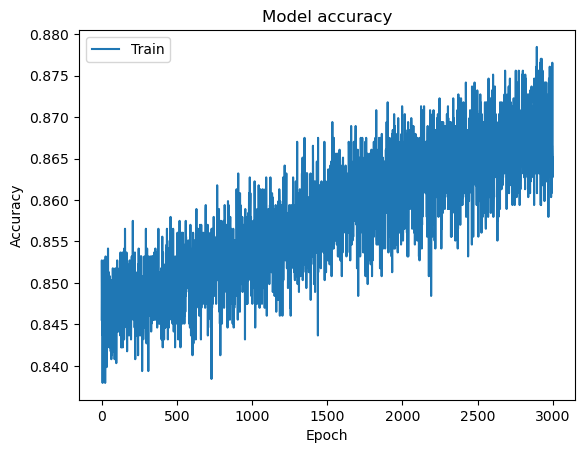

In [865]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

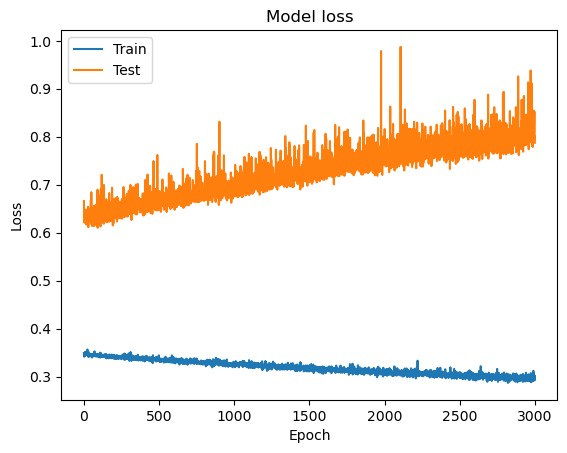

In [864]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

### Visualizing Our Neural Network

<img src='nn.jpg'></img>

### Best Grid

In [98]:
best_grid = grid_search.best_estimator_

In [578]:
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 40), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=6000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=10, warm_start=False)

In [579]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

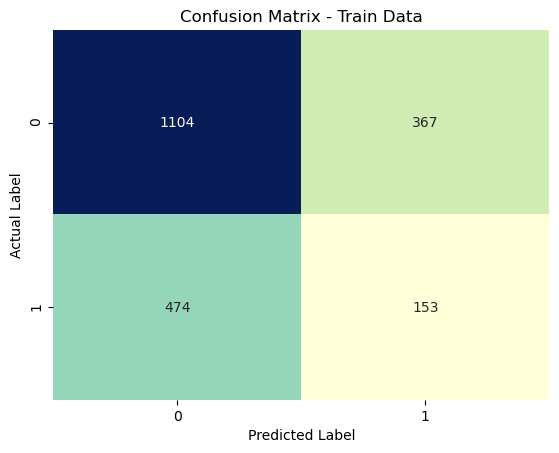

In [866]:
sns.heatmap(np.array([[1104,367],[474,153]]),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Train Data')
plt.show()

In [580]:
confusion_matrix(train_labels,ytrain_predict)

array([[1104,  367],
       [ 474,  153]], dtype=int64)

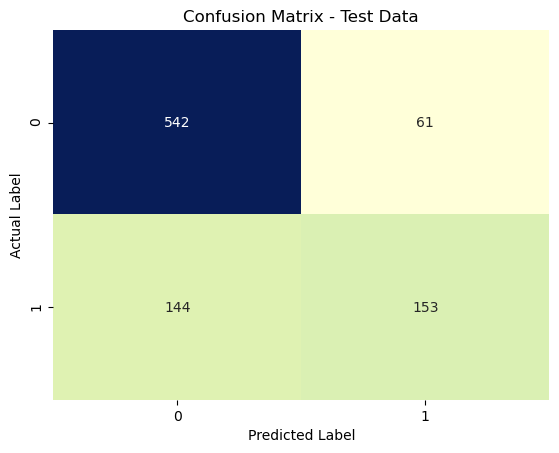

In [867]:
sns.heatmap(np.array([[542,61],[144,153]]),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Test Data')
plt.show()

In [102]:
confusion_matrix(test_labels,ytest_predict)

array([[542,  61],
       [144, 153]], dtype=int64)

In [103]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1471
           1       0.74      0.57      0.65       627

    accuracy                           0.81      2098
   macro avg       0.79      0.74      0.76      2098
weighted avg       0.81      0.81      0.81      2098



In [104]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       603
           1       0.71      0.52      0.60       297

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



AUC: 0.862


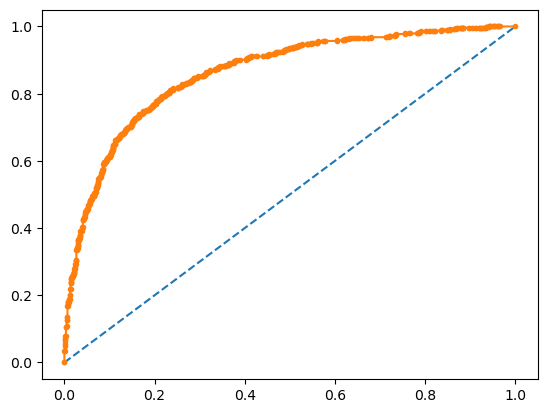

In [105]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.809


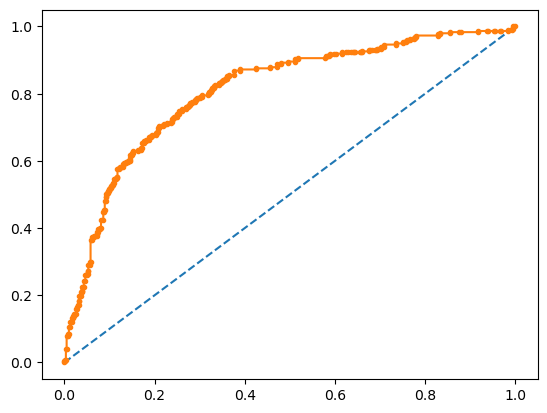

In [106]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Comparing Different Models

In [868]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Test':[0.77,0.80,0.54,0.72,0.61],
        'CART Train':[0.80,0.83,0.60,0.70,0.65],
       'Random Forest Test':[0.78,0.82,0.51,0.74,0.61],
        'Random Forest Train':[0.80,0.86,0.56,0.74,0.64],
       'Neural Network Test':[0.77,0.80,0.52,0.71,0.60],
        'Neural Network Train':[0.81,0.86,0.57,0.74,0.65]},index=index)
round(data,2)

CART Test  CART Train  Random Forest Test  Random Forest Train  \
Accuracy        0.77        0.80                0.78                 0.80   
AUC             0.80        0.83                0.82                 0.86   
Recall          0.54        0.60                0.51                 0.56   
Precision       0.72        0.70                0.74                 0.74   
F1 Score        0.61        0.65                0.61                 0.64   

           Neural Network Test  Neural Network Train  
Accuracy                  0.77                  0.81  
AUC                       0.80                  0.86  
Recall                    0.52                  0.57  
Precision                 0.71                  0.74  
F1 Score                  0.60                  0.65

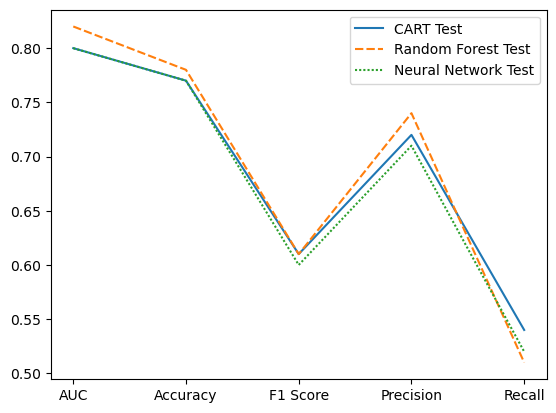

In [938]:
sns.lineplot(data=data.T[0::2].T)

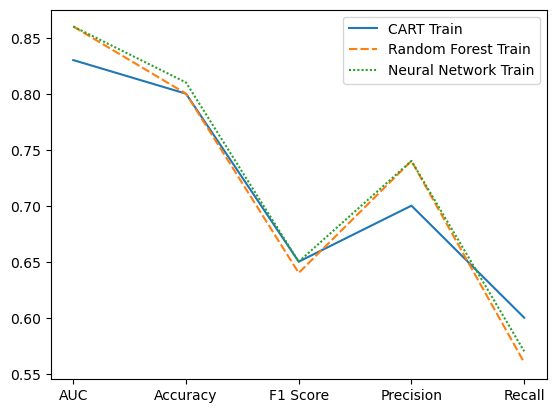

In [939]:
sns.lineplot(data=data.T[1::2].T)

# Thank You!!